# Общее описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории.

Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Описание данных:**\

Данные для работы находятся в нескольких таблицах. 

market_file.csv\
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
id — номер покупателя в корпоративной базе данных.\
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».\
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.\
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.\
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.\
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.\
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.\
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.\
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.\
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.\
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.\
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv\
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.\
id — номер покупателя в корпоративной базе данных.\
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.\
Выручка — сумма выручки за период.

market_time.csv\
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.\
id — номер покупателя в корпоративной базе данных.\
Период — название периода, во время которого зафиксировано общее время.\
минут — значение времени, проведённого на сайте, в минутах.

money.csv\
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.\
id — номер покупателя в корпоративной базе данных.\
Прибыль — значение прибыли.

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
#Date and time
import time
from datetime import timedelta
from datetime import datetime
from datetime import date
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
#sclearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, \
                            precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#phik
from phik import resources
from phik.report import plot_correlation_matrix
from phik import phik_matrix
#stat
from scipy.stats import t

# Загрузка данных

In [2]:
try:
    market_file = pd.read_csv(r"C:\Users\bondarev\Documents\DS study\data\sprint_11_one_click\market_file.csv")
    market_money = pd.read_csv(r"C:\Users\bondarev\Documents\DS study\data\sprint_11_one_click\market_money.csv")
    market_time = pd.read_csv(r"C:\Users\bondarev\Documents\DS study\data\sprint_11_one_click\market_time.csv")
    money = pd.read_csv(r"C:\Users\bondarev\Documents\DS study\data\sprint_11_one_click\money.csv", sep=";")
except:
    market_file = pd.read_csv("/datasets/market_file.csv")
    market_money = pd.read_csv("/datasets/market_money.csv")
    market_time = pd.read_csv("/datasets/market_time.csv")
    money = pd.read_csv("/datasets/money.csv", sep=";")

## Предварительный общий обзор

Данные о поведении покупателя на сайте:

In [3]:
market_file.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [4]:
market_file.shape

(1300, 13)

In [5]:
#Переименуем столбцы
market_file = market_file.rename(columns={
    'Покупательская активность':'purch_active',
    'Тип сервиса':'service_type',
    'Разрешить сообщать':'notification_permition',
    'Маркет_актив_6_мес':'market_active_6',
    'Маркет_актив_тек_мес':'market_active_cur',
    'Длительность':'duration',
    'Акционные_покупки':'promotion_purch',
    'Популярная_категория':'popular_category',
    'Средний_просмотр_категорий_за_визит':'avg_cat_view_vizit',
    'Неоплаченные_продукты_штук_квартал':'nonpaid_items_quater',
    'Ошибка_сервиса':'service_error',
    'Страниц_за_визит':'pages_vizit',
})

Данные о выручке, которую получает магазин с покупателя:

In [6]:
market_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [7]:
market_money.shape

(3900, 3)

In [8]:
#Переименуем столбцы
market_money = market_money.rename(columns={
    'Период':'period',
    'Выручка':'revenue'
})

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:

In [9]:
market_time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [10]:
market_time.shape

(2600, 3)

In [11]:
#Переименуем столбцы
market_time = market_time.rename(columns={
    'Период':'period',
    'минут':'min'
})

Данные о среднемесячной прибыли покупателя за последние 3 месяца:

In [12]:
money.head()

id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21

In [13]:
money.shape

(1300, 2)

In [14]:
#Переименуем столбцы
money = money.rename(columns={
    'Прибыль':'revenue'
})

**Вывод:**\
Выполнен предварительный обзор данных. Данные соответствуют описанию. Выполнено переименование столбцов. 

# Обзор данных

In [15]:
# функция для обзора данных
def data_overview(df, discret_values=20):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 1. Выводим первые 5 строк
    print("Первых 5 строк данных:")
    display(df.head())

    # 2. Информация о DataFrame
    print("\nИнформация о DataFrame:")
    df.info()

    # 3. Количество пропусков
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Пропуски (шт)': missing_data,
        'Пропуски (%)': missing_percent
    })
    missing_df = missing_df[missing_df['Пропуски (шт)'] > 0]
    print("\nКоличество пропусков (в шт и в %):")
    display(missing_df.style.background_gradient(cmap="YlOrRd"))

    # 4. Количество явных дубликатов
    duplicates_count = df.duplicated().sum()
    print(f"\nКоличество явных дубликатов: {duplicates_count}")

    # 5. Уникальные значения по нечисловым полям
    non_numeric_cols = df.select_dtypes(exclude=["number", "datetime"])
    print("\nУникальные значения по нечисловым полям:")
    for col in non_numeric_cols.columns:
        unique_values = non_numeric_cols[col].unique()
        print(f"{col}: {unique_values[:10]}{'...' if len(unique_values) > 10 else ''}")
        print('')

    # 6. Минимальное и максимальное значение для полей с датами
    date_cols = df.select_dtypes(include=["datetime"])
    if not date_cols.empty:
        print("\nМинимальные и максимальные значения для полей с датами:")
        for col in date_cols.columns:
            print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

    # 7. Описательная статистика, исключая поля с 'id'
    numeric_cols = df.select_dtypes(include=["number"]).columns
    numeric_cols_no_id = [col for col in numeric_cols if 'id' not in col.lower()]
    if numeric_cols_no_id:
        print("\nОписательная статистика для числовых полей (без 'id'):")
        display(df[numeric_cols_no_id].describe())
    else:
        print("\nНет числовых полей без 'id' для описательной статистики.")

    # 8. Определение типа признака и построение графиков
    if numeric_cols_no_id:
        for col in numeric_cols_no_id:
            unique_values = df[col].nunique()
            if unique_values <= discret_values:  # Дискретный признак
                print(f"\nДискретный признак: {col}")
                fig, axes = plt.subplots(1, 2, figsize=(12, 5))
                sns.countplot(data=df, x=col, order=df[col].value_counts().index,  ax=axes[0])
                axes[0].set_title(f"Столбчатая диаграмма: {col}")
                axes[0].tick_params(axis='x', rotation=45)
                sns.boxplot(x=df[col], ax=axes[1])
                axes[1].set_title(f"Boxplot: {col}")
                plt.tight_layout()
                plt.show()
            else:  # Непрерывный признак
                print(f"\nНепрерывный признак: {col}")
                fig, axes = plt.subplots(1, 2, figsize=(12, 5))
                sns.histplot(df[col].dropna(), ax=axes[0], kde=True)
                axes[0].set_title(f"Гистограмма: {col}")
                sns.boxplot(x=df[col], ax=axes[1])
                axes[1].set_title(f"Boxplot: {col}")
                plt.tight_layout()
                plt.show()
    else:
        print("\nНет числовых полей без 'id' для построения графиков.")

## Данные о поведении покупателя на сайте

Первых 5 строк данных:


id purch_active service_type notification_permition  market_active_6  \
0  215348    Снизилась      премиум                     да              3.4   
1  215349    Снизилась      премиум                     да              4.4   
2  215350    Снизилась    стандартт                    нет              4.9   
3  215351    Снизилась    стандартт                     да              3.2   
4  215352    Снизилась    стандартт                    нет              5.1   

   market_active_cur  duration  promotion_purch   popular_category  \
0                  5       121             0.00   Товары для детей   
1                  4       819             0.75   Товары для детей   
2                  3       539             0.14  Домашний текстиль   
3                  5       896             0.99   Товары для детей   
4                  3      1064             0.94   Товары для детей   

   avg_cat_view_vizit  nonpaid_items_quater  service_error  pages_vizit  
0                   6                     2              1            5  
1                   4                     4              2            5  
2                   5                     2              1            5  
3                   5                     0              6            4  
4                   3                     2              3            2


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1300 non-null   int64  
 1   purch_active            1300 non-null   object 
 2   service_type            1300 non-null   object 
 3   notification_permition  1300 non-null   object 
 4   market_active_6         1300 non-null   float64
 5   market_active_cur       1300 non-null   int64  
 6   duration                1300 non-null   int64  
 7   promotion_purch         1300 non-null   float64
 8   popular_category        1300 non-null   object 
 9   avg_cat_view_vizit      1300 non-null   int64  
 10  nonpaid_items_quater    1300 non-null   int64  
 11  service_error           1300 non-null   int64  
 12  pages_vizit             1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB

Количест


Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
purch_active: ['Снизилась' 'Прежний уровень']

service_type: ['премиум' 'стандартт' 'стандарт']

notification_permition: ['да' 'нет']

popular_category: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Описательная статистика для числовых полей (без 'id'):


market_active_6  market_active_cur     duration  promotion_purch  \
count      1300.000000        1300.000000  1300.000000      1300.000000   
mean          4.253769           4.011538   601.898462         0.319808   
std           1.014814           0.696868   249.856289         0.249843   
min           0.900000           3.000000   110.000000         0.000000   
25%           3.700000           4.000000   405.500000         0.170000   
50%           4.200000           4.000000   606.000000         0.240000   
75%           4.900000           4.000000   806.000000         0.300000   
max           6.600000           5.000000  1079.000000         0.990000   

       avg_cat_view_vizit  service_error  pages_vizit  
count          1300.00000    1300.000000  1300.000000  
mean              3.27000       4.185385     8.176923  
std               1.35535       1.955298     3.978126  
min               1.00000       0.000000     1.000000  
25%               2.00000       3.000000     5.000000  
50%               3.00000       4.000000     8.000000  
75%               4.00000       6.000000    11.000000  
max               6.00000       9.000000    20.000000


Непрерывный признак: market_active_6


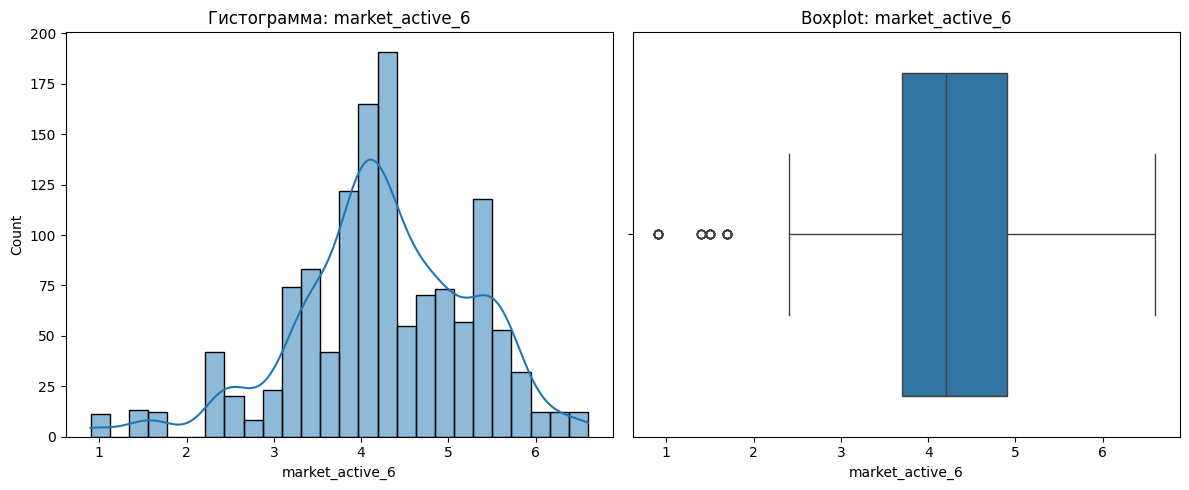


Дискретный признак: market_active_cur


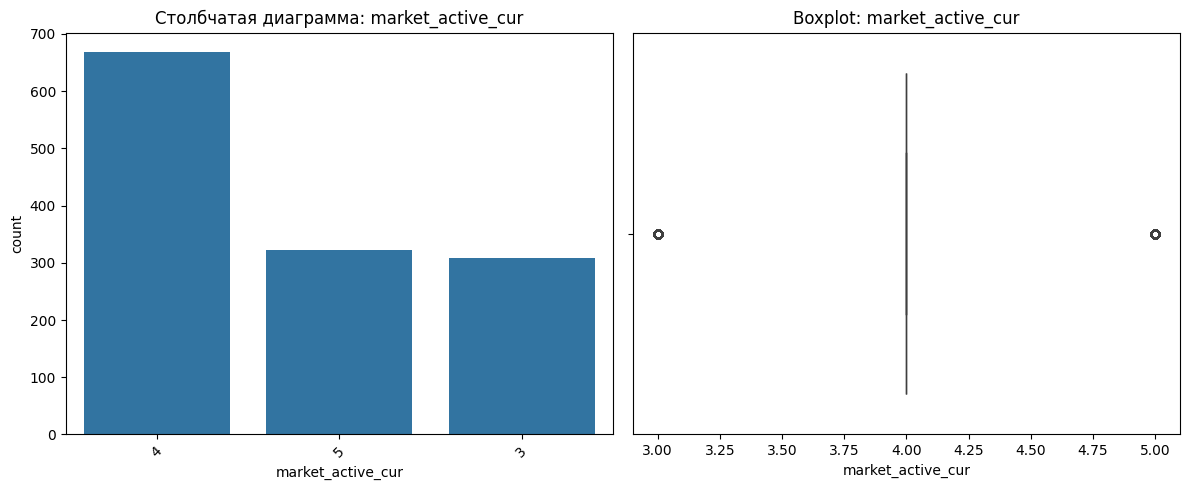


Непрерывный признак: duration


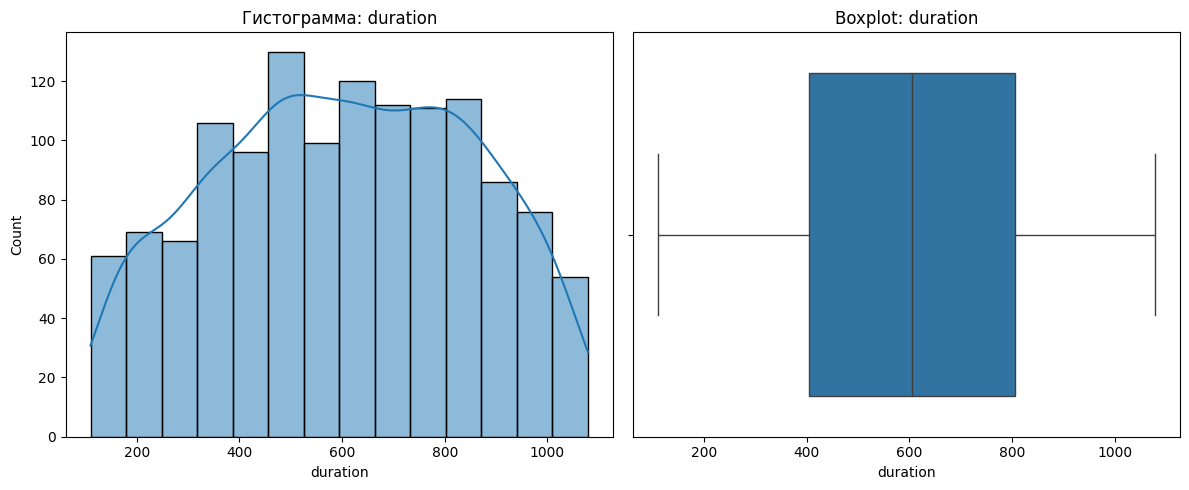


Непрерывный признак: promotion_purch


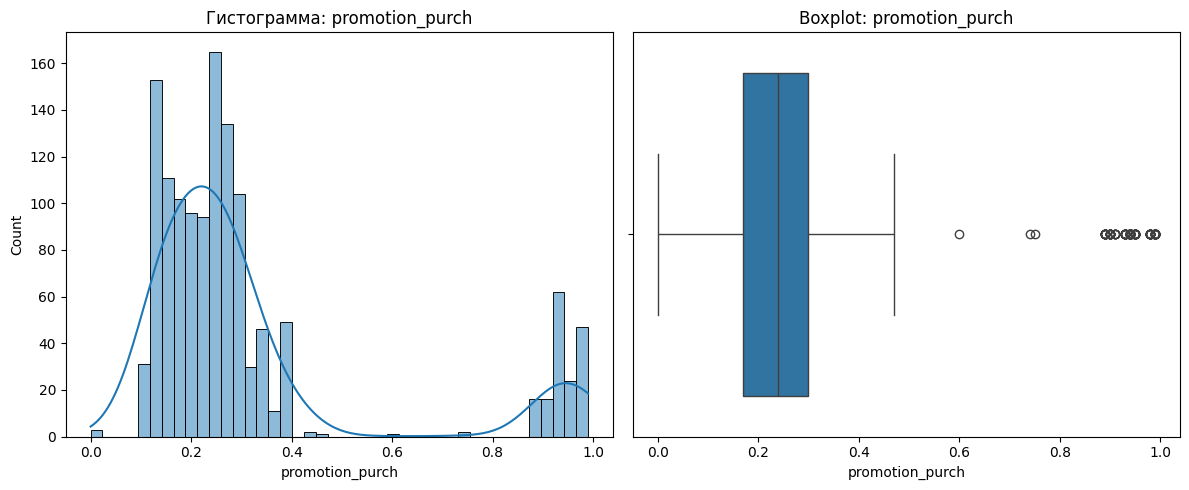


Дискретный признак: avg_cat_view_vizit


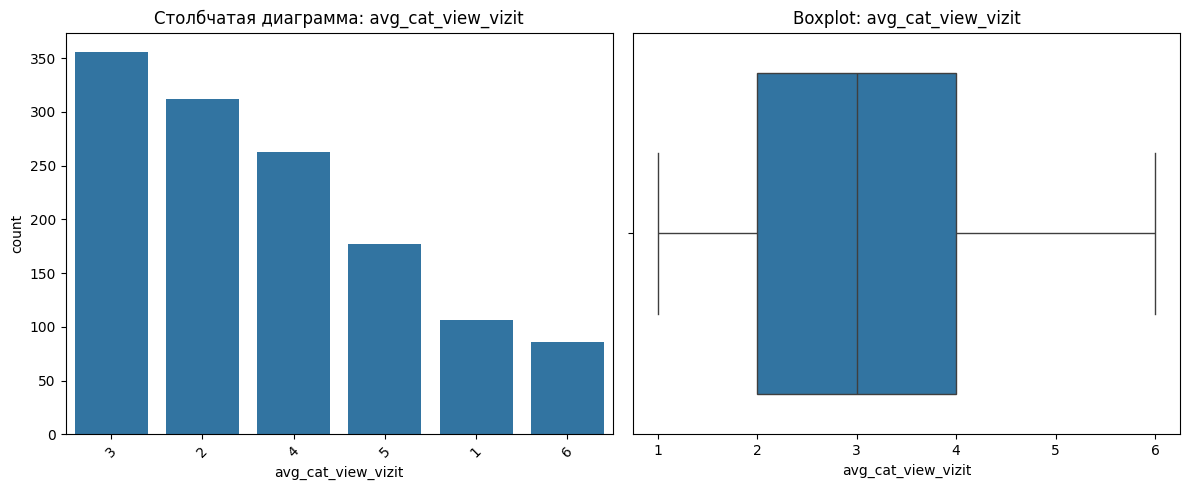


Дискретный признак: service_error


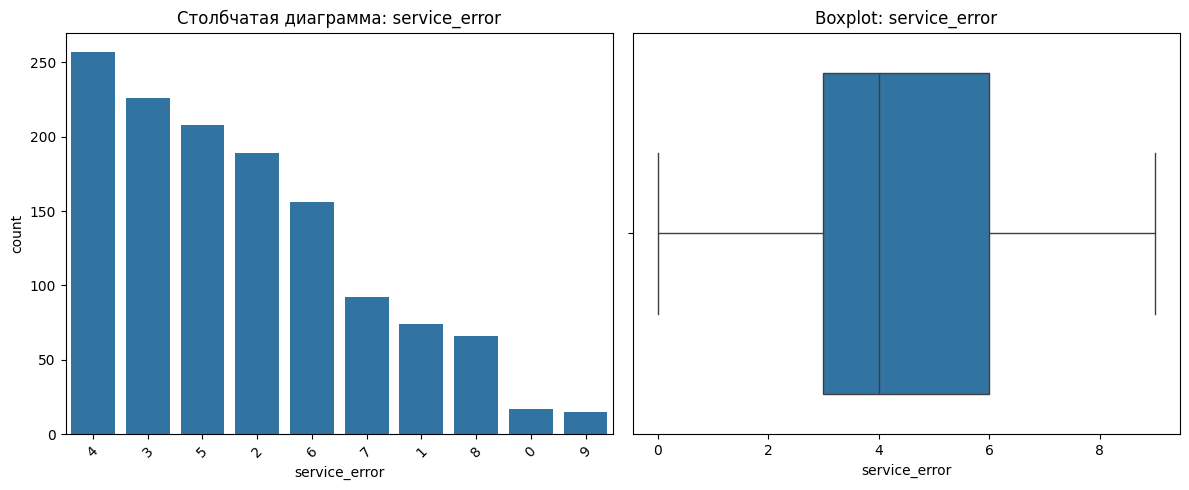


Дискретный признак: pages_vizit


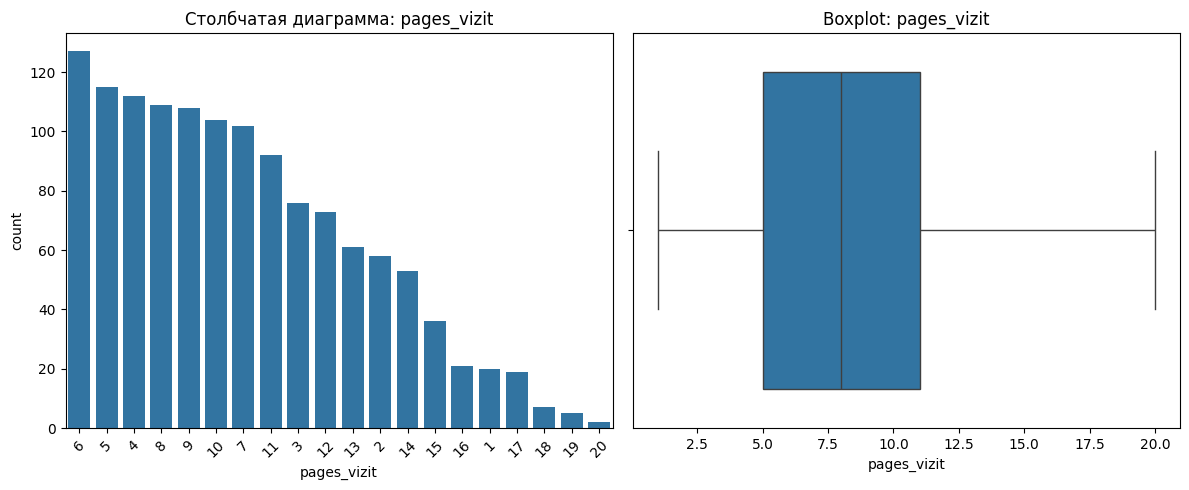

In [16]:
data_overview(market_file)

**Вывод:**\
Визуально видимых ошибок в заполнении данных не обнаружено. Преобразование типов данных не требуется.\
Пропуки не обнаружены.\
Явные дубликаты не обнаружены.\
Обнаружены неявные дубликаты в поле "тип сревиса". 

## Данные о выручке, которую получает магазин с покупателя

Первых 5 строк данных:


id               period  revenue
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB

Количество пропусков (в шт и в %):



Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
period: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Описательная статистика для числовых полей (без 'id'):


revenue
count    3900.000000
mean     5025.696051
std      1777.704104
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5363.000000
max    106862.200000


Непрерывный признак: revenue


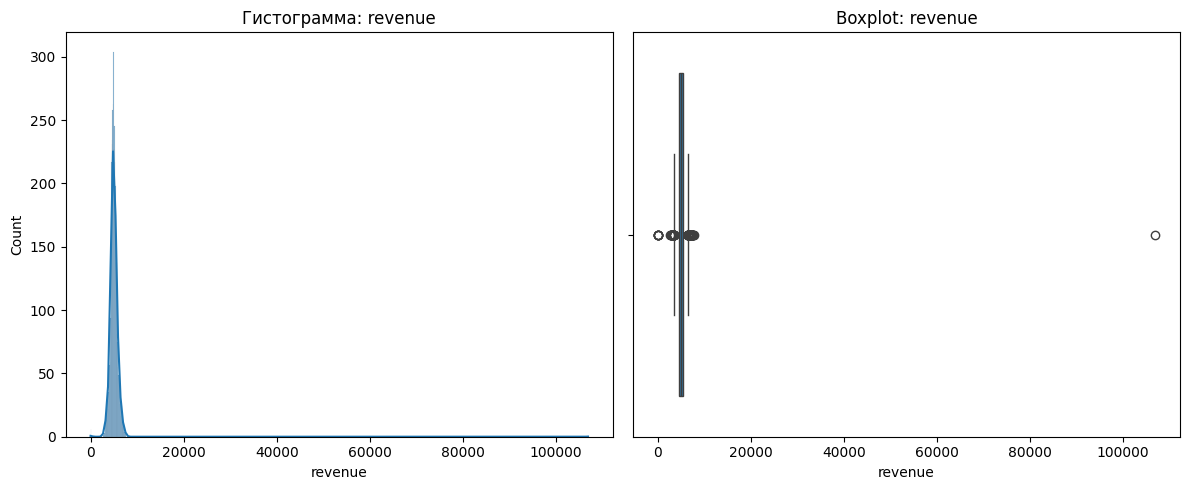

In [17]:
data_overview(market_money)

**Вывод:**\
Преобразование типа данных не требуется.\
Пропуки не обнаружены.\
Явные дубликаты не обнаржены.\
Неявные дубликаты не обнаружены.\
Обнаружено аномально высокое значение в выручке.

## Данные о времени (в минутах)

Первых 5 строк данных:


id            period  min
0  215348     текущий_месяц   14
1  215348  предыдцщий_месяц   13
2  215349     текущий_месяц   10
3  215349  предыдцщий_месяц   12
4  215350     текущий_месяц   13


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   period  2600 non-null   object
 2   min     2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB

Количество пропусков (в шт и в %):



Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
period: ['текущий_месяц' 'предыдцщий_месяц']


Описательная статистика для числовых полей (без 'id'):


min
count  2600.000000
mean     13.336154
std       4.080198
min       4.000000
25%      10.000000
50%      13.000000
75%      16.000000
max      23.000000


Дискретный признак: min


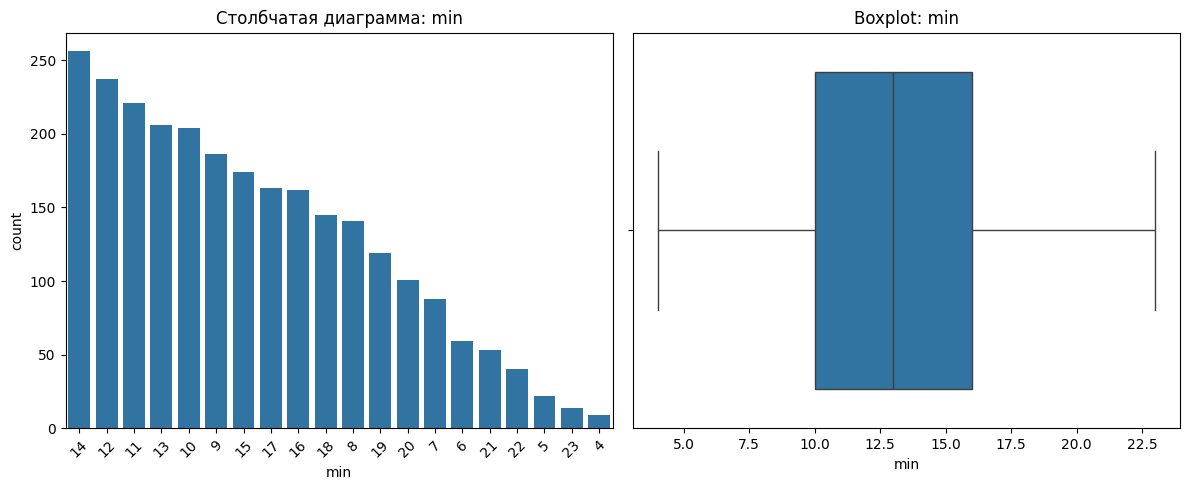

In [18]:
data_overview(market_time)

**Вывод:**\
Преобразование типа данных не требуется. Обнаружена офорграфическая ошибка в названии периода.\
Пропуки не обнаружены.\
Явные дубликаты не обнаржены.\
Неявные дубликаты не обнаружены.

## Данные о среднемесячной прибыли покупателя за последние 3 месяца

In [19]:
data_overview(money)

Первых 5 строк данных:


id revenue
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   revenue  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB

Количество пропусков (в шт и в %):



Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
revenue: ['0,98' '4,16' '3,13' '4,87' '4,21' '3,95' '3,62' '5,26' '4,93' '4,66']...


Нет числовых полей без 'id' для описательной статистики.

Нет числовых полей без 'id' для построения графиков.


**Вывод:**\
Обнаружены ошибки при заполнении поля выручки - запятая вместо точки. Требуется преобразование типов.\
Пропуки не обнаружены.\
Явные дубликаты не обнаржены.\
Неявные дубликаты не обнаружены.

## Общий вывод

*Датафрейм market_file:*\
Визуально видимых ошибок в заполнении данных не обнаружено. Преобразование типов данных не требуется.\
Пропуки не обнаружены.\
Явные дубликаты не обнаружены.\
Обнаружены неявные дубликаты в поле "тип сревиса". 

*Датафрейм market_money:*\
Преобразование типа данных не требуется.\
Пропуки не обнаружены.\
Явные дубликаты не обнаржены.\
Неявные дубликаты не обнаружены.\
Обнаружено аномально высокое значение в выручке.

*Датафрейм market_time:*\
Преобразование типа данных не требуется. Обнаружена офорграфическая ошибка в названии периода. \
Пропуки не обнаружены.\
Явные дубликаты не обнаржены.\
Неявные дубликаты не обнаружены.

*Датафрейм money:*\
Обнаружены ошибки при заполнении поля выручки - запятая вместо точки. Требуется преобразование типов.\
Пропуки не обнаружены.\
Явные дубликаты не обнаружены.\
Неявные дубликаты не обнаружены.

# Предобработка данных

## Данные о поведении покупателя на сайте

### Обработка неявных дубликатов

In [20]:
market_file = market_file.replace('стандартт', 'стандарт')

### Контрольная проверка преобразований 

Первых 5 строк данных:


id purch_active service_type notification_permition  market_active_6  \
0  215348    Снизилась      премиум                     да              3.4   
1  215349    Снизилась      премиум                     да              4.4   
2  215350    Снизилась     стандарт                    нет              4.9   
3  215351    Снизилась     стандарт                     да              3.2   
4  215352    Снизилась     стандарт                    нет              5.1   

   market_active_cur  duration  promotion_purch   popular_category  \
0                  5       121             0.00   Товары для детей   
1                  4       819             0.75   Товары для детей   
2                  3       539             0.14  Домашний текстиль   
3                  5       896             0.99   Товары для детей   
4                  3      1064             0.94   Товары для детей   

   avg_cat_view_vizit  nonpaid_items_quater  service_error  pages_vizit  
0                   6                     2              1            5  
1                   4                     4              2            5  
2                   5                     2              1            5  
3                   5                     0              6            4  
4                   3                     2              3            2


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1300 non-null   int64  
 1   purch_active            1300 non-null   object 
 2   service_type            1300 non-null   object 
 3   notification_permition  1300 non-null   object 
 4   market_active_6         1300 non-null   float64
 5   market_active_cur       1300 non-null   int64  
 6   duration                1300 non-null   int64  
 7   promotion_purch         1300 non-null   float64
 8   popular_category        1300 non-null   object 
 9   avg_cat_view_vizit      1300 non-null   int64  
 10  nonpaid_items_quater    1300 non-null   int64  
 11  service_error           1300 non-null   int64  
 12  pages_vizit             1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB

Количест


Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
purch_active: ['Снизилась' 'Прежний уровень']

service_type: ['премиум' 'стандарт']

notification_permition: ['да' 'нет']

popular_category: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Описательная статистика для числовых полей (без 'id'):


market_active_6  market_active_cur     duration  promotion_purch  \
count      1300.000000        1300.000000  1300.000000      1300.000000   
mean          4.253769           4.011538   601.898462         0.319808   
std           1.014814           0.696868   249.856289         0.249843   
min           0.900000           3.000000   110.000000         0.000000   
25%           3.700000           4.000000   405.500000         0.170000   
50%           4.200000           4.000000   606.000000         0.240000   
75%           4.900000           4.000000   806.000000         0.300000   
max           6.600000           5.000000  1079.000000         0.990000   

       avg_cat_view_vizit  service_error  pages_vizit  
count          1300.00000    1300.000000  1300.000000  
mean              3.27000       4.185385     8.176923  
std               1.35535       1.955298     3.978126  
min               1.00000       0.000000     1.000000  
25%               2.00000       3.000000     5.000000  
50%               3.00000       4.000000     8.000000  
75%               4.00000       6.000000    11.000000  
max               6.00000       9.000000    20.000000


Непрерывный признак: market_active_6


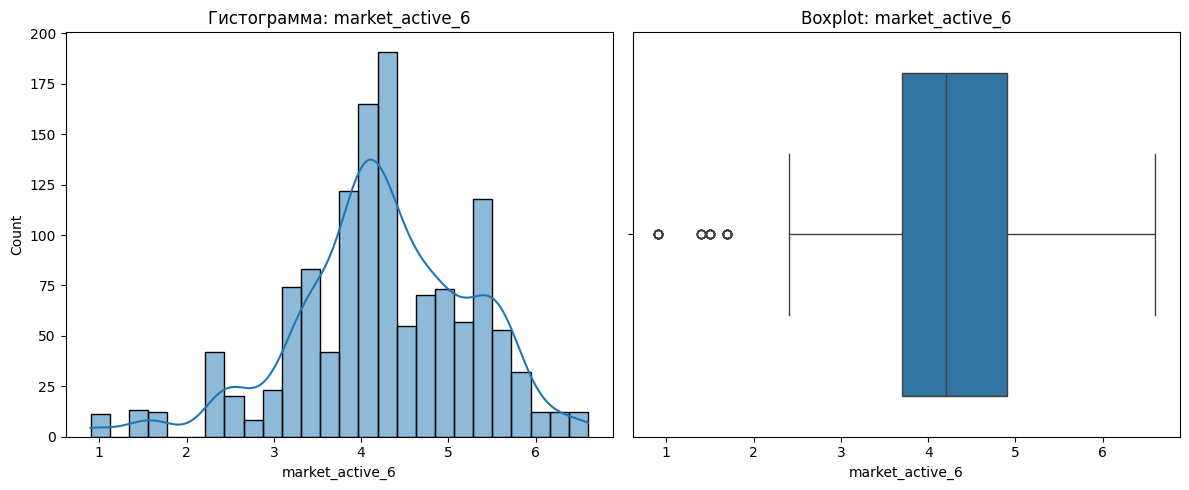


Дискретный признак: market_active_cur


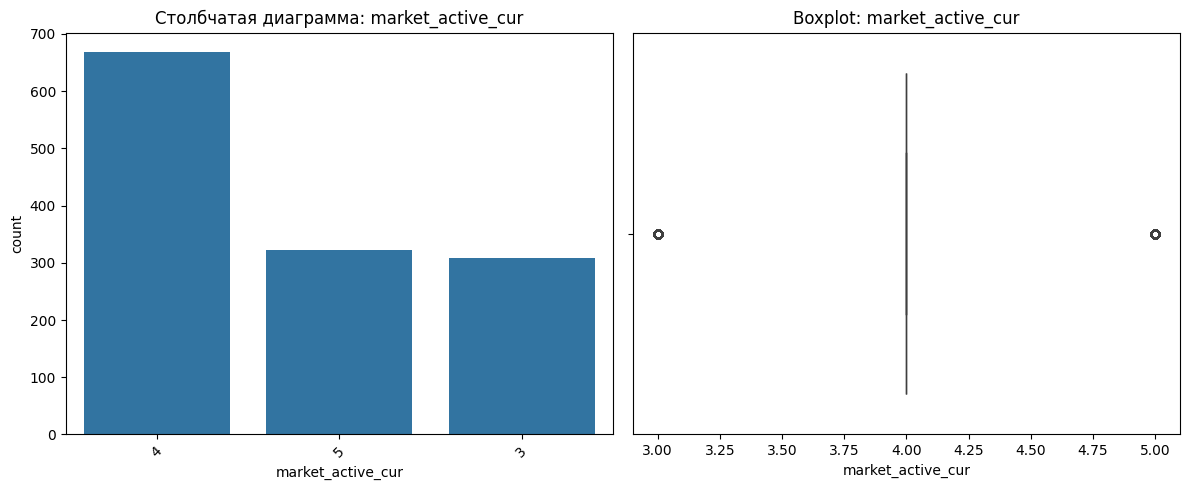


Непрерывный признак: duration


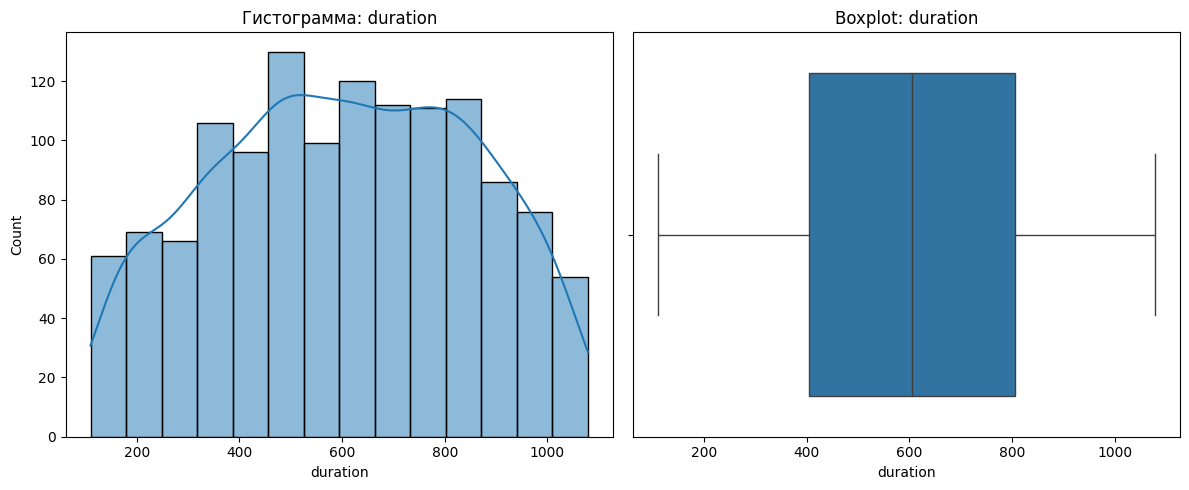


Непрерывный признак: promotion_purch


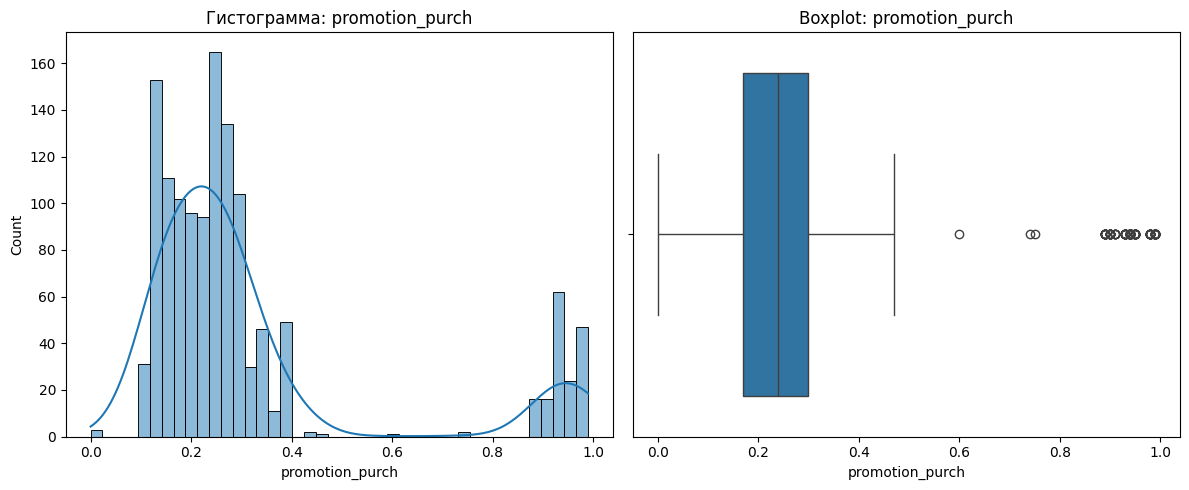


Дискретный признак: avg_cat_view_vizit


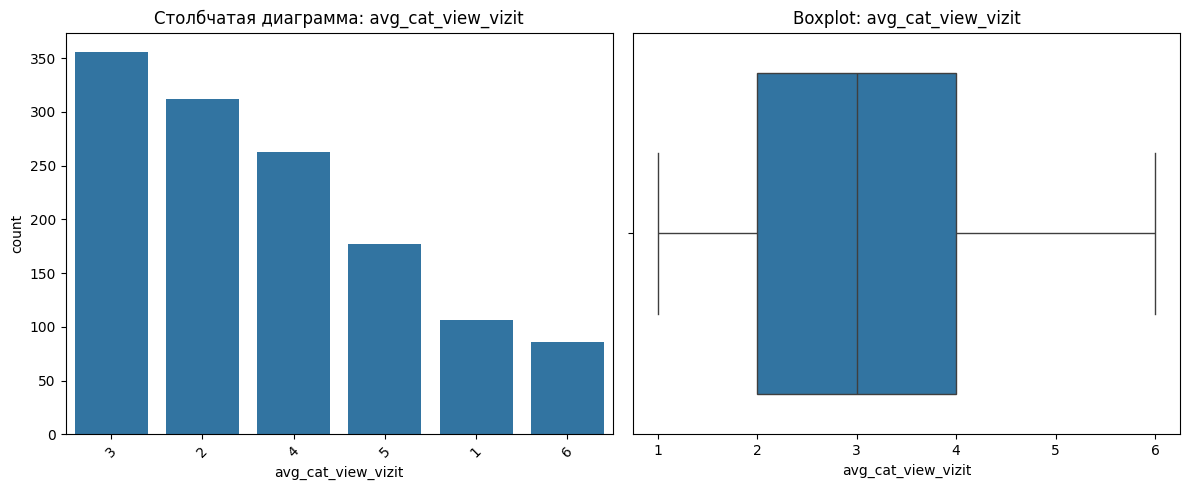


Дискретный признак: service_error


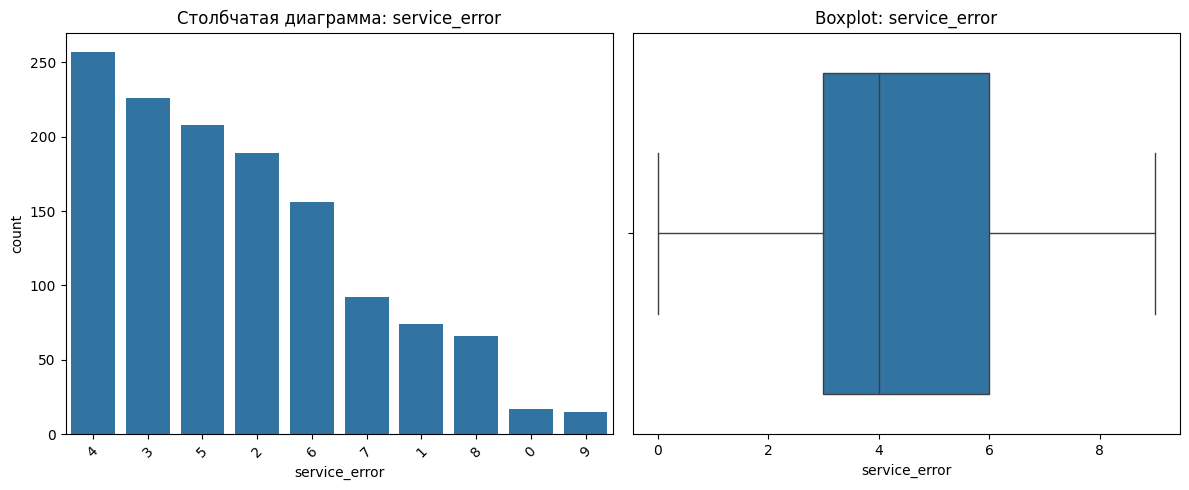


Дискретный признак: pages_vizit


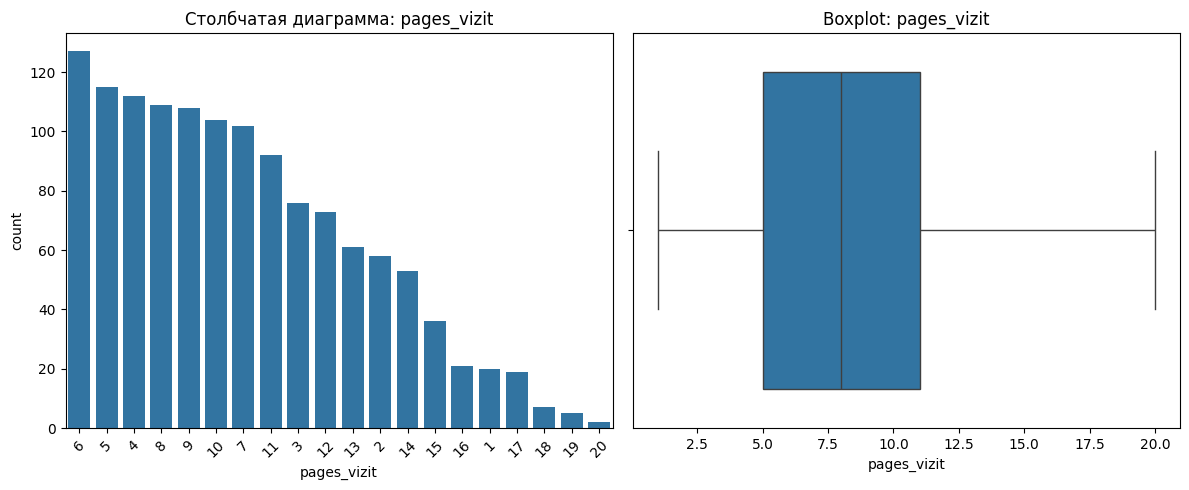

In [21]:
data_overview(market_file)

## Данные о выручке, которую получает магазин с покупателя

### Обработка аномалий

In [22]:
#выведем 95 и 99й перцентиль по полю revenue
np.percentile(market_money['revenue'], [95, 99])

array([6226.525, 6957.737])

In [23]:
#выведем значения по полю revenue больше 99го перцентиля
market_money[market_money['revenue'] > 7500]

id         period   revenue
98    215380  текущий_месяц  106862.2
262   215435  текущий_месяц    7605.3
435   215493  текущий_месяц    7799.4
1481  215841  текущий_месяц    7557.0
2388  216144  текущий_месяц    7547.8

Имеется один пользователь со значениями значительно превыщующи остальные

In [24]:
# посмотрим данные о поведении данного пользователя на сайте
market_file[market_file['id'] == 215380]

id purch_active service_type notification_permition  market_active_6  \
32  215380    Снизилась      премиум                    нет              1.7   

    market_active_cur  duration  promotion_purch  \
32                  4       637             0.94   

                  popular_category  avg_cat_view_vizit  nonpaid_items_quater  \
32  Техника для красоты и здоровья                   3                     2   

    service_error  pages_vizit  
32              4            7

Каких-то особенностей в поведении не замечено, все показатели близки к средним, поэтому заполним значение для данного пользователя медианой.  

In [25]:
market_money.loc[market_money['id'] == 215380, 'revenue'] = market_money.loc[market_money['id'] != 215380, 'revenue'].median()

### Контрольная проверка преобразований 

Первых 5 строк данных:


id               period  revenue
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB

Количество пропусков (в шт и в %):



Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
period: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Описательная статистика для числовых полей (без 'id'):


revenue
count  3900.000000
mean   4999.254462
std     706.699075
min       0.000000
25%    4590.150000
50%    4956.000000
75%    5362.625000
max    7799.400000


Непрерывный признак: revenue


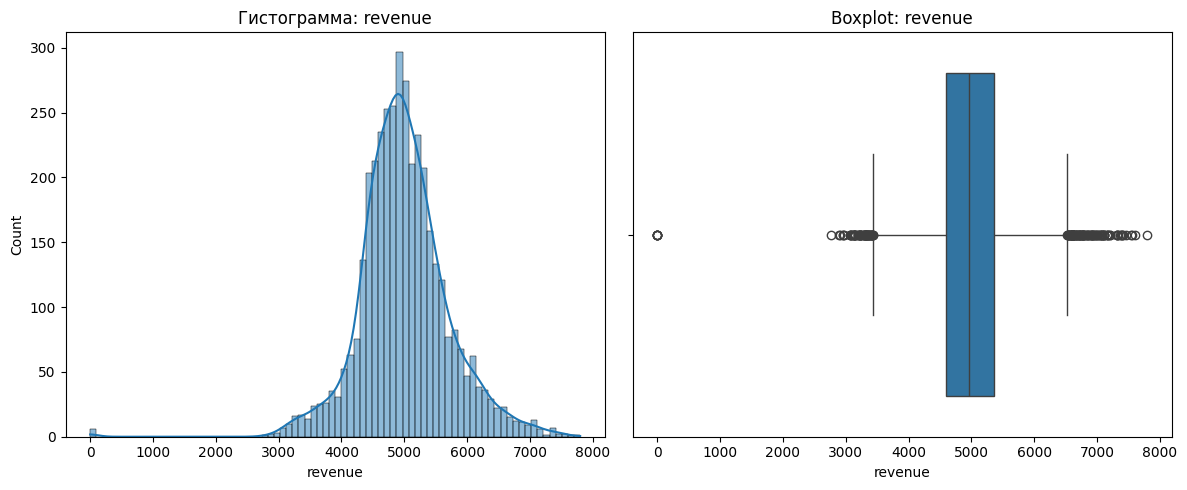

In [26]:
data_overview(market_money)

Теперь видна аномалия в другое сторону, пользователи с выручкой, равной 0. Проверим его.

In [27]:
#выведем значения по полю revenue больше 99го перцентиля
market_money[market_money['revenue'] < 1000]

id               period  revenue
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

Обнаружено 3 таких пользователя. Проверим их поведение. 

In [28]:
users_rev_0 = list(market_money[market_money['revenue'] < 1000]['id'].unique())

In [29]:
market_file[market_file['id'].isin(users_rev_0)]

id purch_active service_type notification_permition  market_active_6  \
0   215348    Снизилась      премиум                     да              3.4   
9   215357    Снизилась     стандарт                     да              3.9   
11  215359    Снизилась     стандарт                     да              4.6   

    market_active_cur  duration  promotion_purch  \
0                   5       121              0.0   
9                   5       154              0.0   
11                  5       110              0.0   

                  popular_category  avg_cat_view_vizit  nonpaid_items_quater  \
0                 Товары для детей                   6                     2   
9   Техника для красоты и здоровья                   3                     3   
11               Домашний текстиль                   4                     2   

    service_error  pages_vizit  
0               1            5  
9               9            5  
11              4            2

В целом показатели пользователей низкие. Кол-во таких пользователей небольшое, можно их удалить. 

In [30]:
market_money = market_money[~market_money['id'].isin(users_rev_0)]
market_file = market_file[~market_file['id'].isin(users_rev_0)]

Первых 5 строк данных:


id               period  revenue
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   period   3891 non-null   object 
 2   revenue  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB

Количество пропусков (в шт и в %):



Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:
period: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Описательная статистика для числовых полей (без 'id'):


revenue
count  3891.000000
mean   5007.216140
std     678.933002
min    2758.700000
25%    4592.000000
50%    4958.000000
75%    5363.000000
max    7799.400000


Непрерывный признак: revenue


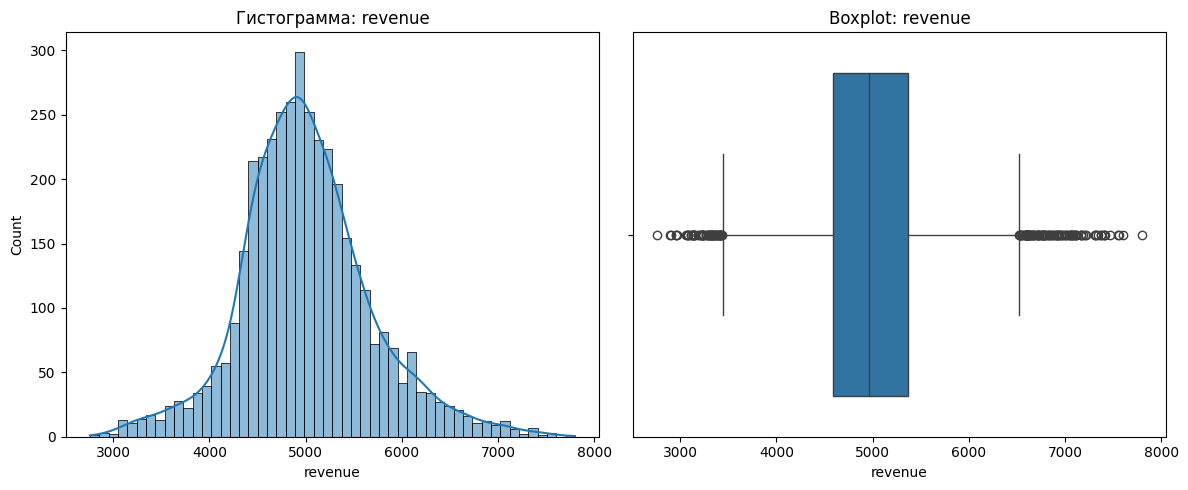

In [31]:
# еще раз проверям преобразования
data_overview(market_money)

## Данные о времени (в минутах)

### Исправление офорграфической ошибки

In [32]:
market_time = market_time.replace('предыдцщий_месяц', 'предыдущий_месяц')

### Проверка преобразований

In [33]:
market_time.period.unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

## Данные о среднемесячной прибыли покупателя за последние 3 месяца

### Преобразование типов данных

In [34]:
money[['revenue']] = money[['revenue']]\
                                    .apply(lambda col: col.str.replace(',', '.', regex=False).astype(float))

### Контрольная проверка преобразований 

Первых 5 строк данных:


id  revenue
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   revenue  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB

Количество пропусков (в шт и в %):



Количество явных дубликатов: 0

Уникальные значения по нечисловым полям:

Описательная статистика для числовых полей (без 'id'):


revenue
count  1300.000000
mean      3.996631
std       1.013722
min       0.860000
25%       3.300000
50%       4.045000
75%       4.670000
max       7.430000


Непрерывный признак: revenue


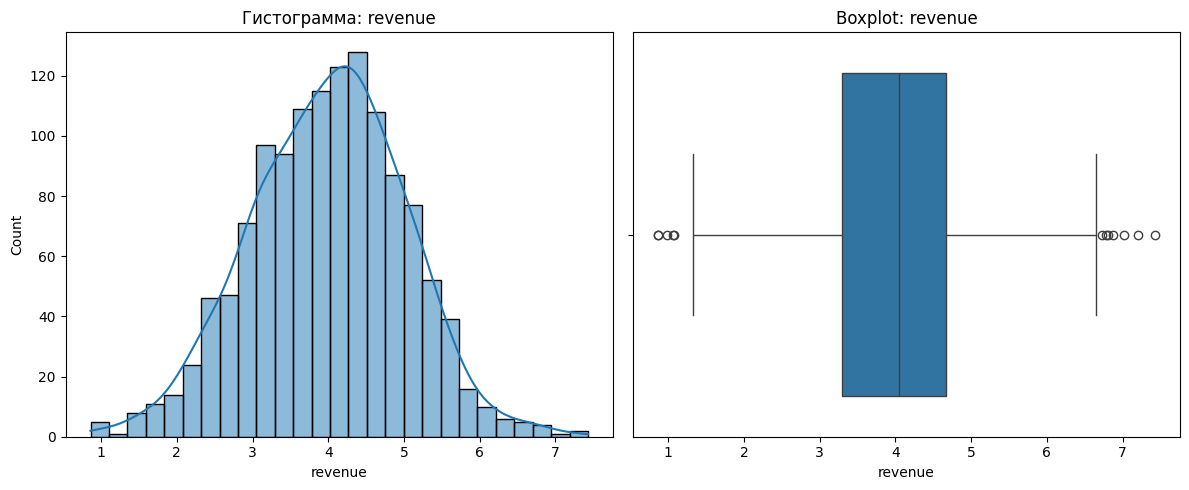

In [35]:
data_overview(money)

## Общий вывод

*Датафрейм market_file:*\
произведено преобразование неявных дубликатов в поле "тип сревиса". 

*Датафрейм market_money:*\
Произведено преобразование аномальных значений в выручке.

*Датафрейм market_time:*\
Исправлена офорграфическая ошибка в значениях периода.

*Датафрейм money:*\
Произведено преобразование типов данных в поле выручка. 

# Исследовательский анализ данных

In [36]:
def plot_eda(df, hist_bins=30, discret_values=20):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Исключаем столбцы, содержащие 'id'
    filtered_df = df[[col for col in df.columns if 'id' not in col.lower()]]
    
    # Числовые и категориальные столбцы
    numeric_columns = filtered_df.select_dtypes(include=['number']).columns
    categorical_columns = filtered_df.select_dtypes(exclude=['number']).columns

    # Числовые поля
    for col in numeric_columns:
        unique_values = filtered_df[col].nunique()
        if unique_values <= discret_values:  # Дискретный признак
            print(f"\nДискретный признак: {col}")
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            sns.countplot(data=filtered_df, x=col, order=filtered_df[col].value_counts().index, ax=axes[0])
            axes[0].set_title(f"Столбчатая диаграмма: {col}")
            axes[0].tick_params(axis='x', rotation=45)
            sns.boxplot(x=filtered_df[col], ax=axes[1], color='orange')
            axes[1].set_title(f"Boxplot: {col}")
            plt.tight_layout()
            plt.show()
        else:  # Непрерывный признак
            print(f"\nНепрерывный признак: {col}")
            plt.figure(figsize=(8, 4))
            # Гистограмма
            plt.subplot(1, 2, 1)
            sns.histplot(filtered_df[col], kde=True, bins=hist_bins, color='blue')
            plt.title(f'Гистограмма: {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            
            # Боксплот
            plt.subplot(1, 2, 2)
            sns.boxplot(x=filtered_df[col], color='orange')
            plt.title(f'Boxplot: {col}')
            plt.xlabel(col)
            plt.tight_layout()
            plt.show()

    # Категориальные поля
    for col in categorical_columns:
        # Подсчёт уникальных значений в каждой категории
        category_counts = filtered_df[col].value_counts().reset_index()
        category_counts.columns = [col, 'count']
        
        # Построение столбчатой и круговой диаграммы рядом
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Столбчатая диаграмма
        sns.barplot(data=category_counts, x=col, y='count', palette='viridis', ax=axes[0])
        axes[0].set_title(f'Количество записей для каждой категории в {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Количество записей')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Круговая диаграмма
        category_counts.set_index(col).plot.pie(
            y='count', autopct='%1.1f%%', legend=False, colors=sns.color_palette('viridis', len(category_counts)), ax=axes[1]
        )
        axes[1].set_title(f'Распределение категорий в {col}')
        axes[1].set_ylabel('')
        
        plt.tight_layout()
        plt.show()

## Данные о поведении покупателей на сайте


Непрерывный признак: market_active_6


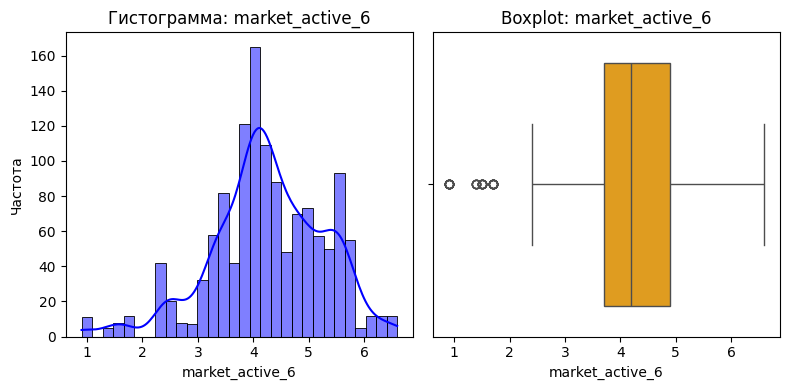


Дискретный признак: market_active_cur


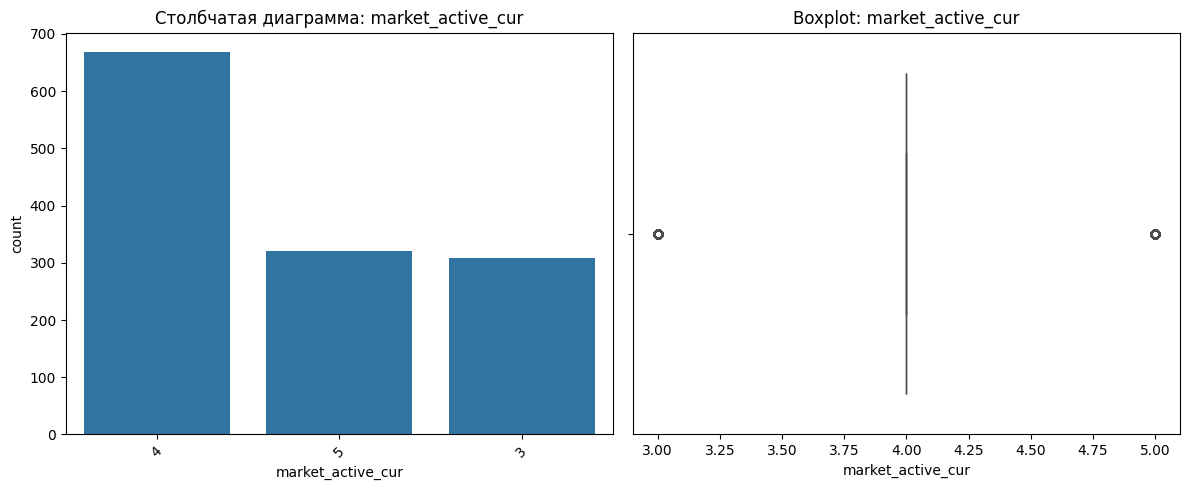


Непрерывный признак: duration


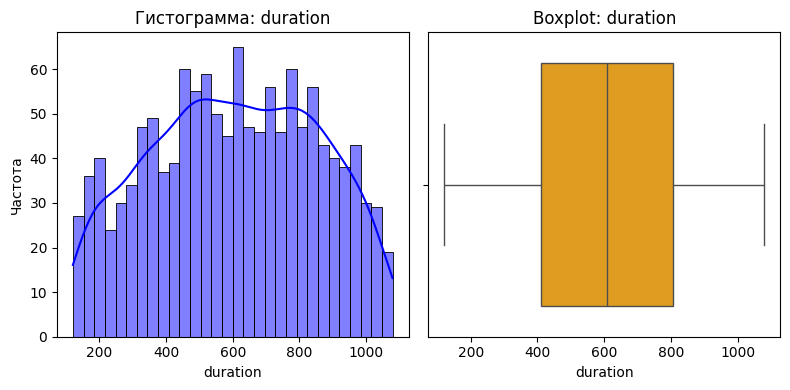


Непрерывный признак: promotion_purch


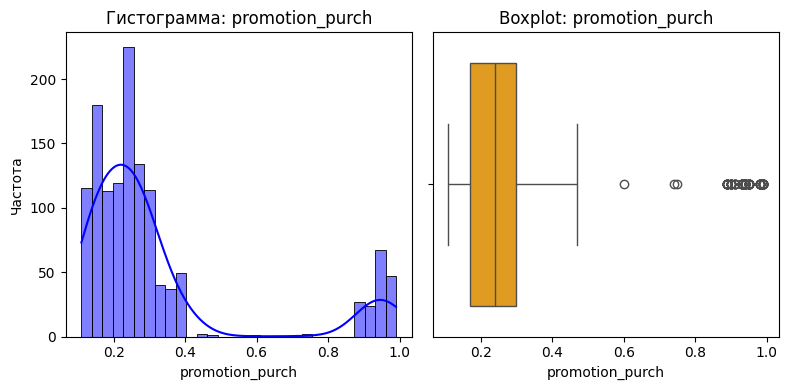


Дискретный признак: avg_cat_view_vizit


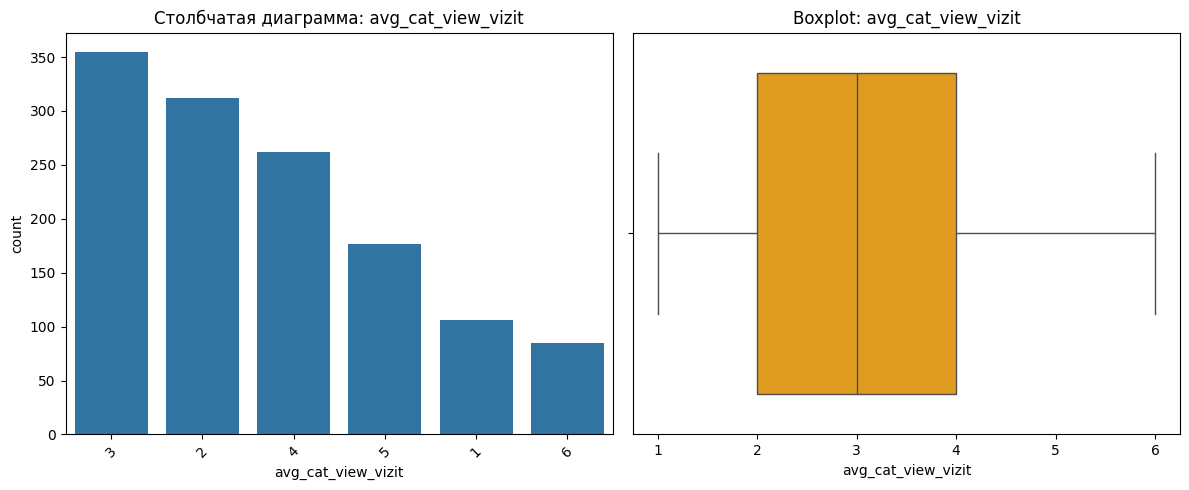


Дискретный признак: service_error


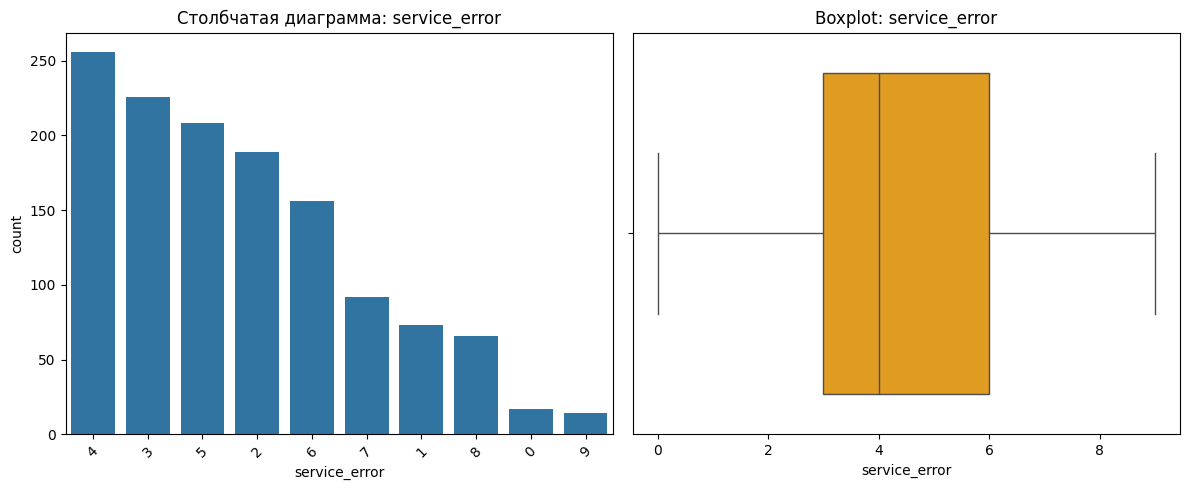


Дискретный признак: pages_vizit


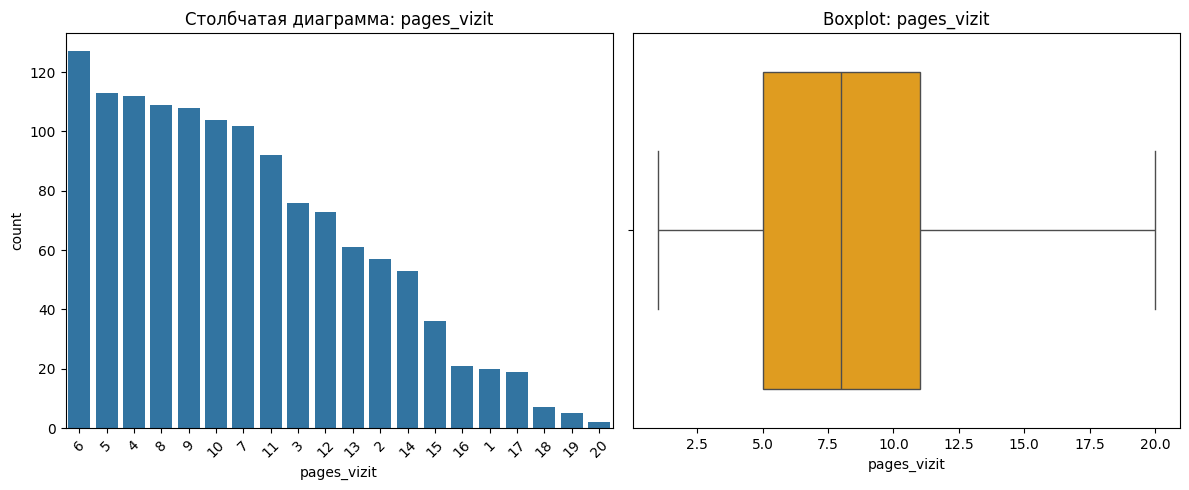

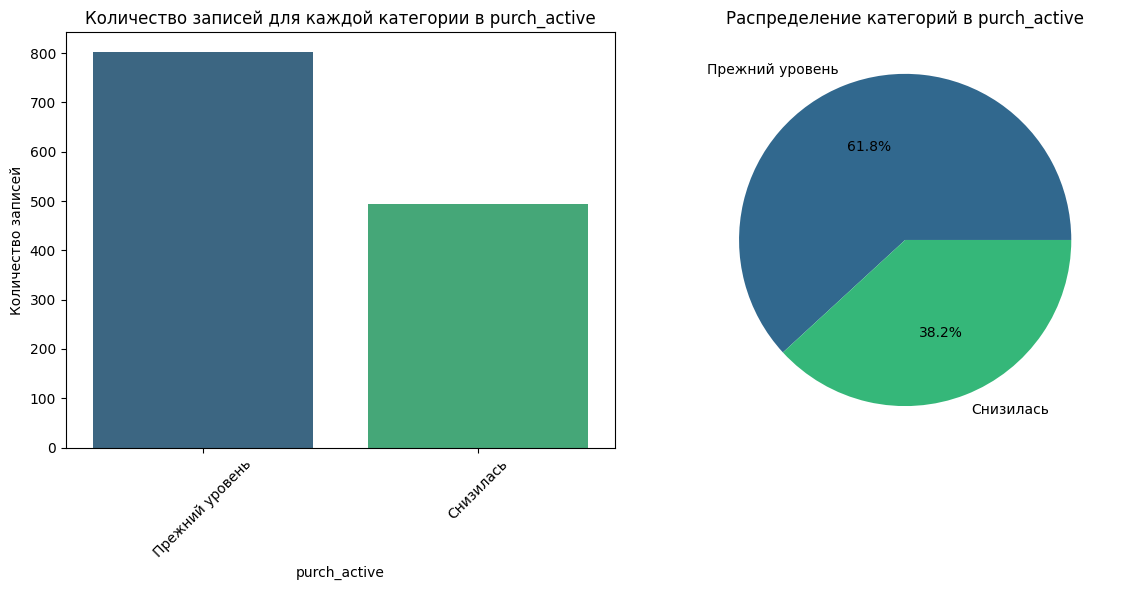

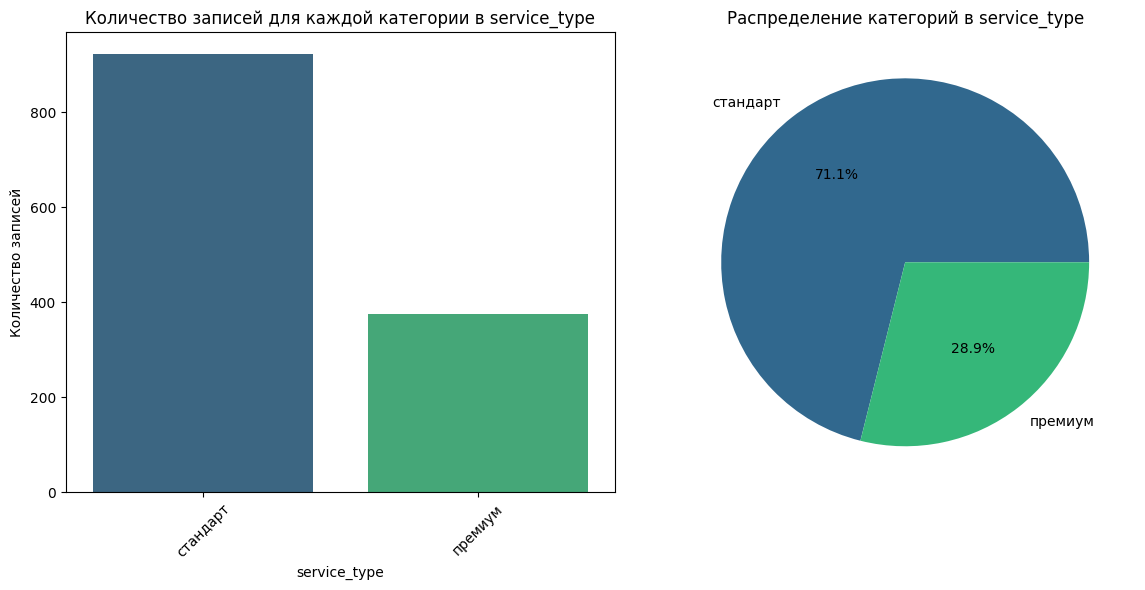

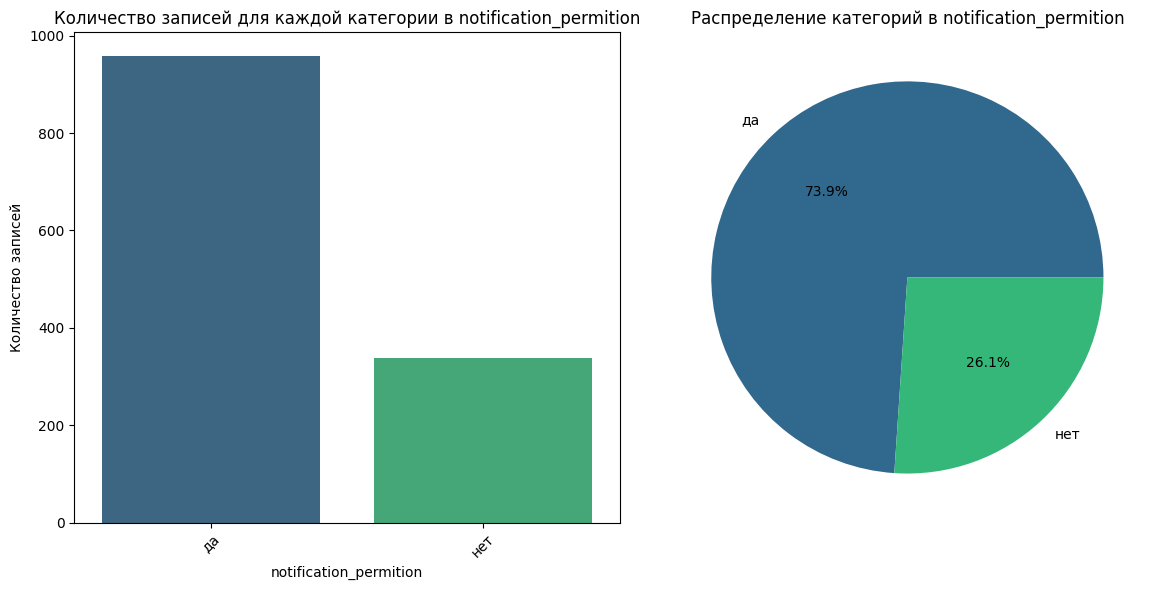

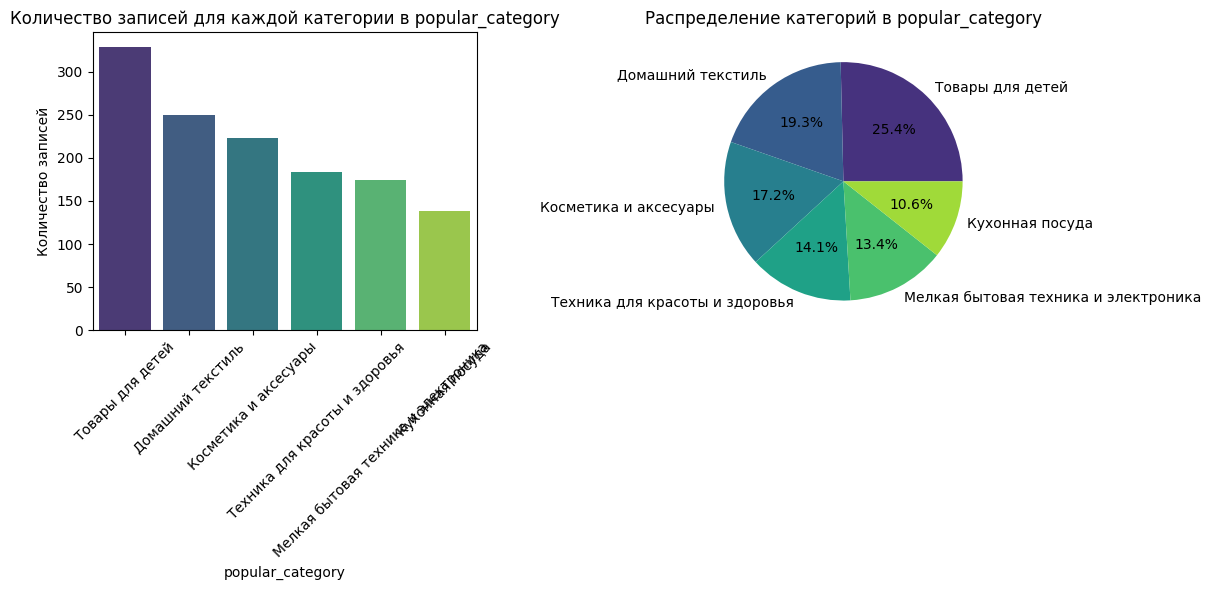

In [37]:
#построим гисторграммы и боксплот для всех числовых полей и столбчатую диаграмму для всех категориальных
plot_eda(market_file)

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Да, вижу.
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Супер!
</div>

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Использование pie-диаграмм для анализа категориальных признаков - отлично!
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Опять же есть разные мнения по данному вопросу. Сам их не очень люблю, но некоторые заказчики любят. Собственно поэтому тут и бар и пай. </font>
</div>

In [38]:
# вывдем статистическую информацию по числовым полям
market_file.describe()

id  market_active_6  market_active_cur     duration  \
count    1297.000000      1297.000000        1297.000000  1297.000000   
mean   215998.986893         4.254433           4.009252   602.993832   
std       374.578554         1.015618           0.696048   249.101456   
min    215349.000000         0.900000           3.000000   121.000000   
25%    215675.000000         3.700000           4.000000   410.000000   
50%    215999.000000         4.200000           4.000000   607.000000   
75%    216323.000000         4.900000           4.000000   806.000000   
max    216647.000000         6.600000           5.000000  1079.000000   

       promotion_purch  avg_cat_view_vizit  nonpaid_items_quater  \
count      1297.000000         1297.000000           1297.000000   
mean          0.320547            3.267540              2.841172   
std           0.249657            1.354623              1.973451   
min           0.110000            1.000000              0.000000   
25%           0.170000            2.000000              1.000000   
50%           0.240000            3.000000              3.000000   
75%           0.300000            4.000000              4.000000   
max           0.990000            6.000000             10.000000   

       service_error  pages_vizit  
count    1297.000000  1297.000000  
mean        4.184271     8.186584  
std         1.950973     3.977061  
min         0.000000     1.000000  
25%         3.000000     5.000000  
50%         4.000000     8.000000  
75%         6.000000    11.000000  
max         9.000000    20.000000

Выполним более детальный обзор распеределения пользователей по различным категориальным признакам. 

In [39]:
# создадим пары сочетаний категориальных признаков
market_file_non_numeric_col = market_file.select_dtypes(exclude=['number']).columns
column_pairs = list(combinations(market_file_non_numeric_col, 2))

In [40]:
# создадим функцию для анализа сочетаний пар признаков
def col_group_view(df, count_col = 'id', cols_for_group = ['breed']):
    group_df = df.groupby(cols_for_group)[count_col].nunique().reset_index()
    group_df['%'] = round(group_df[count_col]/df[count_col].nunique()*100, 2)
    display(group_df)
    return group_df

In [41]:
# применим функцию для всех сочетаний пар
for i in column_pairs:
    col_group_view(market_file, count_col = 'id', cols_for_group = list(i))

purch_active service_type   id      %
0  Прежний уровень      премиум  206  15.88
1  Прежний уровень     стандарт  596  45.95
2        Снизилась      премиум  169  13.03
3        Снизилась     стандарт  326  25.13

purch_active notification_permition   id      %
0  Прежний уровень                     да  591  45.57
1  Прежний уровень                    нет  211  16.27
2        Снизилась                     да  368  28.37
3        Снизилась                    нет  127   9.79

purch_active                      popular_category   id      %
0   Прежний уровень                     Домашний текстиль  149  11.49
1   Прежний уровень                 Косметика и аксесуары  118   9.10
2   Прежний уровень                       Кухонная посуда   72   5.55
3   Прежний уровень  Мелкая бытовая техника и электроника  147  11.33
4   Прежний уровень        Техника для красоты и здоровья  132  10.18
5   Прежний уровень                      Товары для детей  184  14.19
6         Снизилась                     Домашний текстиль  101   7.79
7         Снизилась                 Косметика и аксесуары  105   8.10
8         Снизилась                       Кухонная посуда   66   5.09
9         Снизилась  Мелкая бытовая техника и электроника   27   2.08
10        Снизилась        Техника для красоты и здоровья   51   3.93
11        Снизилась                      Товары для детей  145  11.18

service_type notification_permition   id      %
0      премиум                     да  326  25.13
1      премиум                    нет   49   3.78
2     стандарт                     да  633  48.80
3     стандарт                    нет  289  22.28

service_type                      popular_category   id      %
0       премиум                     Домашний текстиль   73   5.63
1       премиум                 Косметика и аксесуары   79   6.09
2       премиум                       Кухонная посуда   42   3.24
3       премиум  Мелкая бытовая техника и электроника   47   3.62
4       премиум        Техника для красоты и здоровья   43   3.32
5       премиум                      Товары для детей   91   7.02
6      стандарт                     Домашний текстиль  177  13.65
7      стандарт                 Косметика и аксесуары  144  11.10
8      стандарт                       Кухонная посуда   96   7.40
9      стандарт  Мелкая бытовая техника и электроника  127   9.79
10     стандарт        Техника для красоты и здоровья  140  10.79
11     стандарт                      Товары для детей  238  18.35

notification_permition                      popular_category   id      %
0                      да                     Домашний текстиль  186  14.34
1                      да                 Косметика и аксесуары  162  12.49
2                      да                       Кухонная посуда  114   8.79
3                      да  Мелкая бытовая техника и электроника  127   9.79
4                      да        Техника для красоты и здоровья  139  10.72
5                      да                      Товары для детей  231  17.81
6                     нет                     Домашний текстиль   64   4.93
7                     нет                 Косметика и аксесуары   61   4.70
8                     нет                       Кухонная посуда   24   1.85
9                     нет  Мелкая бытовая техника и электроника   47   3.62
10                    нет        Техника для красоты и здоровья   44   3.39
11                    нет                      Товары для детей   98   7.56

In [42]:
#применим функцию для всех категориальных признаков вместе
a = col_group_view(market_file, count_col = 'id', cols_for_group = list(market_file_non_numeric_col))

purch_active service_type notification_permition  \
0   Прежний уровень      премиум                     да   
1   Прежний уровень      премиум                     да   
2   Прежний уровень      премиум                     да   
3   Прежний уровень      премиум                     да   
4   Прежний уровень      премиум                     да   
5   Прежний уровень      премиум                     да   
6   Прежний уровень      премиум                    нет   
7   Прежний уровень      премиум                    нет   
8   Прежний уровень      премиум                    нет   
9   Прежний уровень      премиум                    нет   
10  Прежний уровень      премиум                    нет   
11  Прежний уровень      премиум                    нет   
12  Прежний уровень     стандарт                     да   
13  Прежний уровень     стандарт                     да   
14  Прежний уровень     стандарт                     да   
15  Прежний уровень     стандарт                     да   
16  Прежний уровень     стандарт                     да   
17  Прежний уровень     стандарт                     да   
18  Прежний уровень     стандарт                    нет   
19  Прежний уровень     стандарт                    нет   
20  Прежний уровень     стандарт                    нет   
21  Прежний уровень     стандарт                    нет   
22  Прежний уровень     стандарт                    нет   
23  Прежний уровень     стандарт                    нет   
24        Снизилась      премиум                     да   
25        Снизилась      премиум                     да   
26        Снизилась      премиум                     да   
27        Снизилась      премиум                     да   
28        Снизилась      премиум                     да   
29        Снизилась      премиум                     да   
30        Снизилась      премиум                    нет   
31        Снизилась      премиум                    нет   
32        Снизилась      премиум                    нет   
33        Снизилась      премиум                    нет   
34        Снизилась      премиум                    нет   
35        Снизилась     стандарт                     да   
36        Снизилась     стандарт                     да   
37        Снизилась     стандарт                     да   
38        Снизилась     стандарт                     да   
39        Снизилась     стандарт                     да   
40        Снизилась     стандарт                     да   
41        Снизилась     стандарт                    нет   
42        Снизилась     стандарт                    нет   
43        Снизилась     стандарт                    нет   
44        Снизилась     стандарт                    нет   
45        Снизилась     стандарт                    нет   
46        Снизилась     стандарт                    нет   

                        popular_category  id     %  
0                      Домашний текстиль  41  3.16  
1                  Косметика и аксесуары  26  2.00  
2                        Кухонная посуда  16  1.23  
3   Мелкая бытовая техника и электроника  35  2.70  
4         Техника для красоты и здоровья  24  1.85  
5                       Товары для детей  40  3.08  
6                      Домашний текстиль   3  0.23  
7                  Косметика и аксесуары   6  0.46  
8                        Кухонная посуда   4  0.31  
9   Мелкая бытовая техника и электроника   2  0.15  
10        Техника для красоты и здоровья   2  0.15  
11                      Товары для детей   7  0.54  
12                     Домашний текстиль  74  5.71  
13                 Косметика и аксесуары  59  4.55  
14                       Кухонная посуда  39  3.01  
15  Мелкая бытовая техника и электроника  71  5.47  
16        Техника для красоты и здоровья  72  5.55  
17                      Товары для детей  94  7.25  
18                     Домашний текстиль  31  2.39  
19                 Косметика и аксесуары  27  2.08  
20                       Кухонная посуда  13  1.00  
21  Мелк

## Данные о выручке, которую получает магазин с покупателя


Непрерывный признак: revenue


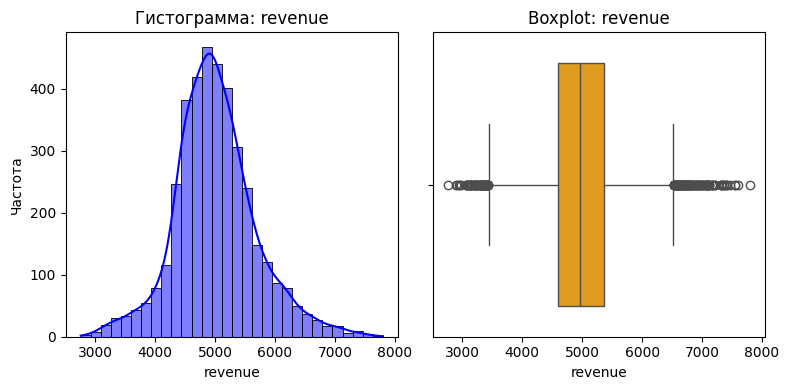

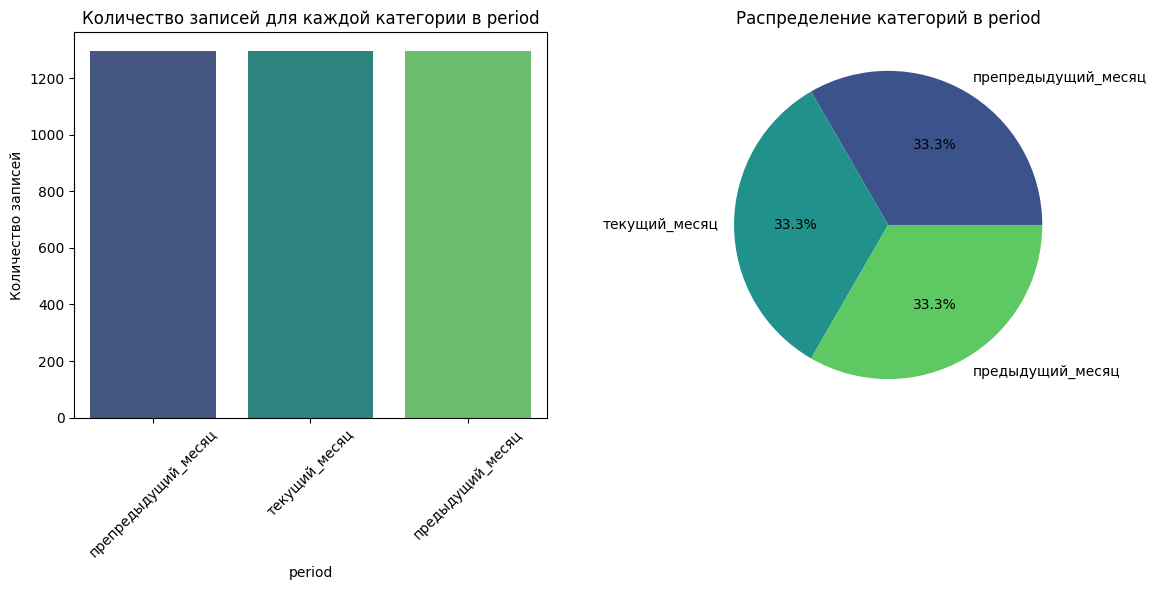

In [43]:
#построим гисторграммы и боксплот для всех числовых полей и столбчатую диаграмму для всех категориальных
plot_eda(market_money, hist_bins = 30)

In [44]:
# вывдем статистическую информацию по числовым полям
market_money.describe()

id      revenue
count    3891.000000  3891.000000
mean   215998.986893  5007.216140
std       374.482249   678.933002
min    215349.000000  2758.700000
25%    215675.000000  4592.000000
50%    215999.000000  4958.000000
75%    216323.000000  5363.000000
max    216647.000000  7799.400000

## Данные о времени (в минутах)


Дискретный признак: min


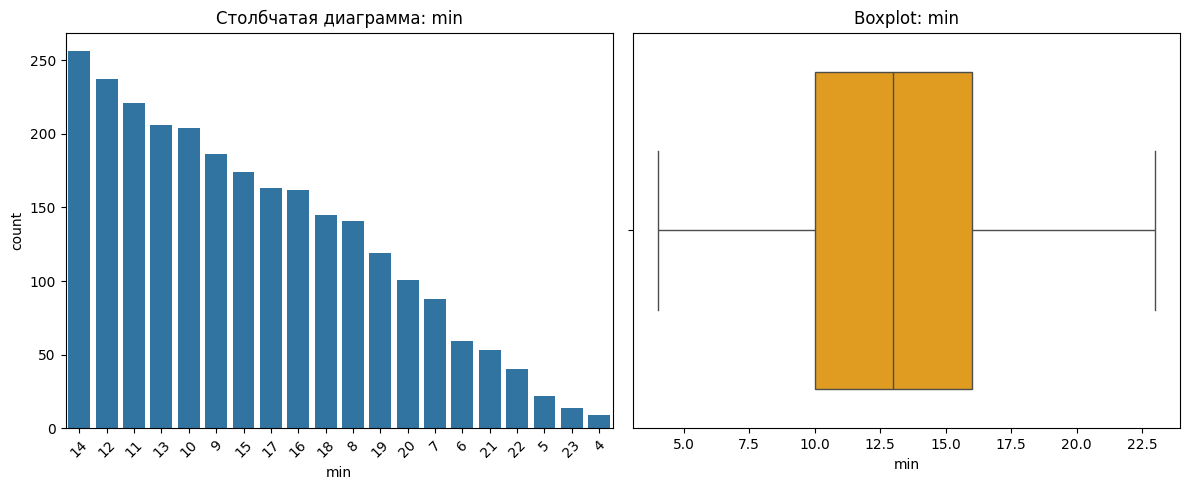

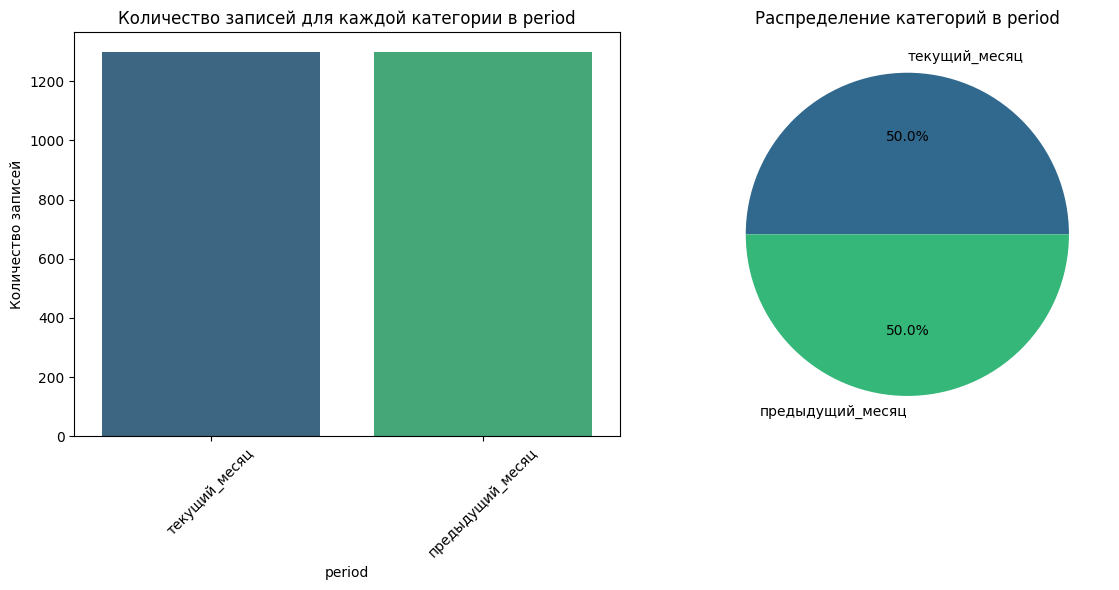

In [45]:
#построим гисторграммы и боксплот для всех числовых полей и столбчатую диаграмму для всех категориальных
plot_eda(market_time, hist_bins = 30)

In [46]:
# вывдем статистическую информацию по числовым полям
market_time.describe()

id          min
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

## Данные о среднемесячной прибыли покупателя за последние 3 месяца


Непрерывный признак: revenue


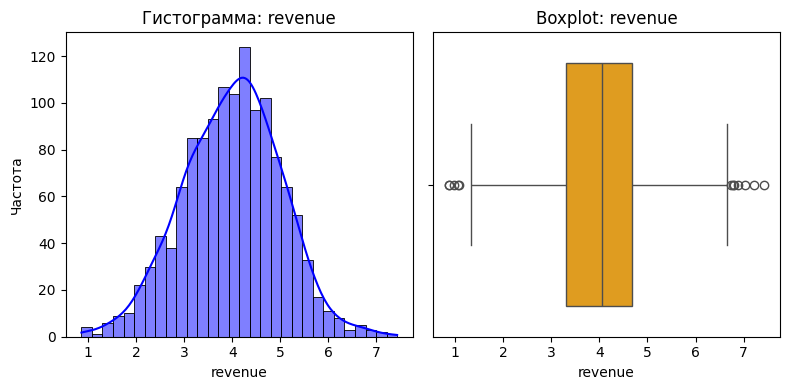

In [47]:
#построим гисторграммы и боксплот для всех числовых полей и столбчатую диаграмму для всех категориальных
plot_eda(money, hist_bins = 30)

In [48]:
# вывдем статистическую информацию по числовым полям
money.describe()

id      revenue
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

## Оставим только тех пользователей, который покупали в последние 3 мес

In [49]:
users_purch_3_list = list(money['id'].unique())

In [50]:
market_money = market_money[market_money['id'].isin(users_purch_3_list)]
market_file = market_file[market_file['id'].isin(users_purch_3_list)]
market_time = market_time[market_time['id'].isin(users_purch_3_list)]

Проверим преобразования:

In [51]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1297 non-null   int64  
 1   purch_active            1297 non-null   object 
 2   service_type            1297 non-null   object 
 3   notification_permition  1297 non-null   object 
 4   market_active_6         1297 non-null   float64
 5   market_active_cur       1297 non-null   int64  
 6   duration                1297 non-null   int64  
 7   promotion_purch         1297 non-null   float64
 8   popular_category        1297 non-null   object 
 9   avg_cat_view_vizit      1297 non-null   int64  
 10  nonpaid_items_quater    1297 non-null   int64  
 11  service_error           1297 non-null   int64  
 12  pages_vizit             1297 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 141.9+ KB


In [52]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   period   3891 non-null   object 
 2   revenue  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


In [53]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   period  2600 non-null   object
 2   min     2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.2+ KB


## Общий вывод

*Датафрейм market_file:*\
Кол-во клиентов, у которых снизилась покупательская активность составляет 38,2%.\
Большинство клиентов имеют тип сервиса "стандарт" - 71.1%.\
Уведомления разрешены у 73.9% клиентов.\
Самые популярные категории: товары для детей, домашний текстиль, косметика и аксессуары.


*Датафрейм market_money:*\
В данных имеются сведения о 3х периодах: препредыдущий период, предыдущий период, текущий период. Распеределение близко к нормальному. Между периодами данные распеределены поровну. 

*Датафрейм market_time:*\
В данных имеются сведения за предыдудщий и текущий периоды. Данные между периодами распределены поровну. Медианное время, проведенное на сайте - 13 мин. 

*Датафрейм money:*\
Распеределение среднемесячной прибыли с покупателя близко к нормлаьному.  

Во всех датафреймах отфильтрованы  пользователи с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

# Объединение таблиц

In [54]:
market_money_pt = market_money.pivot_table(index='id', columns='period', values='revenue').reset_index()
market_money_pt = market_money_pt.rename(columns={
    'предыдущий_месяц':'last_month_revenue', 
    'препредыдущий_месяц':'prelast_month_revenue',
    'текущий_месяц':'current_month_revenue'
})

In [55]:
market_money_pt.head()

period      id  last_month_revenue  prelast_month_revenue  \
0       215349              5216.0                 4472.0   
1       215350              5457.5                 4826.0   
2       215351              6158.0                 4793.0   
3       215352              5807.5                 4594.0   
4       215353              4738.5                 5124.0   

period  current_month_revenue  
0                      4971.6  
1                      5058.4  
2                      6610.4  
3                      5872.5  
4                      5388.5

In [56]:
market_time_pt = market_time.pivot_table(index='id', columns='period', values='min').reset_index()
market_time_pt = market_time_pt.rename(columns={
    'предыдущий_месяц':'last_month_time', 
    'текущий_месяц':'current_month_time'
})

In [57]:
market_time_pt.head()

period      id  last_month_time  current_month_time
0       215348               13                  14
1       215349               12                  10
2       215350                8                  13
3       215351               11                  13
4       215352                8                  11

In [58]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1297 non-null   int64  
 1   purch_active            1297 non-null   object 
 2   service_type            1297 non-null   object 
 3   notification_permition  1297 non-null   object 
 4   market_active_6         1297 non-null   float64
 5   market_active_cur       1297 non-null   int64  
 6   duration                1297 non-null   int64  
 7   promotion_purch         1297 non-null   float64
 8   popular_category        1297 non-null   object 
 9   avg_cat_view_vizit      1297 non-null   int64  
 10  nonpaid_items_quater    1297 non-null   int64  
 11  service_error           1297 non-null   int64  
 12  pages_vizit             1297 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 141.9+ KB


In [59]:
final_df = market_file.merge(market_money_pt, on='id', how='left')
final_df = final_df.merge(market_time_pt, on='id', how='left')

In [60]:
final_df.head()

id purch_active service_type notification_permition  market_active_6  \
0  215349    Снизилась      премиум                     да              4.4   
1  215350    Снизилась     стандарт                    нет              4.9   
2  215351    Снизилась     стандарт                     да              3.2   
3  215352    Снизилась     стандарт                    нет              5.1   
4  215353    Снизилась     стандарт                     да              3.3   

   market_active_cur  duration  promotion_purch   popular_category  \
0                  4       819             0.75   Товары для детей   
1                  3       539             0.14  Домашний текстиль   
2                  5       896             0.99   Товары для детей   
3                  3      1064             0.94   Товары для детей   
4                  4       762             0.26  Домашний текстиль   

   avg_cat_view_vizit  nonpaid_items_quater  service_error  pages_vizit  \
0                   4                     4              2            5   
1                   5                     2              1            5   
2                   5                     0              6            4   
3                   3                     2              3            2   
4                   4                     1              1            4   

   last_month_revenue  prelast_month_revenue  current_month_revenue  \
0              5216.0                 4472.0                 4971.6   
1              5457.5                 4826.0                 5058.4   
2              6158.0                 4793.0                 6610.4   
3              5807.5                 4594.0                 5872.5   
4              4738.5                 5124.0                 5388.5   

   last_month_time  current_month_time  
0               12                  10  
1                8                  13  
2               11                  13  
3                8                  11  
4               10                  10

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1297 non-null   int64  
 1   purch_active            1297 non-null   object 
 2   service_type            1297 non-null   object 
 3   notification_permition  1297 non-null   object 
 4   market_active_6         1297 non-null   float64
 5   market_active_cur       1297 non-null   int64  
 6   duration                1297 non-null   int64  
 7   promotion_purch         1297 non-null   float64
 8   popular_category        1297 non-null   object 
 9   avg_cat_view_vizit      1297 non-null   int64  
 10  nonpaid_items_quater    1297 non-null   int64  
 11  service_error           1297 non-null   int64  
 12  pages_vizit             1297 non-null   int64  
 13  last_month_revenue      1297 non-null   float64
 14  prelast_month_revenue   1297 non-null   

# Корреляционный анализ признаков

In [62]:
def custom_plot_correlation_matrix(df, method='pearson', figsize=(10, 8), annot=True):
    # Исключаем столбцы, содержащие 'id'
    filtered_df = df[[col for col in df.columns if 'id' not in col.lower()]]
    # Выбираем только числовые признаки
    numeric_df = filtered_df.select_dtypes(include=['number'])
    
    # Проверяем, есть ли числовые признаки
    if numeric_df.empty:
        print("В DataFrame нет числовых признаков.")
        return
    
    # Расчёт матрицы корреляций
    correlation_matrix = numeric_df.corr(method=method)
    
    # Построение тепловой карты
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f'Матрица корреляций ({method})')
    plt.show()

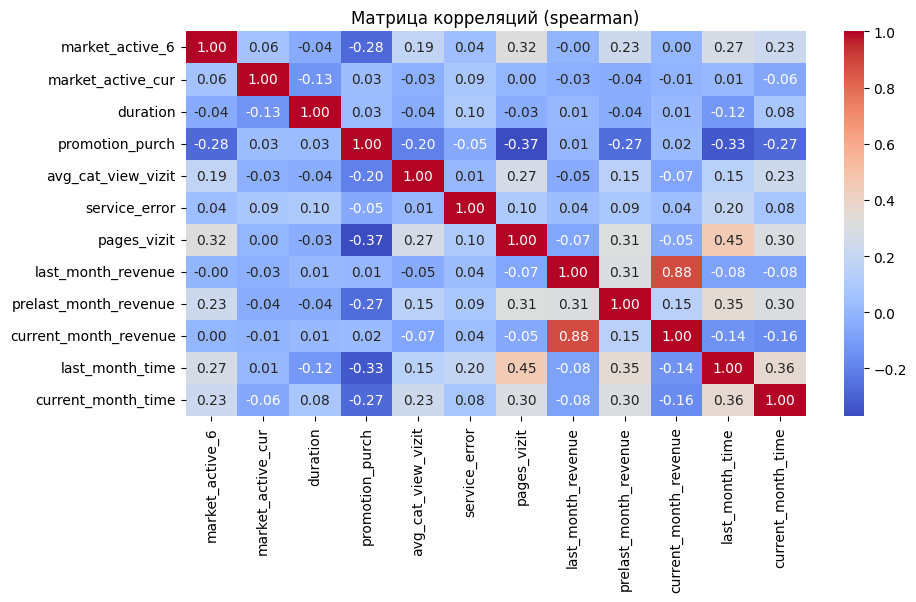

In [63]:
# т.к. данные распределены ненормально, то используем метод Спирмана
custom_plot_correlation_matrix(final_df, method='spearman', figsize=(10, 5), annot=True)

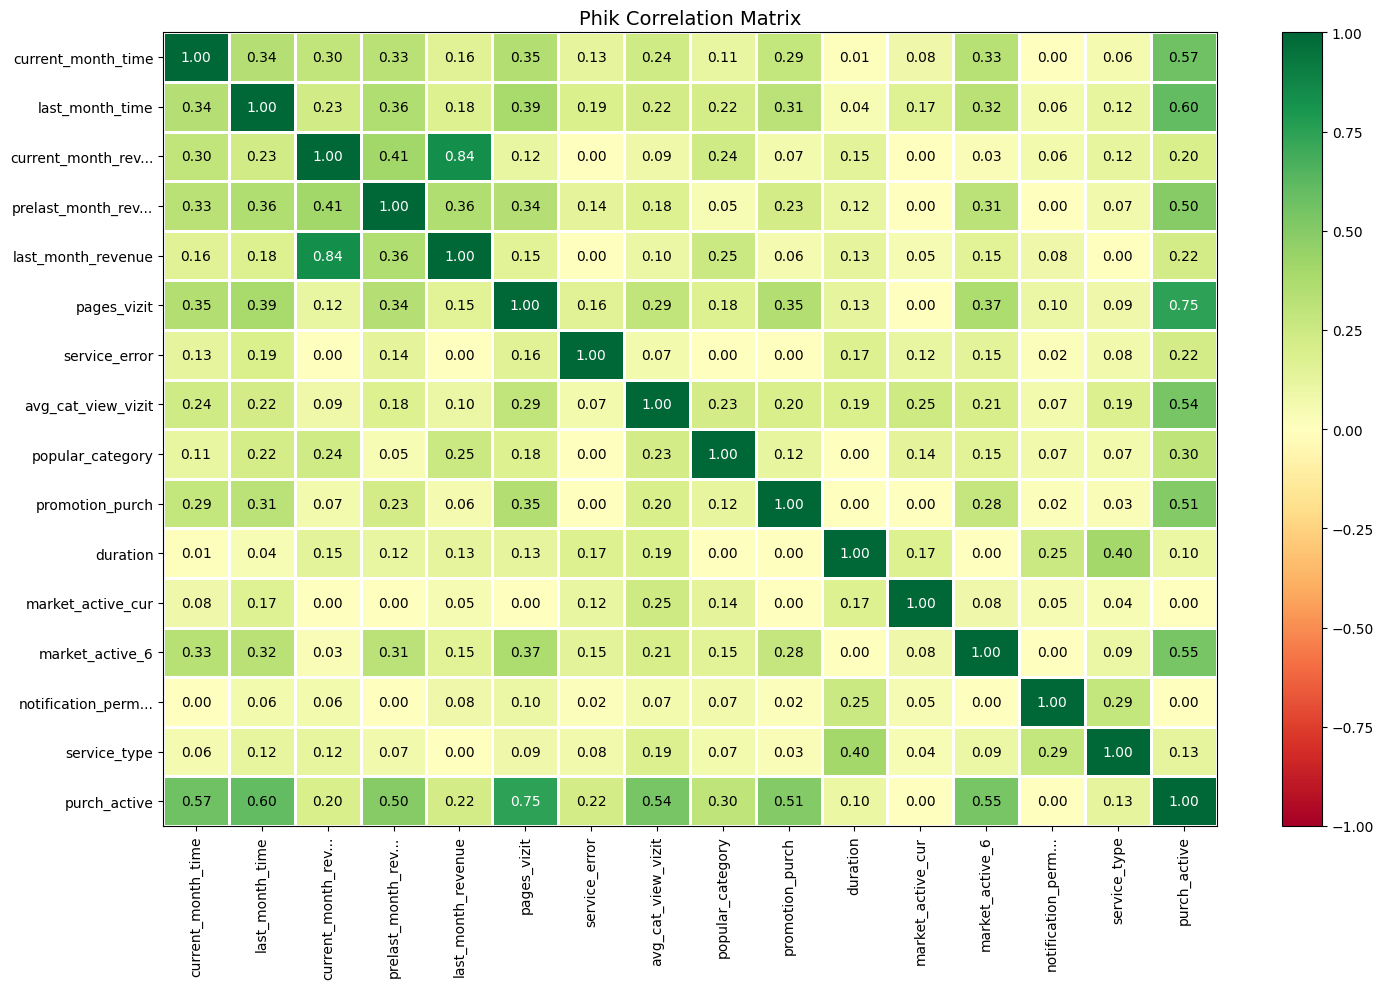

In [64]:
# проверим зависимость от всех признаков, в том числе категориальных, используя phik
columns_to_analyze = [col for col in final_df.columns if 'id' not in col.lower()]

# определение непрерывных признаков
interval_cols = final_df.select_dtypes(include=['float', 'int']).columns
interval_cols = [col for col in interval_cols if final_df[col].nunique() > 20] 

phik_corr_matrix = final_df[columns_to_analyze].phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_corr_matrix.values,
                        x_labels=phik_corr_matrix.columns,
                        y_labels=phik_corr_matrix.index,
                        title="Phik Correlation Matrix",
                        figsize=(15, 10))
plt.show()

## Общий вывод

1. **Сильные корреляции:**

purch_active (целевой признак) и last_month_time — 0.60.\
purch_active(целевой признак) и pages_vizit — 0.75.\
current_month_revenue и last_month_revenue — 0.84.\
pages_vizit и last_month_time — 0.39.\
Вывод:\
Активность покупок (purch_active) положительно связана с активностью на сайте, временем и количеством посещений (pages_vizit).
Доходы за текущий месяц (current_month_revenue) и прошлый месяц (last_month_revenue) ожидаемо сильно связаны. Также ожидаемо взаимосвязаны кол-во посещенных страниц и время проведенное на сайте. 

2. **Умеренные корреляции:**

prelast_month_revenue и last_month_time — 0.36.\
pages_vizit и promotion_purch — 0.35.\
market_active_6 и current_month_time — 0.33.\
Вывод:\
Посещения и время влияют на промо-покупки, но влияние умеренное.\
Активность маркетинга за последние 6 месяцев показывает умеренную связь с временем, проведенным на сайте и кол-вом посещенных страниц.

3. **Слабые корреляции:**

service_type, service_error, notification_perm — слабо коррелируют с большинством признаков.\
Значения близкие к 0.00–0.10 указывают на отсутствие значимой связи.\
Вывод:\
Типы сервиса и ошибки не оказывают сильного влияния на активность или доходы.\

Отсутствие обратных корреляций:\
Значения Phik не уходят в отрицательную область, что означает, что все признаки скорее положительно связаны друг с другом, пусть и в разной степени. 

# Моделирование

## Пайплайн

В качестве основной метрики модели будем использовать roc_auc, т.к.:
1. Устойчива к дисбалансу: Оценивает способность модели различать классы независимо от их распределения, что делает её лучше, чем accuracy в несбалансированных данных.
2. Использует вероятности: Учитывает вероятности предсказаний, а не только конечные классы, что отражает уверенность модели.
3. Чувствительность и специфичность: Оценивает модель по всем возможным порогам, отображая баланс между false positives и true positives.
4. Понятная интерпретация: Значения от 0.5 (угадывание) до 1.0 (идеальная модель) легко сравнивать.
5. Гибкость: Подходит для задач с неопределённым порогом и используется для бинарных и многоклассовых классификаций.

In [65]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df.drop(['id','purch_active'], axis=1),
    final_df['purch_active'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = final_df['purch_active'])

In [67]:
X_train.shape, X_test.shape

((1037, 16), (260, 16))

In [68]:
final_df.popular_category.unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Кухонная посуда', 'Техника для красоты и здоровья',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [69]:
y_train.value_counts()

Прежний уровень    641
Снизилась          396
Name: purch_active, dtype: int64

In [70]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [71]:
class_mapping = dict(zip(le.classes_, range(len(le.classes_))))

print("Соответствие классов после кодирования:")
for original_class, encoded_value in class_mapping.items():
    print(f"{original_class}: {encoded_value}")

Соответствие классов после кодирования:
Прежний уровень: 0
Снизилась: 1


In [72]:
# создаём списки с названиями признаков
ohe_columns = ['popular_category', 'notification_permition']
ord_columns = ['service_type']
num_columns = X_train.select_dtypes(include=['number']).columns

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': range(1, len(X_train.columns)+1),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression() c l1 регулиризацией
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1',
            class_weight='balanced'
        )],
        'models__C': [0.01, 0.1, 1, 10, 100, 1000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression() c l2 регулиризацией
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='lbfgs',  
            penalty='l2',  
            class_weight='balanced'
        )],
        'models__C': [0.01, 0.1, 1, 10, 100, 1000],  # Коэффициент регуляризации
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, class_weight='balanced', probability=True)],
        'models__C': [0.01, 0.1, 1, 10, 100, 1000],  
        'models__kernel': ['linear', 'rbf'], 
        'models__gamma': ['scale', 'auto'],  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

# определяем несколько метрик
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# randomized_search = RandomizedSearchCV(
#     pipe_final, 
#     param_grid, 
#     cv=5,
#     scoring='roc_auc',
#     random_state=RANDOM_STATE,
#     n_jobs=-1
# )
# randomized_search.fit(X_train, y_train)

# т.к. объем данных в датасете небольшой, то допустимо применить GridSearchCV
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring=scoring,  
    refit='roc_auc',   
    n_jobs = -1
)
grid.fit(X_train, y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['popular_category',
                                                                          'notification_permition']),
                                                                        ('ord',
                                                                         Pipeline(step...
                                                'passthrough']},
                         {'models': [SVC(class_weight='balanced',
                                         probability=True, random_state=42)],
                          'models__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'models__gamma': ['scale', 'auto'],
                          'models__kernel': ['linear', 'rbf'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             refit='roc_auc',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

### Метрики 

In [73]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['popular_category',
                                                   'notification_permition']),
                                                 ('ord',
                                 

In [74]:
# Преобразуем cv_results_ в DataFrame
results = pd.DataFrame(grid.cv_results_)

# Список моделей
model_names = results['param_models'].apply(lambda x: str(x)).unique()

# Создадим таблицу для хранения лучших метрик каждой модели
best_models = []

for model_name in model_names:
    # Фильтрация строк для текущей модели
    model_results = results[results['param_models'].apply(lambda x: str(x)) == model_name]
    
    # Находим строку с лучшей roc_auc (можно заменить на другую метрику)
    best_row = model_results.loc[model_results['mean_test_roc_auc'].idxmax()]
    
    # Сохраняем информацию о лучших метриках
    best_models.append({
        'model': model_name,
        'params': best_row['params'],
        'roc_auc': best_row['mean_test_roc_auc'],
        'precision': best_row['mean_test_precision'],
        'recall': best_row['mean_test_recall'],
        'f1': best_row['mean_test_f1']
    })

# Выводим лучшие метрики для каждой модели
print("Лучшие метрики для каждой модели:")
for model_info in best_models:
    print(f"\nМодель: {model_info['model']}")
    print(f"Параметры: {model_info['params']}")
    print(f"ROC AUC: {model_info['roc_auc']:.4f}")
    print(f"Precision: {model_info['precision']:.4f}")
    print(f"Recall: {model_info['recall']:.4f}")
    print(f"F1-score: {model_info['f1']:.4f}")

Лучшие метрики для каждой модели:

Модель: DecisionTreeClassifier(random_state=42)
Параметры: {'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 5, 'models__max_features': 6, 'preprocessor__num': StandardScaler()}
ROC AUC: 0.8600
Precision: 0.8966
Recall: 0.7321
F1-score: 0.8036

Модель: KNeighborsClassifier()
Параметры: {'models': KNeighborsClassifier(), 'models__n_neighbors': 19, 'preprocessor__num': StandardScaler()}
ROC AUC: 0.9025
Precision: 0.9212
Recall: 0.7222
F1-score: 0.8085

Модель: LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')
Параметры: {'models': LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear'), 'models__C': 0.1, 'preprocessor__num': StandardScaler()}
ROC AUC: 0.8999
Precision: 0.7970
Recall: 0.8056
F1-score: 0.7999

Модель: LogisticRegression(class_weight='balanced', random_state=42)
Параметры: {'models': LogisticRegre

### Визулизация метрик

In [75]:
# Укорачиваем названия моделей и различаем по регуляризации для LogisticRegression
def shorten_model_name(model):
    model_str = str(model)
    if 'LogisticRegression' in model_str:
        if "penalty='l1'" in model_str:
            return 'LogisticRegression (L1)'
        else: 
            return 'LogisticRegression (L2)'
    elif 'SVC' in model_str:
        return 'SVC'
    elif 'DecisionTreeClassifier' in model_str:
        return 'DecisionTree'
    elif 'KNeighborsClassifier' in model_str:
        return 'KNeighbors'
    else:
        return model_str.split('(')[0] 

# Применяем функцию для укорочения названий
results['short_model_names'] = results['param_models'].apply(shorten_model_name)

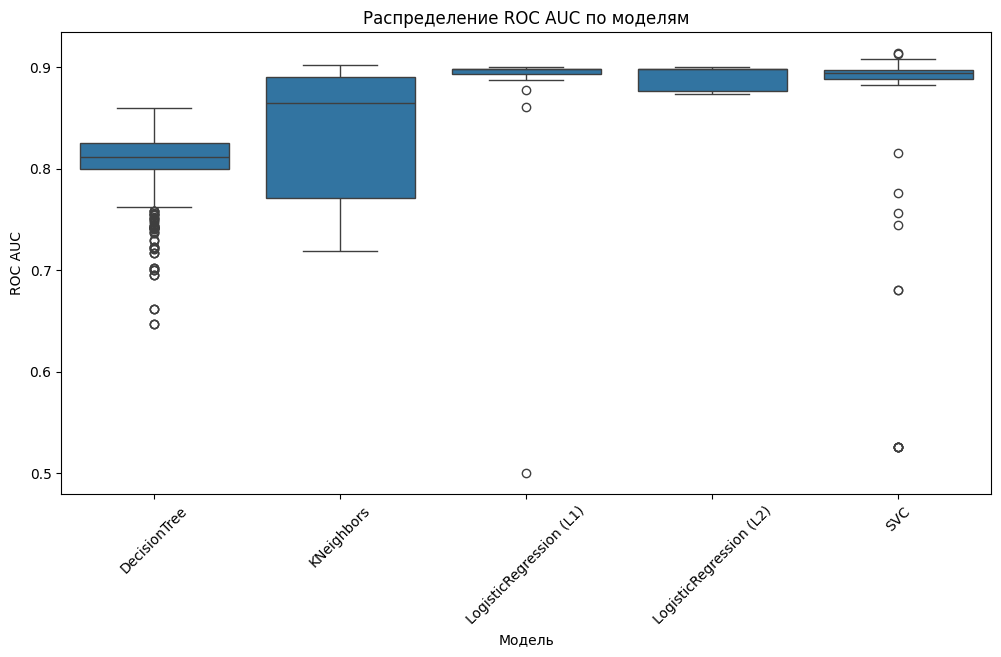

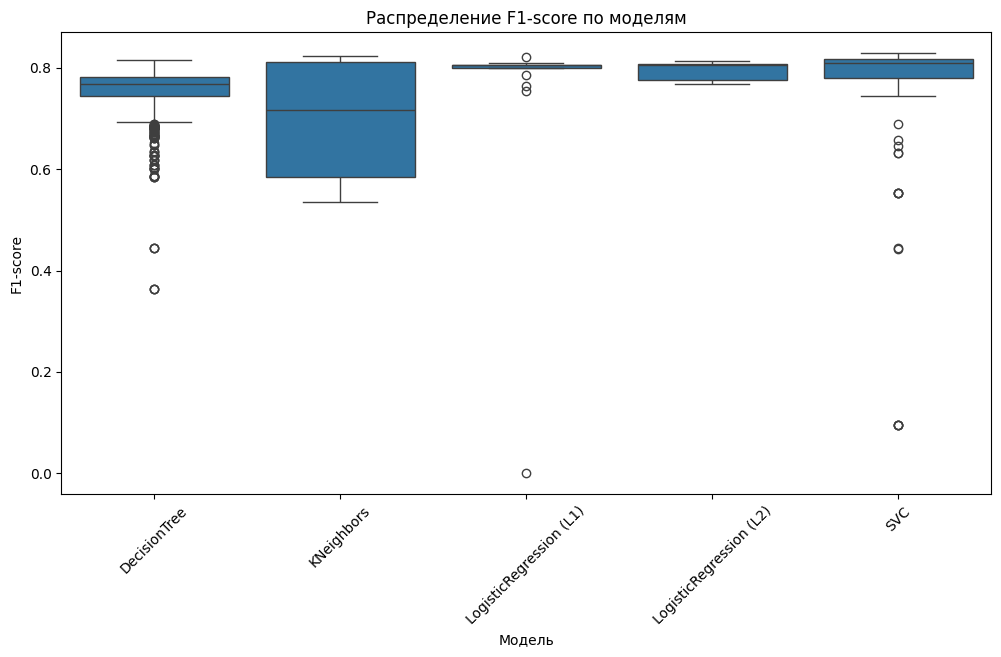

In [76]:
# Визуализация ROC AUC по моделям
plt.figure(figsize=(12, 6))
sns.boxplot(x='short_model_names', y='mean_test_roc_auc', data=results)
plt.title('Распределение ROC AUC по моделям')
plt.xlabel('Модель')
plt.ylabel('ROC AUC')
plt.xticks(rotation=45)  
plt.show()

# Визуализация F1-score по моделям
plt.figure(figsize=(12, 6))
sns.boxplot(x='short_model_names', y='mean_test_f1', data=results)
plt.title('Распределение F1-score по моделям')
plt.xlabel('Модель')
plt.ylabel('F1-score')
plt.xticks(rotation=45) 
plt.show()

### Проверка на тестовой выборке

Проверим на тестовых данных лучшую модель - SVC:

In [77]:
# Получение лучшей модели
best_model = grid.best_estimator_

# Предсказания на тестовых данных
y_test_pred = best_model.predict(X_test)  
y_test_proba = best_model.predict_proba(X_test)[:, 1] 

# Расчёт метрик
test_metrics = {
    'roc_auc': roc_auc_score(y_test_enc, y_test_proba),
    'precision': precision_score(y_test_enc, y_test_pred, zero_division=0),
    'recall': recall_score(y_test_enc, y_test_pred, zero_division=0),
    'f1': f1_score(y_test_enc, y_test_pred, zero_division=0)
}

# Вывод метрик
print("Метрики на тестовых данных:")
for metric, value in test_metrics.items():
    print(f'{metric}: {value:.4f}')

Метрики на тестовых данных:
roc_auc: 0.9252
precision: 0.8817
recall: 0.8283
f1: 0.8542


### Общий вывод

Были проанализированы 4 модели и выполнен подбор их гиперпараметров с использованием пайплайна.

Лучшей моделью по итогам расчетов является SVC с параметрами на кросс-валидации:\
Параметры: {'models': SVC(class_weight='balanced', probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'auto', 'models__kernel': 'rbf', 'preprocessor__num': StandardScaler()}\
ROC AUC: 0.9138\
Precision: 0.8996\
Recall: 0.7676\
F1-score: 0.8263

Метрики модели SVC на тестовой выборке:\
roc_auc: 0.9252\
precision: 0.8817\
recall: 0.8283\
f1: 0.8542

## Анализ важности признаков

PermutationExplainer explainer: 101it [01:36,  1.01it/s]                                                               


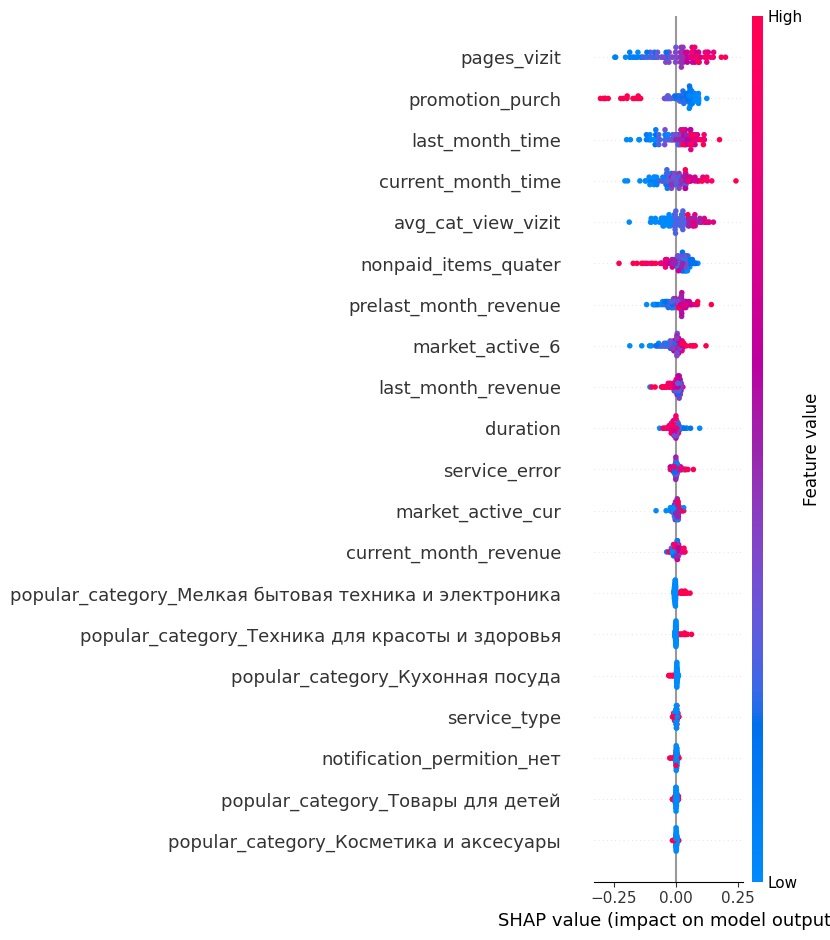

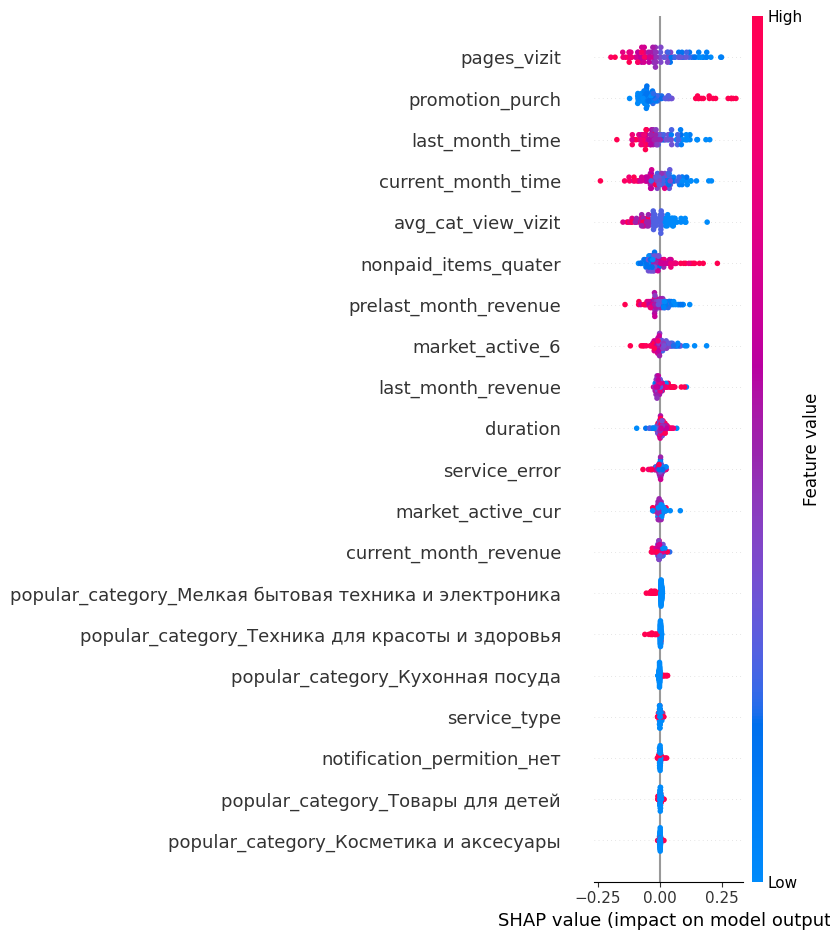

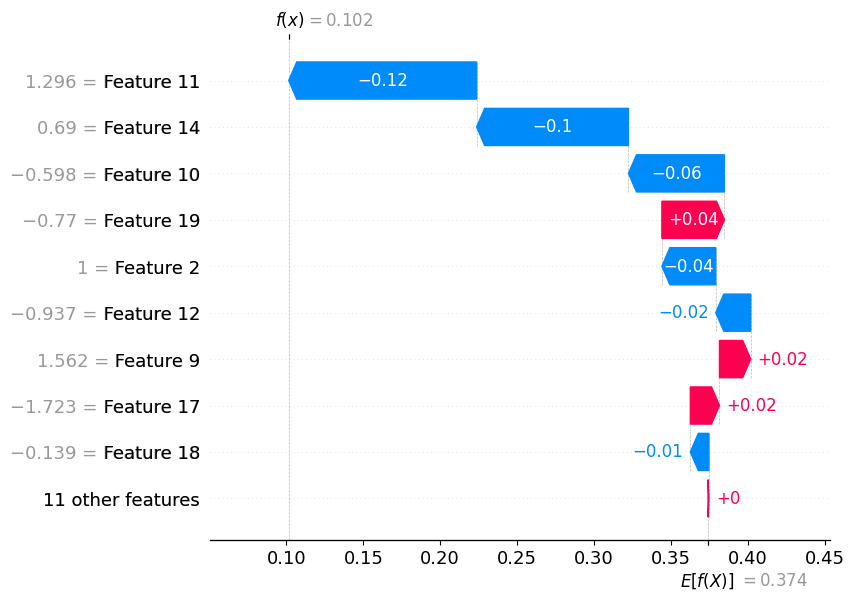

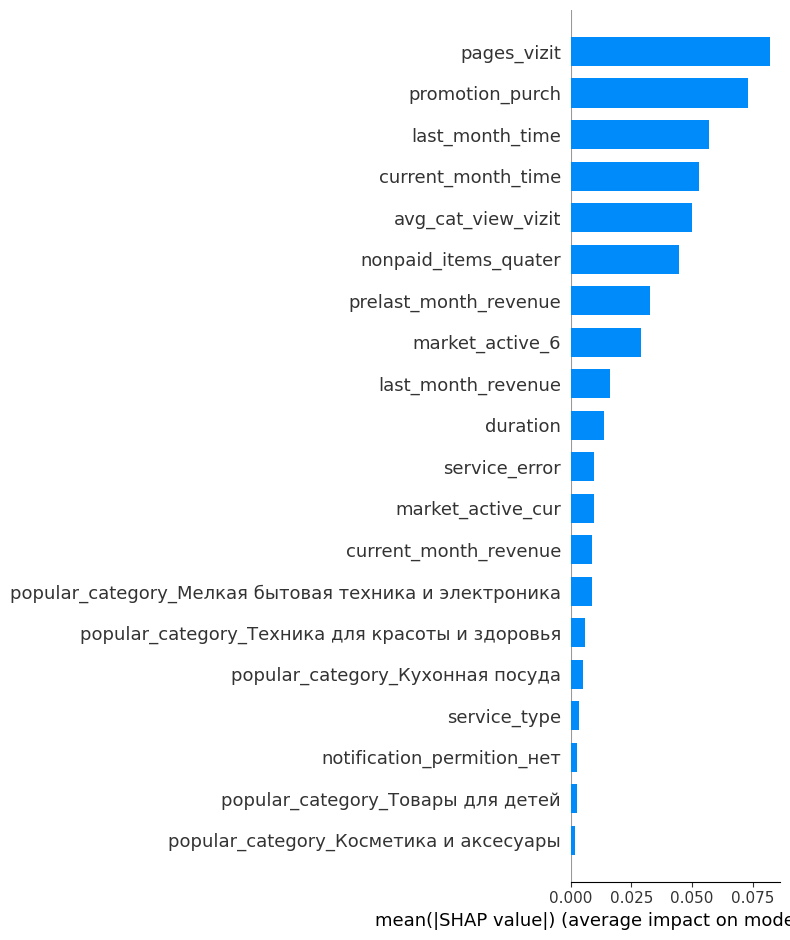

In [78]:
#Анализ важности признаков для модели SVC 
#shap
import shap
shap.initjs()

# лучший пайплайн (из grid.best_estimator_)
best_pipeline = grid.best_estimator_

# Извлекаем модель
best_model = best_pipeline.named_steps['models']

# Преобразуем обучающие данные
X_preprocessed = best_pipeline.named_steps['preprocessor'].transform(X_train)

# Получаем имена признаков после трансформации
ohe_feature_names = best_pipeline.named_steps['preprocessor'].named_transformers_['ohe']['ohe'].get_feature_names_out(ohe_columns)
all_feature_names = np.concatenate([ohe_feature_names, ord_columns, num_columns])

# Уменьшаем фон для ускорения
background = shap.sample(X_preprocessed, 50)  # Случайная подвыборка из 50 образцов
explainer = shap.Explainer(best_model.predict_proba, background)

# Вычисляем SHAP-значения для первых 100 строк
#shap_values = explainer.shap_values(X_preprocessed[:100])
shap_values = explainer(X_preprocessed[:100])


# Визуализация с указанием названий признаков
# Визуализация для класса 0
shap.summary_plot(shap_values[..., 0], X_preprocessed[:100], feature_names=all_feature_names)

# Визуализация для класса 1
shap.summary_plot(shap_values[..., 1], X_preprocessed[:100], feature_names=all_feature_names)

# Визуализация водопадного графика для первого объекта
shap.waterfall_plot(
    shap_values[0, :, 1]
)

# Визуализация важности признаков в виде бара
shap.summary_plot(
    shap_values[..., 1],      
    feature_names=all_feature_names,
    plot_type="bar"
)

### Общий вывод

Признаки у нас закодированы следующим образом:\
0 - прежний уровень\
1 - активность снизилась

Таким образом, из анализа графиков shap видим, что наибольшее влияние на отнесение к классу 0 (т.е чем выше значение, тем больше вероятность отнесения к данному классу) оказывают признаки:

pages_vizit (Страниц_за_визит) — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;\
avg_cat_view_vizit (Средний_просмотр_категорий_за_визит) — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;\
last_month_time - время, провденное пользователем на сайте в прошлом месяце;\
current_month_time - время, провденное пользователем на сайте в текущем месяце;\
promotion_purch (Акционные_покупки) - имеет обратную взаимосвзяь, т.е. чем меньше акционных покупок совершает пользователь, тем больше вероятность, что его активность не снизится. Аналогичная ситуация и с неопалченными товарами.

Малозначимые признаки для модели:

notification_permition (Разрешить сообщать), service_type (Тип сервиса), market_active_cur (Кол-во маркетинговых коммуникаций в тек месяце), current_month_revenue (прибыль в текущем месяце), service_error (Ошибка_сервиса)

Значения важности признаков, полученные в ходе анализа выглядят логичными и отражают логичное поведение пользователей.

При моделировании и "тюнинге" модели можно попробовать данные признаки удалить и посмотреть как это повлияет на метрики. С точки зрения бизнеса мы видим что маркетинговые комммуникации и тип сервиса не оказывают особенного влияния на вероятность снижения активности, что может говорить о их неэффективности или не достижении целевой аудитории. 

# Сегментация

Добавим отдельную колонку в датафрейме с вероятностями снижения активности пользователей, полученной на основании выбранной модели:

In [79]:
final_df['probabilities'] = best_pipeline.predict_proba(
    final_df.drop(['id', 'purch_active'], axis=1)
)[:, 1]

Добавим информацию о прибыли:

In [80]:
final_df = final_df.merge(money, on='id', how='left')

In [81]:
final_df.head()

id purch_active service_type notification_permition  market_active_6  \
0  215349    Снизилась      премиум                     да              4.4   
1  215350    Снизилась     стандарт                    нет              4.9   
2  215351    Снизилась     стандарт                     да              3.2   
3  215352    Снизилась     стандарт                    нет              5.1   
4  215353    Снизилась     стандарт                     да              3.3   

   market_active_cur  duration  promotion_purch   popular_category  \
0                  4       819             0.75   Товары для детей   
1                  3       539             0.14  Домашний текстиль   
2                  5       896             0.99   Товары для детей   
3                  3      1064             0.94   Товары для детей   
4                  4       762             0.26  Домашний текстиль   

   avg_cat_view_vizit  nonpaid_items_quater  service_error  pages_vizit  \
0                   4                     4              2            5   
1                   5                     2              1            5   
2                   5                     0              6            4   
3                   3                     2              3            2   
4                   4                     1              1            4   

   last_month_revenue  prelast_month_revenue  current_month_revenue  \
0              5216.0                 4472.0                 4971.6   
1              5457.5                 4826.0                 5058.4   
2              6158.0                 4793.0                 6610.4   
3              5807.5                 4594.0                 5872.5   
4              4738.5                 5124.0                 5388.5   

   last_month_time  current_month_time  probabilities  revenue  
0               12                  10       0.981710     4.16  
1                8                  13       0.420787     3.13  
2               11                  13       0.850540     4.87  
3                8                  11       0.954816     4.21  
4               10                  10       0.749240     3.95

In [82]:
final_df.shape

(1297, 20)

Посмотрим распределение значений вероятности и прибыли:

In [83]:
final_df[['probabilities', 'revenue']].describe()

probabilities      revenue
count    1297.000000  1297.000000
mean        0.383435     3.997610
std         0.388856     1.010813
min         0.007860     0.860000
25%         0.075963     3.300000
50%         0.135360     4.040000
75%         0.912768     4.670000
max         0.996916     7.430000

Назначим сегменты по вероятности снижения активности и прибыли:

In [84]:
final_df['prob_category'] = np.where(final_df['probabilities'] > 0.5, 'высокий риск снижения', 'низкий риск снижения')

In [85]:
final_df['rev_category'] = np.where(final_df['revenue'] > final_df['revenue'].median(), 'высокая выручка', 'низкая выручка')

In [86]:
final_df['seg'] = final_df['prob_category'] + '|' + final_df['rev_category']

In [87]:
final_df['seg'].unique()

array(['высокий риск снижения|высокая выручка',
       'низкий риск снижения|низкая выручка',
       'высокий риск снижения|низкая выручка',
       'низкий риск снижения|высокая выручка'], dtype=object)

In [88]:
final_df.groupby('seg')['id'].nunique()

seg
высокий риск снижения|высокая выручка    214
высокий риск снижения|низкая выручка     221
низкий риск снижения|высокая выручка     434
низкий риск снижения|низкая выручка      428
Name: id, dtype: int64

Итого получили 4 сегмента. Посмотрим более детально на пользователей сегмента 'высокий риск снижения|высокая выручка', т.к. этот сегмент может оказать более существенное влияние на положение дел бизнеса. 

In [89]:
seg1 = final_df[final_df['seg'] == 'высокий риск снижения|высокая выручка']

In [90]:
seg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 1285
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      214 non-null    int64  
 1   purch_active            214 non-null    object 
 2   service_type            214 non-null    object 
 3   notification_permition  214 non-null    object 
 4   market_active_6         214 non-null    float64
 5   market_active_cur       214 non-null    int64  
 6   duration                214 non-null    int64  
 7   promotion_purch         214 non-null    float64
 8   popular_category        214 non-null    object 
 9   avg_cat_view_vizit      214 non-null    int64  
 10  nonpaid_items_quater    214 non-null    int64  
 11  service_error           214 non-null    int64  
 12  pages_vizit             214 non-null    int64  
 13  last_month_revenue      214 non-null    float64
 14  prelast_month_revenue   214 non-null    f

In [91]:
seg1[[col for col in seg1.columns if 'id' not in col.lower()]].describe()

market_active_6  market_active_cur    duration  promotion_purch  \
count       214.000000         214.000000   214.00000       214.000000   
mean          3.578972           4.042056   621.03271         0.492710   
std           1.015410           0.687315   235.28968         0.309247   
min           0.900000           3.000000   147.00000         0.120000   
25%           3.000000           4.000000   449.50000         0.250000   
50%           3.800000           4.000000   625.50000         0.330000   
75%           4.100000           5.000000   806.00000         0.907500   
max           5.800000           5.000000  1076.00000         0.990000   

       avg_cat_view_vizit  service_error  pages_vizit  last_month_revenue  \
count          214.000000     214.000000   214.000000          214.000000   
mean             2.415888       3.873832     4.565421         4942.588785   
std              1.146511       1.875958     2.352288          807.833205   
min              1.000000       0.000000     1.000000         2909.000000   
25%              2.000000       2.000000     3.000000         4449.250000   
50%              2.000000       4.000000     4.000000         5028.500000   
75%              3.000000       5.000000     6.000000         5565.875000   
max              6.000000       9.000000    16.000000         6399.500000   

       prelast_month_revenue  current_month_revenue  last_month_time  \
count             214.000000             214.000000       214.000000   
mean             4614.855140            5301.054673        10.191589   
std               256.312241             906.100488         2.765604   
min              4102.000000            3078.300000         5.000000   
25%              4443.250000            4601.900000         8.000000   
50%              4606.000000            5296.400000        10.000000   
75%              4755.750000            5988.125000        12.000000   
max              5555.000000            7467.900000        19.000000   

       current_month_time  probabilities     revenue  
count          214.000000     214.000000  214.000000  
mean            10.280374       0.919646    4.760888  
std              2.951229       0.097157    0.588208  
min              4.000000       0.525561    4.050000  
25%              8.000000       0.912795    4.302500  
50%             10.000000       0.954056    4.625000  
75%             12.000000       0.977784    5.047500  
max             21.000000       0.996916    7.430000

In [92]:
# посмотрим отличия от сегмента с низким риском снижения активности
seg2 = final_df[final_df['seg'] == 'низкий риск снижения|высокая выручка']
seg2[[col for col in seg2.columns if 'id' not in col.lower()]].describe()

market_active_6  market_active_cur     duration  promotion_purch  \
count       434.000000         434.000000   434.000000       434.000000   
mean          4.570276           3.988479   600.460829         0.225461   
std           0.821713           0.687974   259.486630         0.132997   
min           2.600000           3.000000   121.000000         0.110000   
25%           4.000000           4.000000   396.250000         0.160000   
50%           4.400000           4.000000   601.000000         0.210000   
75%           5.200000           4.000000   808.000000         0.250000   
max           6.600000           5.000000  1061.000000         0.990000   

       avg_cat_view_vizit  service_error  pages_vizit  last_month_revenue  \
count          434.000000     434.000000   434.000000          434.000000   
mean             3.605991       4.437788     9.884793         4923.126728   
std              1.247283       2.013133     3.496035          600.614753   
min              1.000000       0.000000     3.000000         3263.000000   
25%              3.000000       3.000000     7.000000         4497.375000   
50%              4.000000       4.000000    10.000000         4963.250000   
75%              5.000000       6.000000    12.000000         5323.500000   
max              6.000000       9.000000    20.000000         6531.000000   

       prelast_month_revenue  current_month_revenue  last_month_time  \
count             434.000000             434.000000       434.000000   
mean             4937.986175            5176.845392        15.089862   
std               308.724426             779.968142         3.276868   
min              4339.000000            3085.400000         7.000000   
25%              4711.250000            4727.675000        13.000000   
50%              4940.000000            5087.450000        15.000000   
75%              5175.000000            5612.800000        17.000000   
max              5637.000000            7547.800000        23.000000   

       current_month_time  probabilities     revenue  
count          434.000000     434.000000  434.000000  
mean            14.675115       0.114154    4.827535  
std              3.952136       0.097807    0.582780  
min              5.000000       0.012074    4.050000  
25%             12.000000       0.052842    4.362500  
50%             15.000000       0.090705    4.725000  
75%             18.000000       0.123665    5.157500  
max             23.000000       0.491074    7.210000

Как мы видим из сравнения числовых параметров сегменты отличаются друг от друга преждем всего признаками, которые имели наибольшую важность при назначении вероятности, так:\
pages_vizit (Страниц_за_визит) — у сегмента с высоким риском медиана составляет 4, а с низким - 10;\
avg_cat_view_vizit (Средний_просмотр_категорий_за_визит) - у сегмента с высоким риском медиана составляет 2, а с низким - 4;\
last_month_time - у сегмента с высоким риском медиана составляет 10, а с низким - 15;\
current_month_time - у сегмента с высоким риском медиана составляет 10, а с низким - 15.

При этом в сегменте высокого риска больше медианная доля покупок по акции.

Посмотрим распределение категориальных признаков:


Непрерывный признак: market_active_6


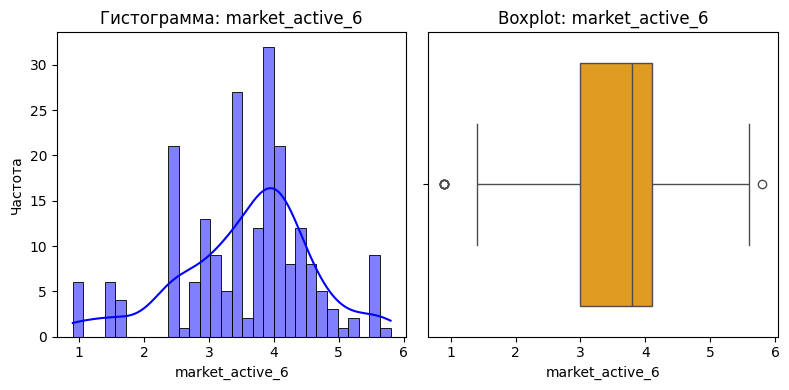


Дискретный признак: market_active_cur


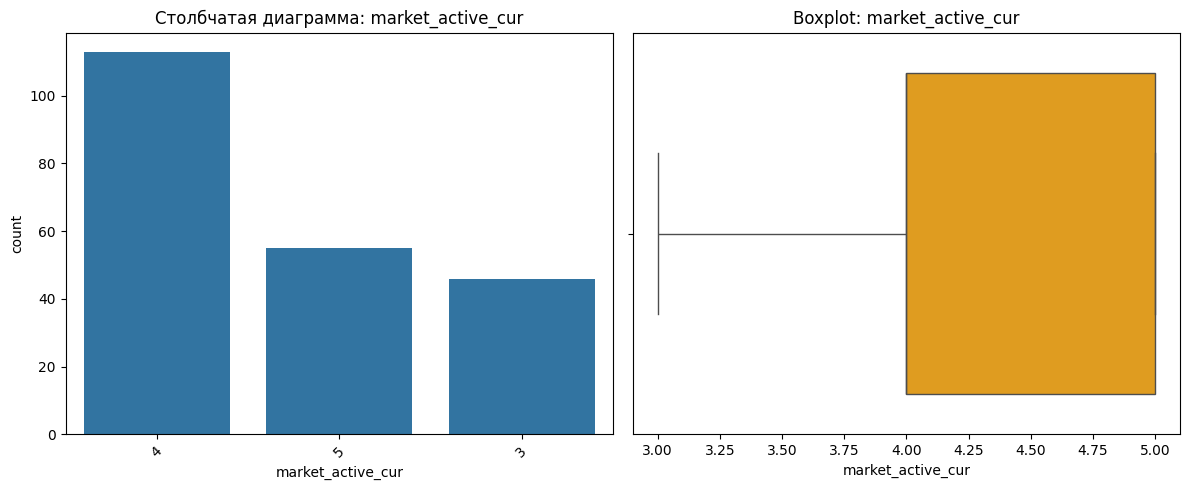


Непрерывный признак: duration


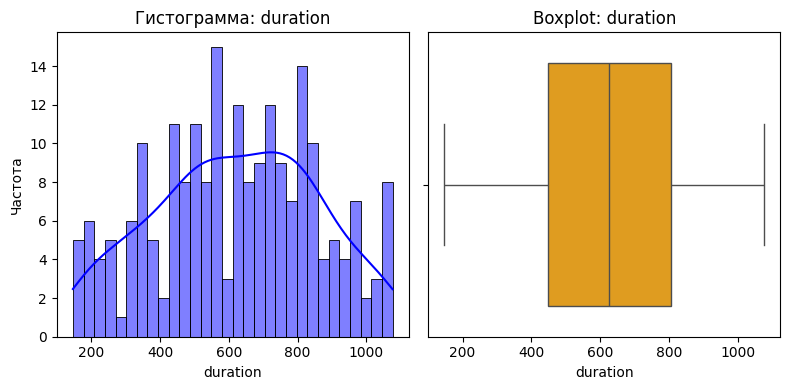


Непрерывный признак: promotion_purch


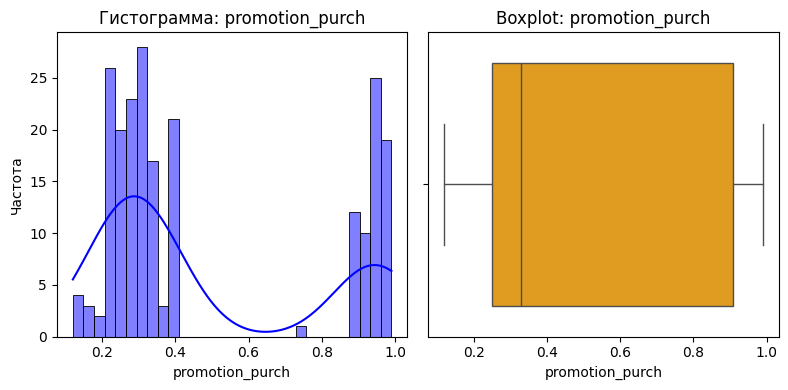


Дискретный признак: avg_cat_view_vizit


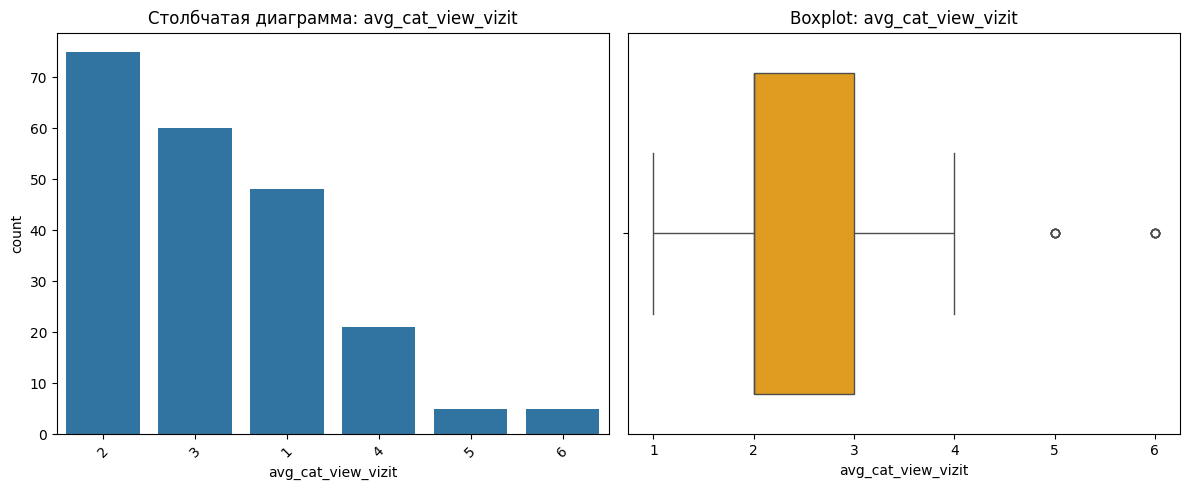


Дискретный признак: service_error


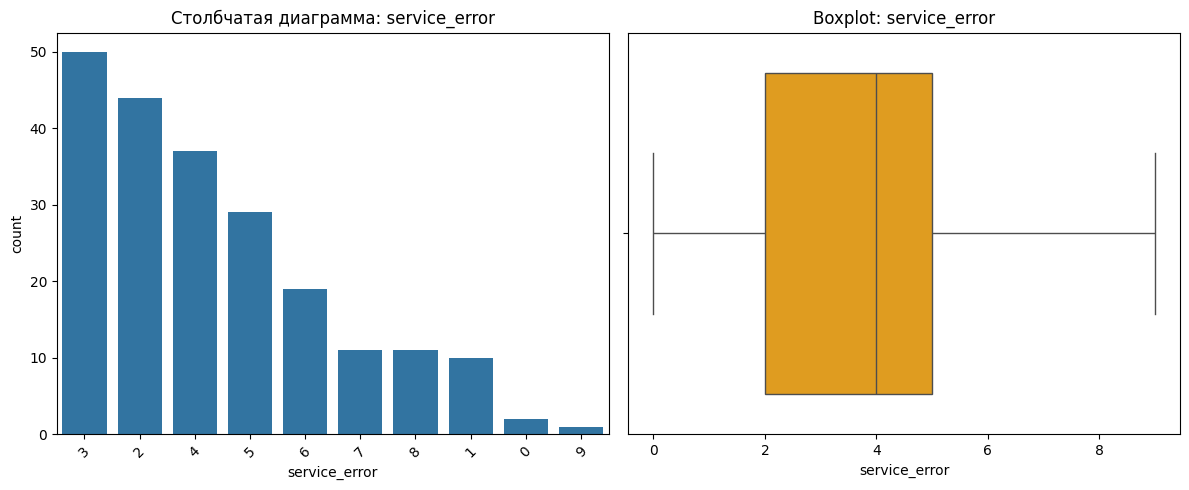


Дискретный признак: pages_vizit


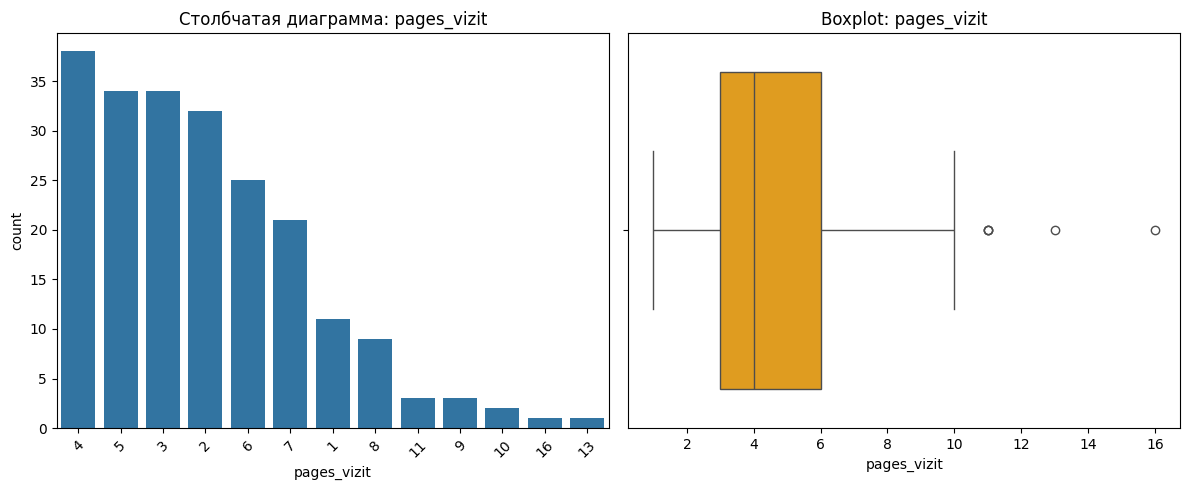


Непрерывный признак: last_month_revenue


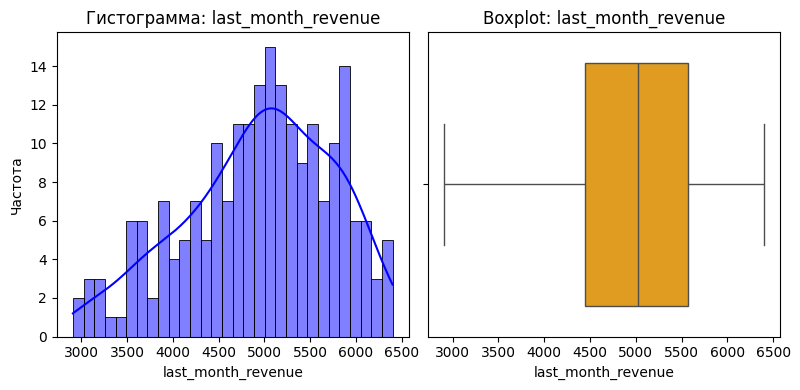


Непрерывный признак: prelast_month_revenue


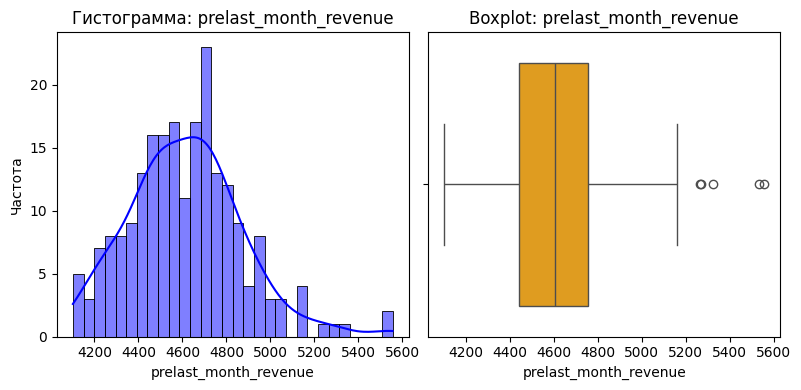


Непрерывный признак: current_month_revenue


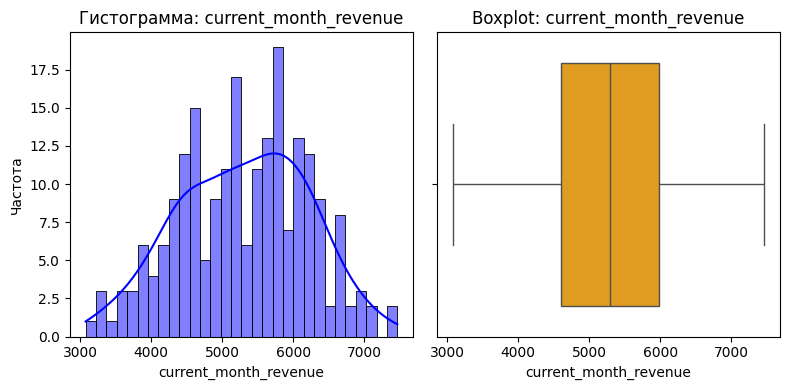


Дискретный признак: last_month_time


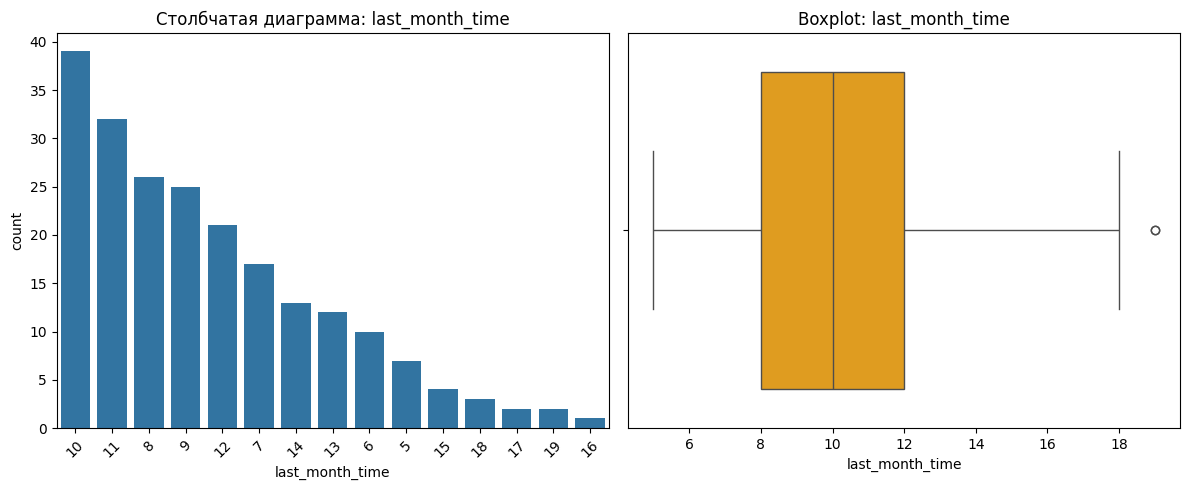


Дискретный признак: current_month_time


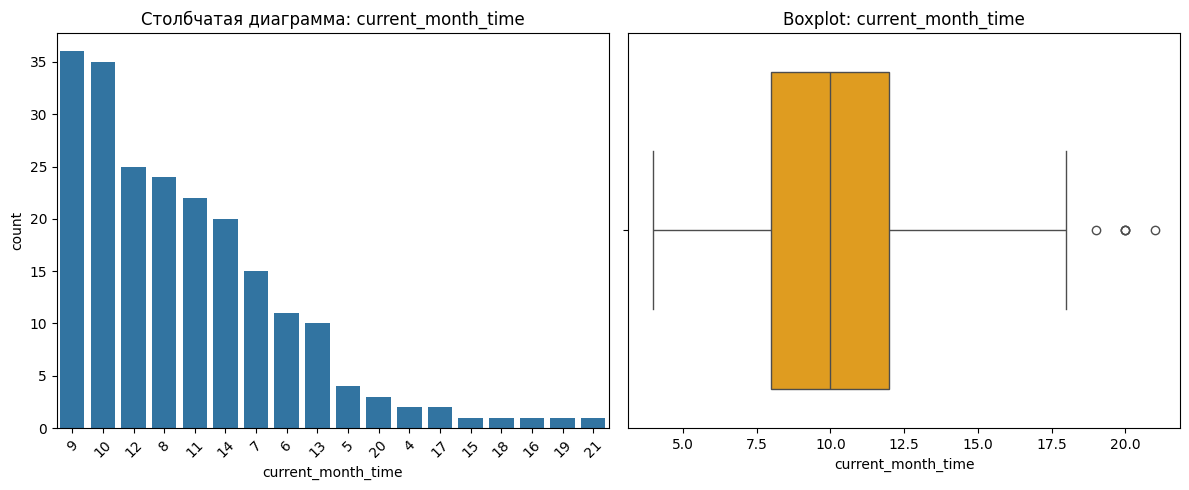


Непрерывный признак: probabilities


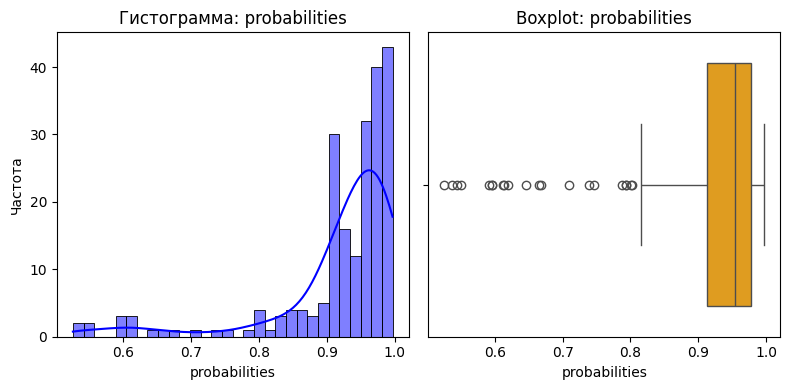


Непрерывный признак: revenue


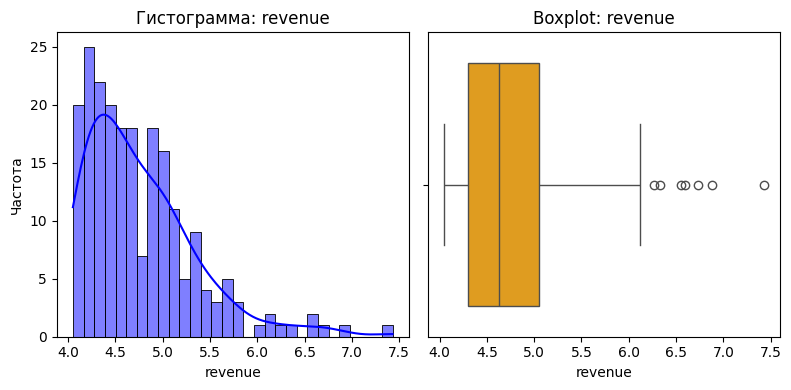

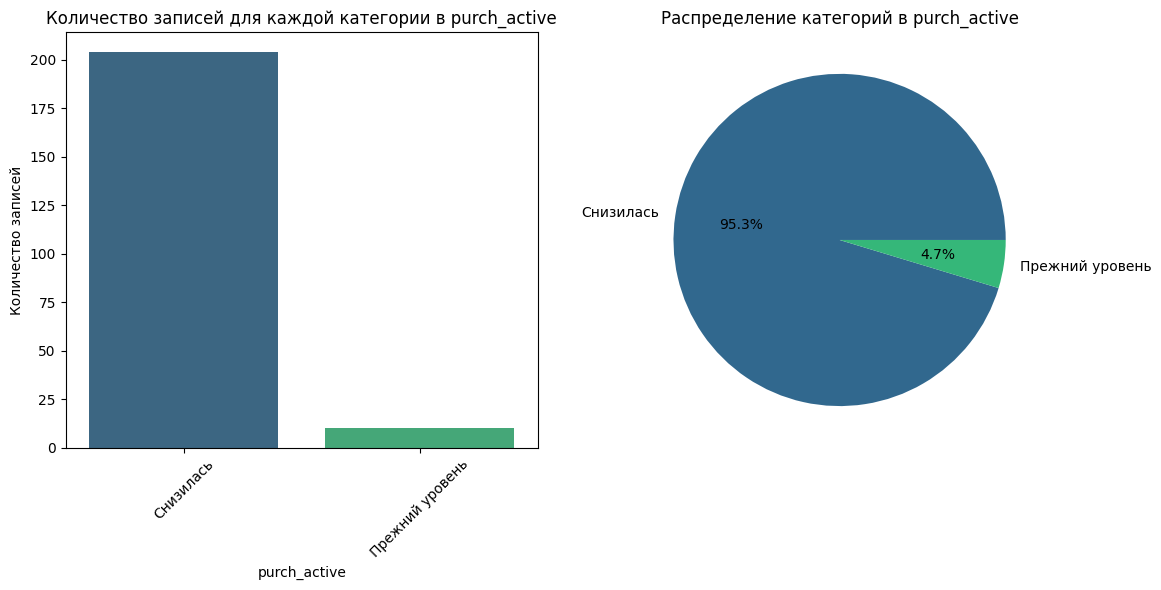

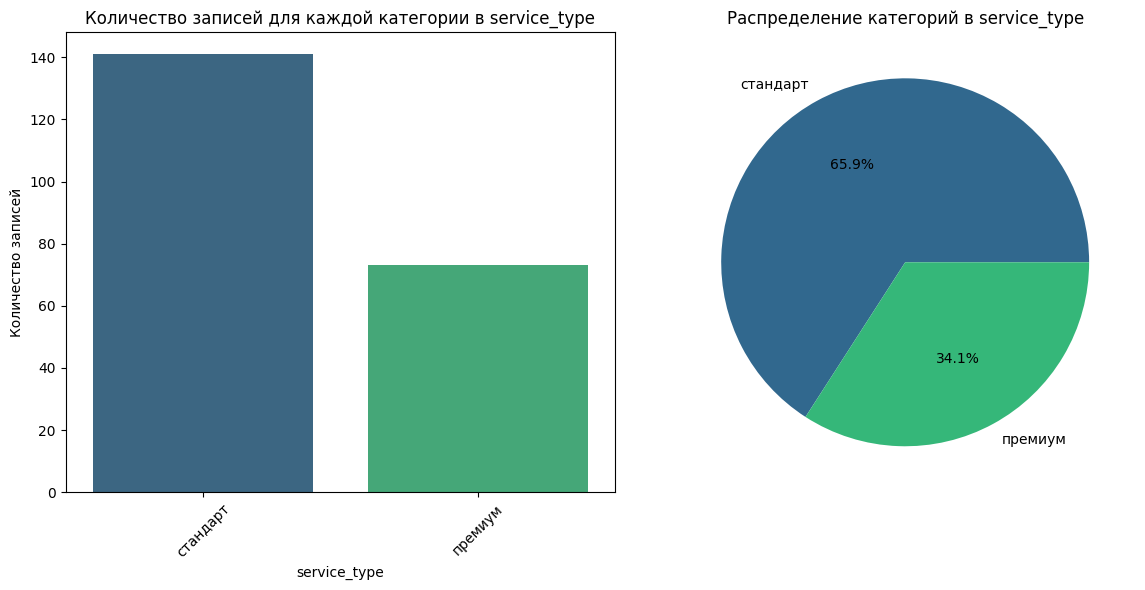

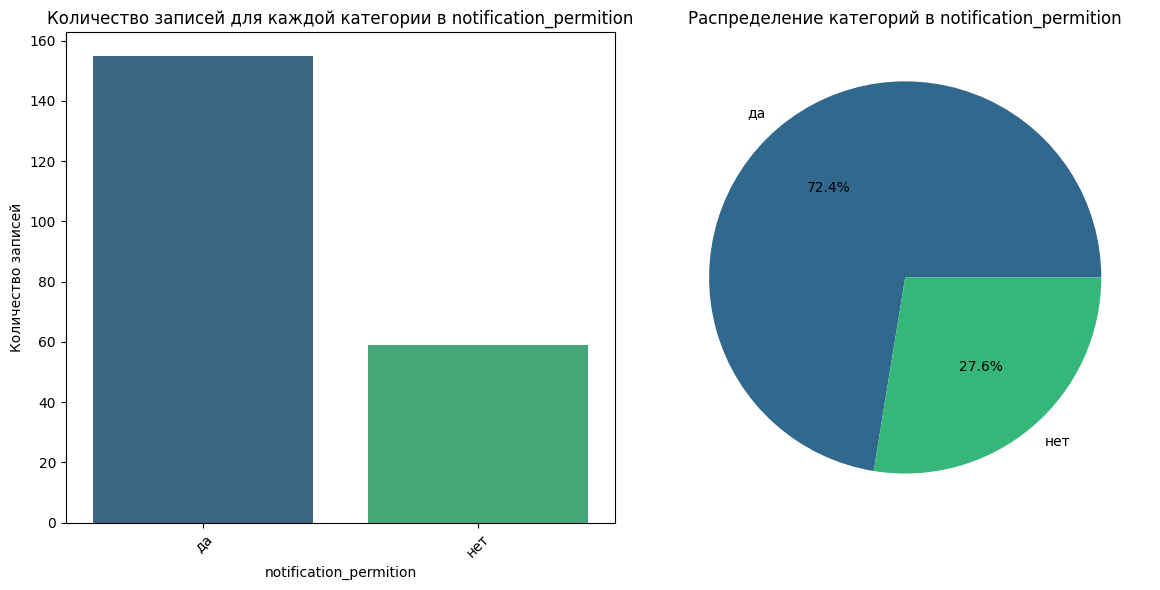

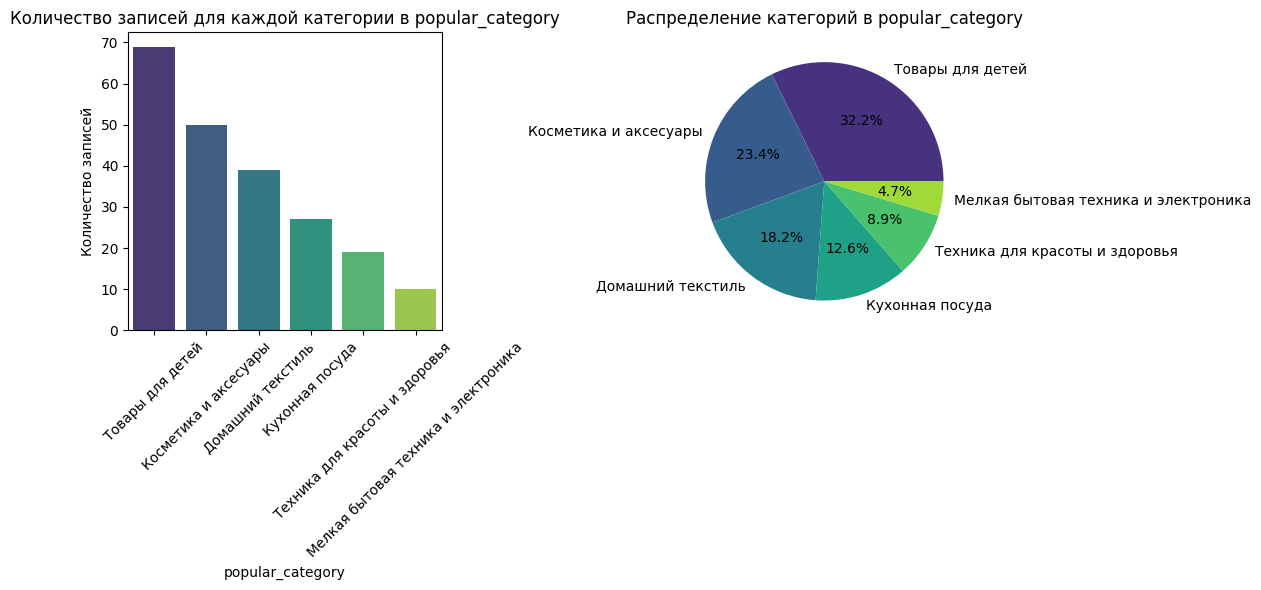

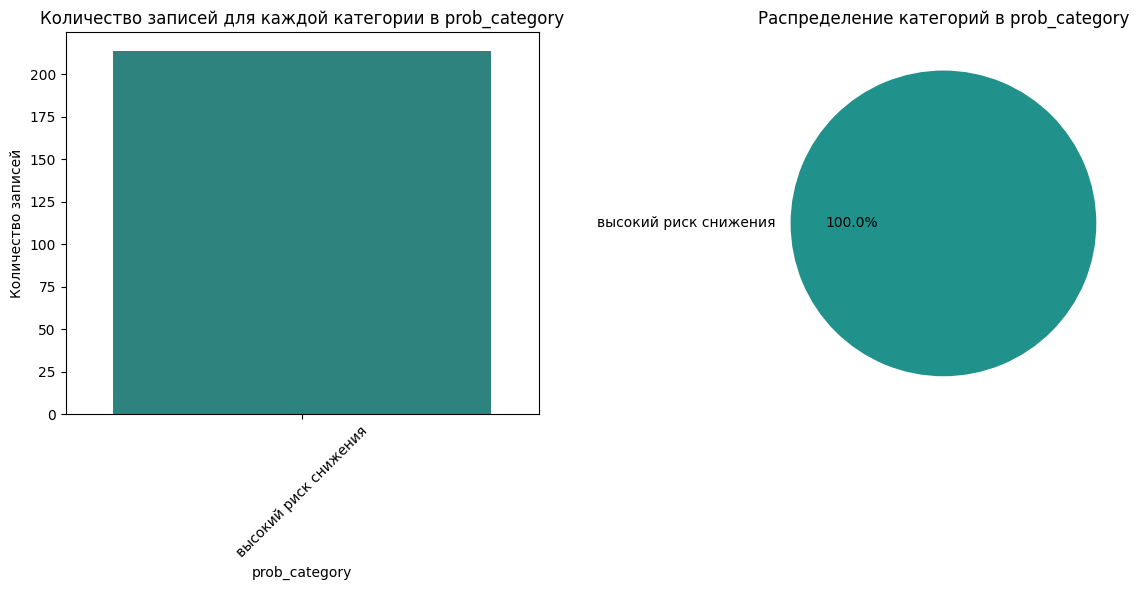

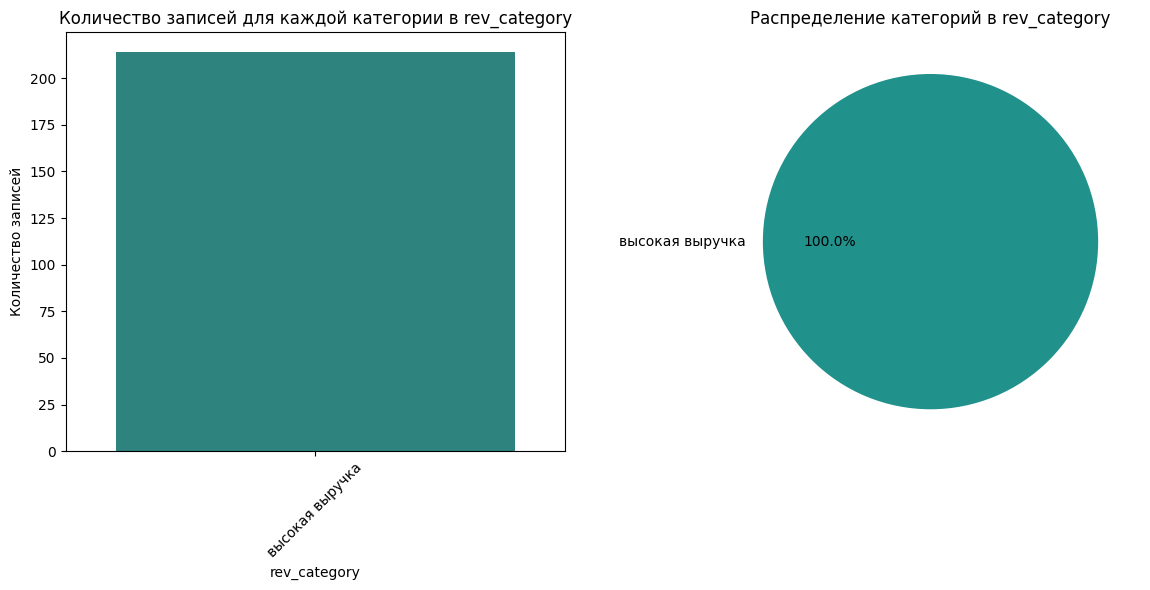

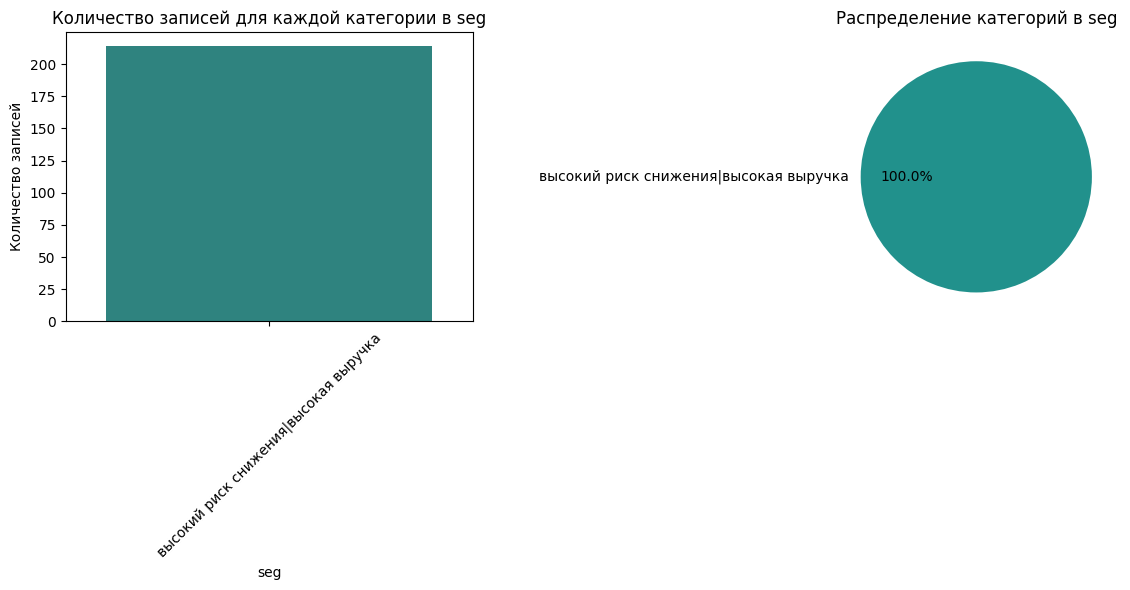

In [93]:
plot_eda(seg1)


Непрерывный признак: market_active_6


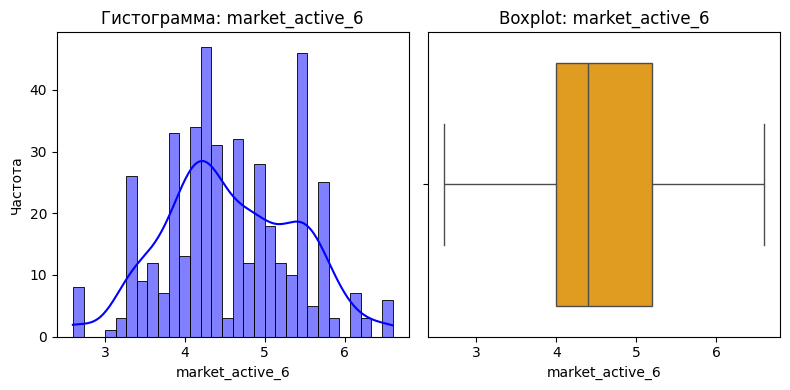


Дискретный признак: market_active_cur


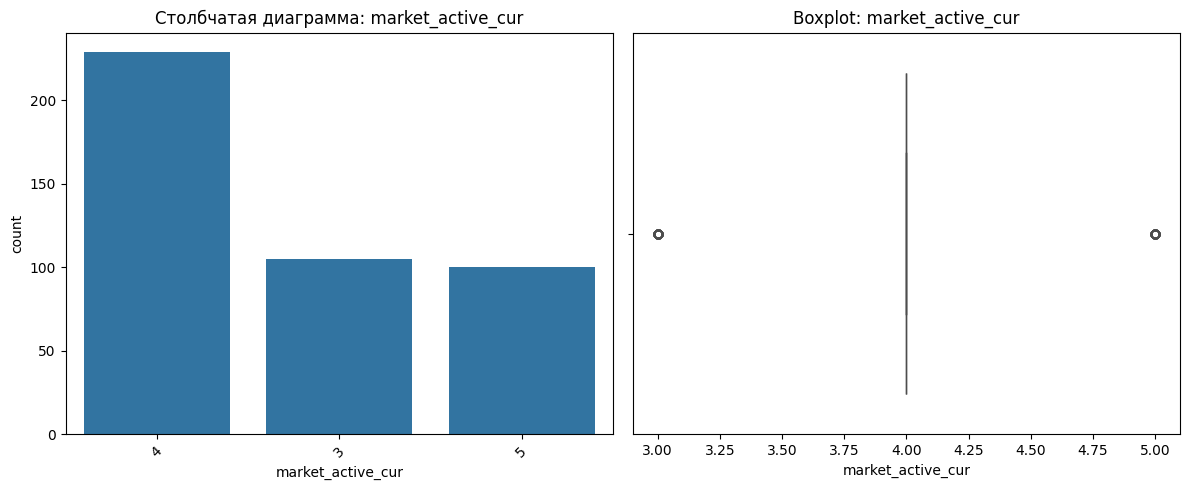


Непрерывный признак: duration


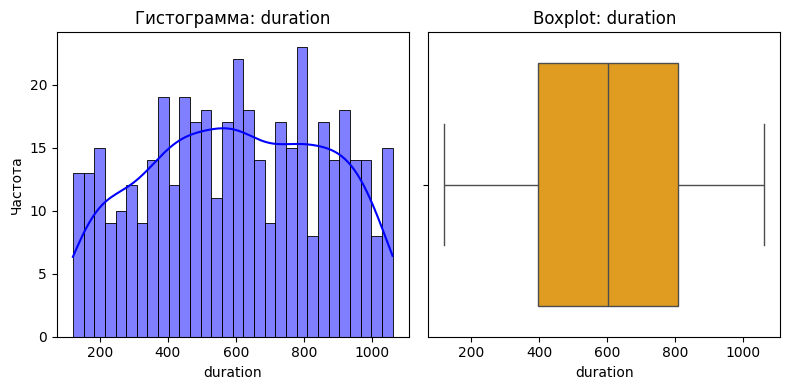


Непрерывный признак: promotion_purch


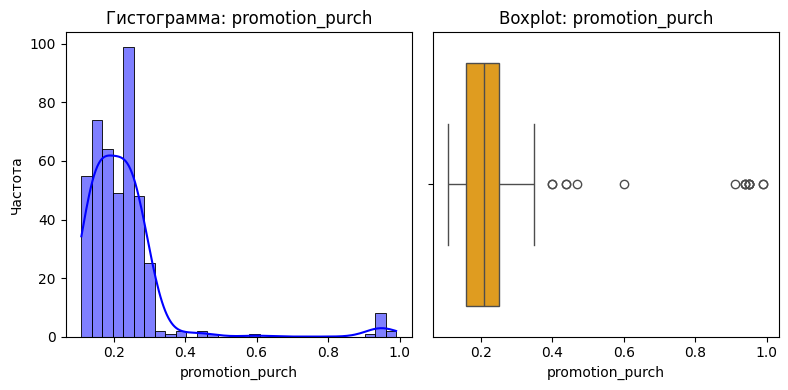


Дискретный признак: avg_cat_view_vizit


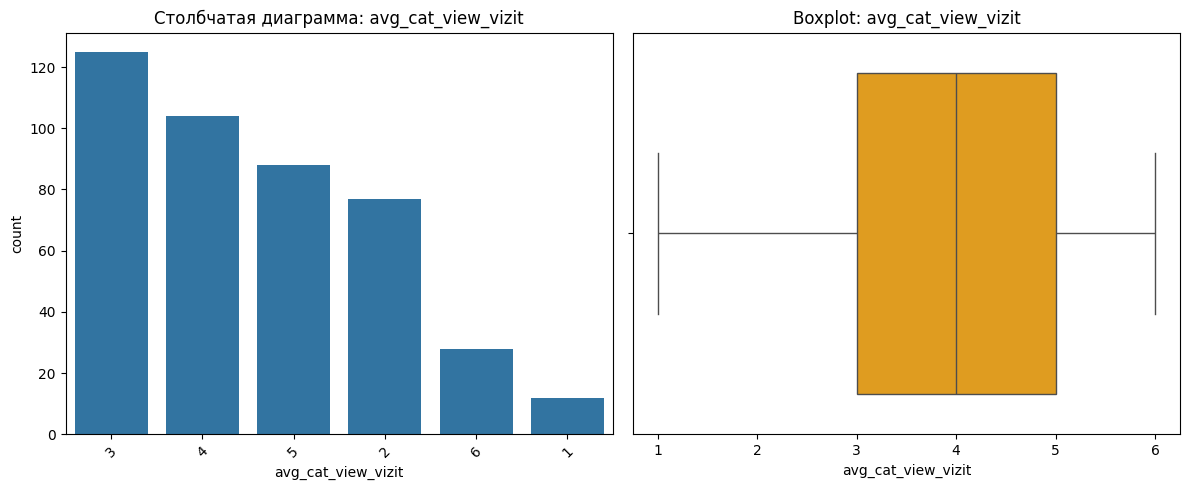


Дискретный признак: service_error


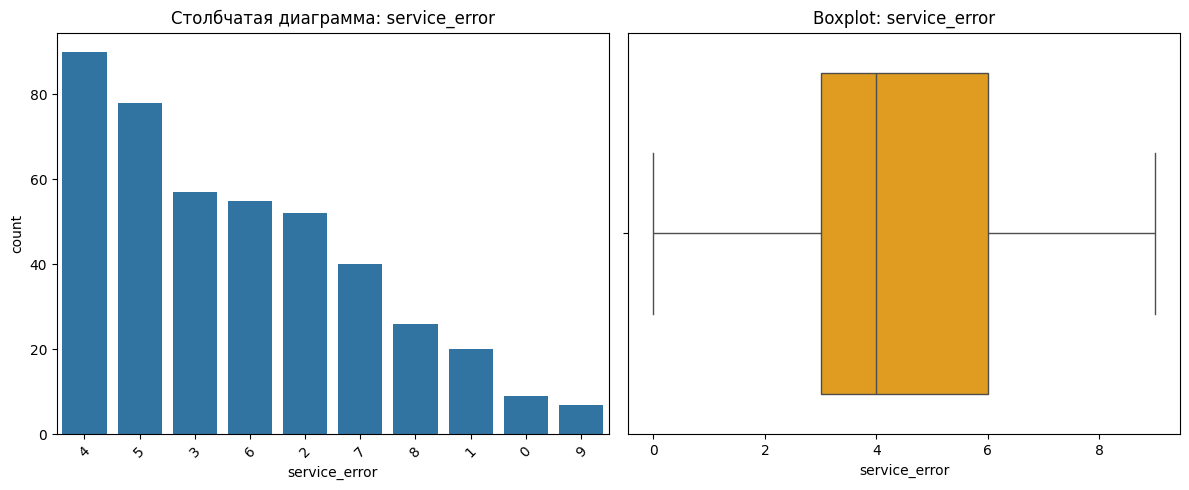


Дискретный признак: pages_vizit


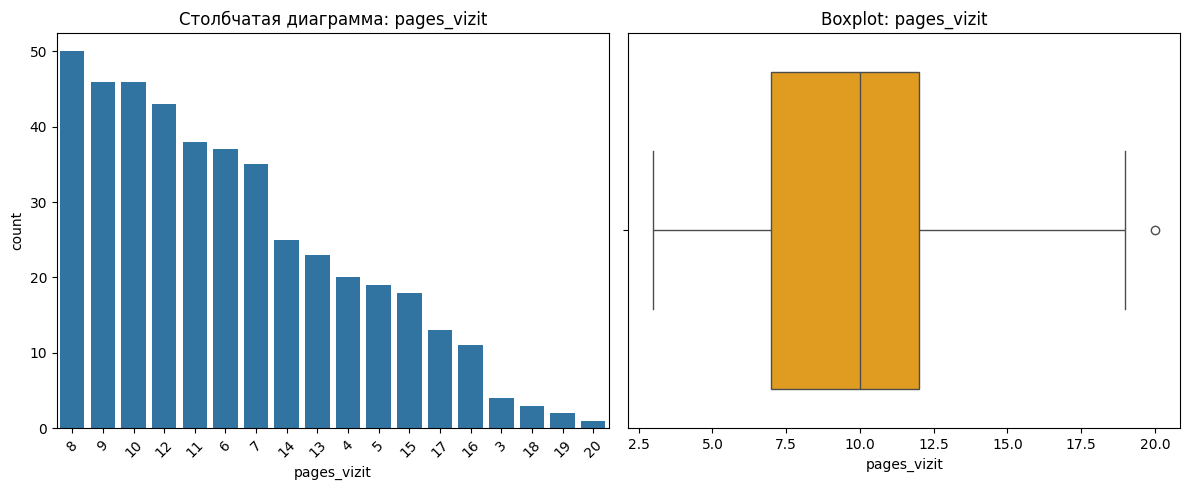


Непрерывный признак: last_month_revenue


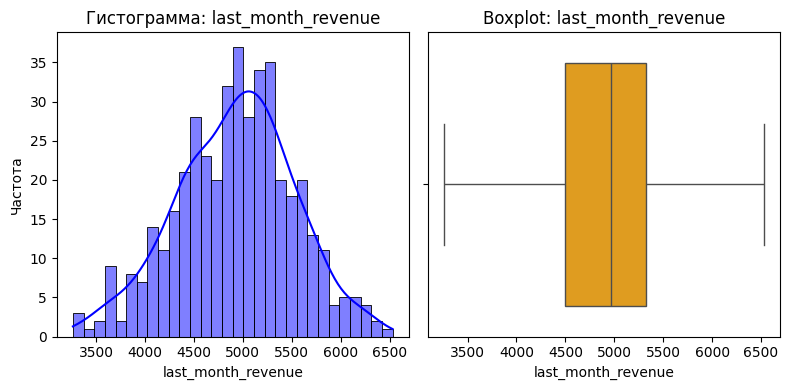


Непрерывный признак: prelast_month_revenue


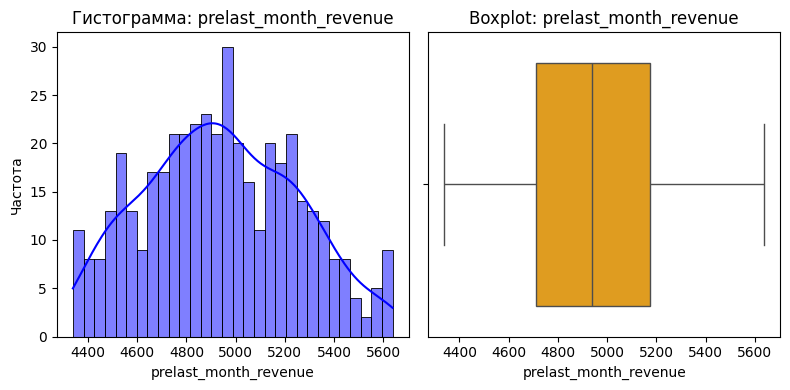


Непрерывный признак: current_month_revenue


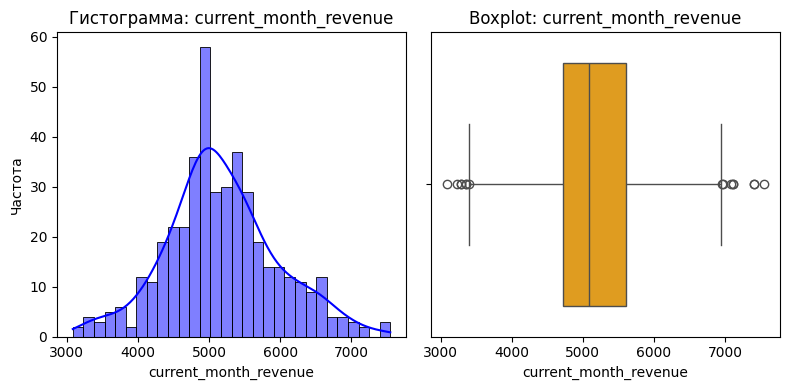


Дискретный признак: last_month_time


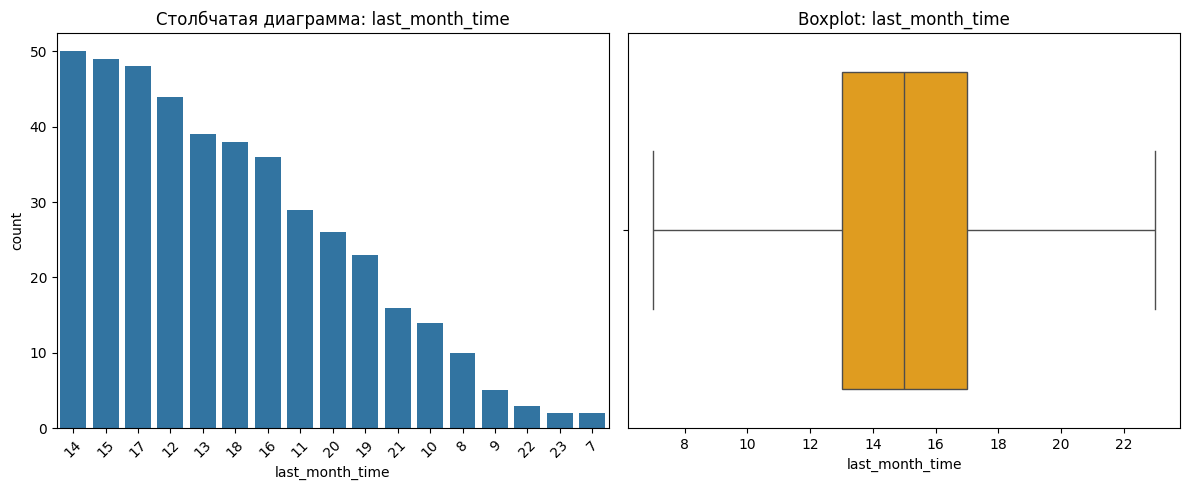


Дискретный признак: current_month_time


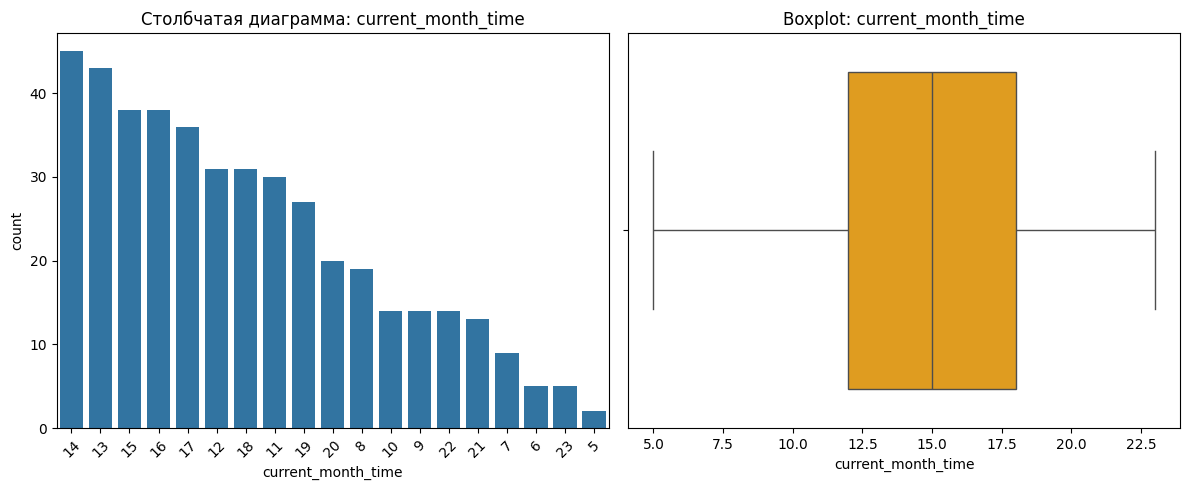


Непрерывный признак: probabilities


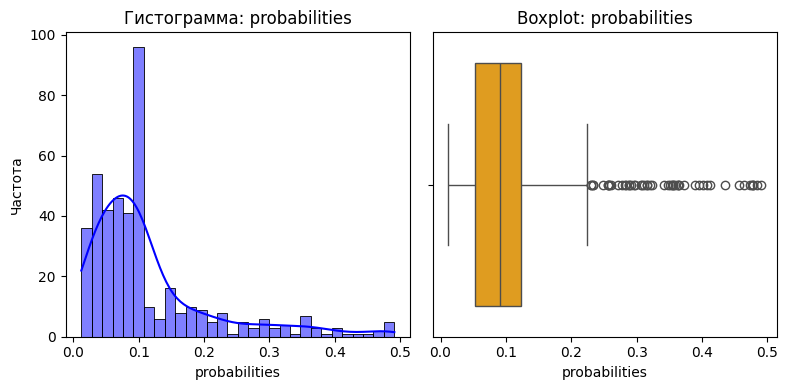


Непрерывный признак: revenue


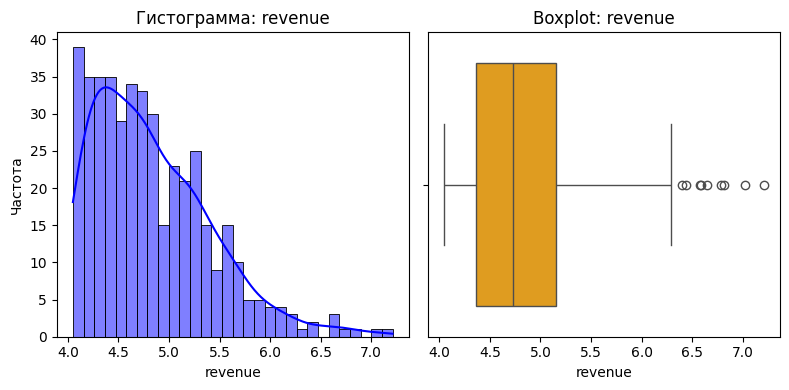

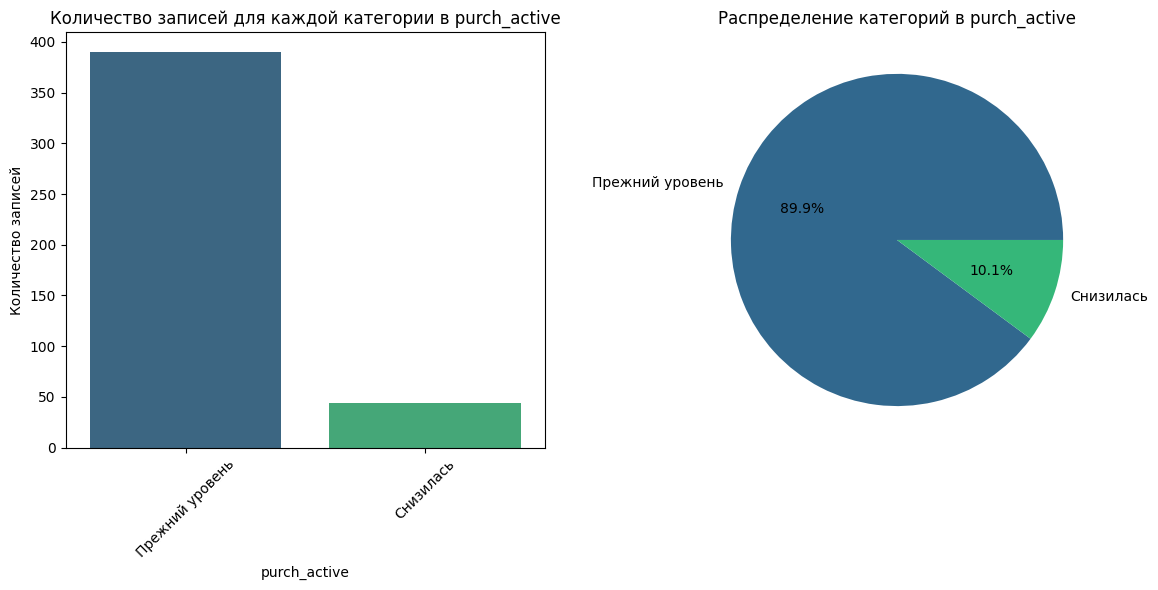

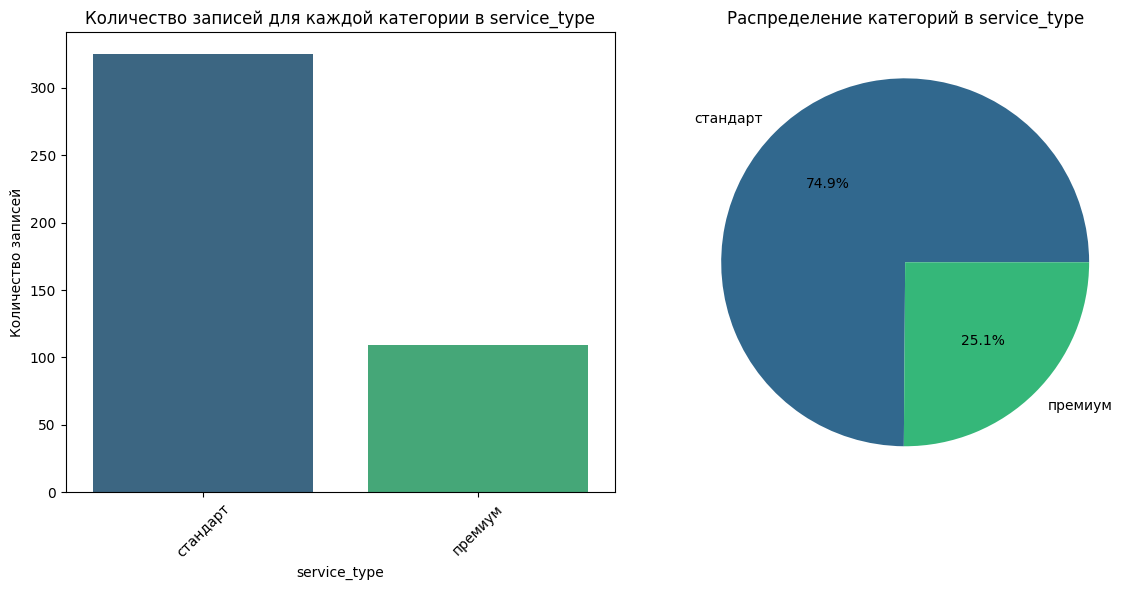

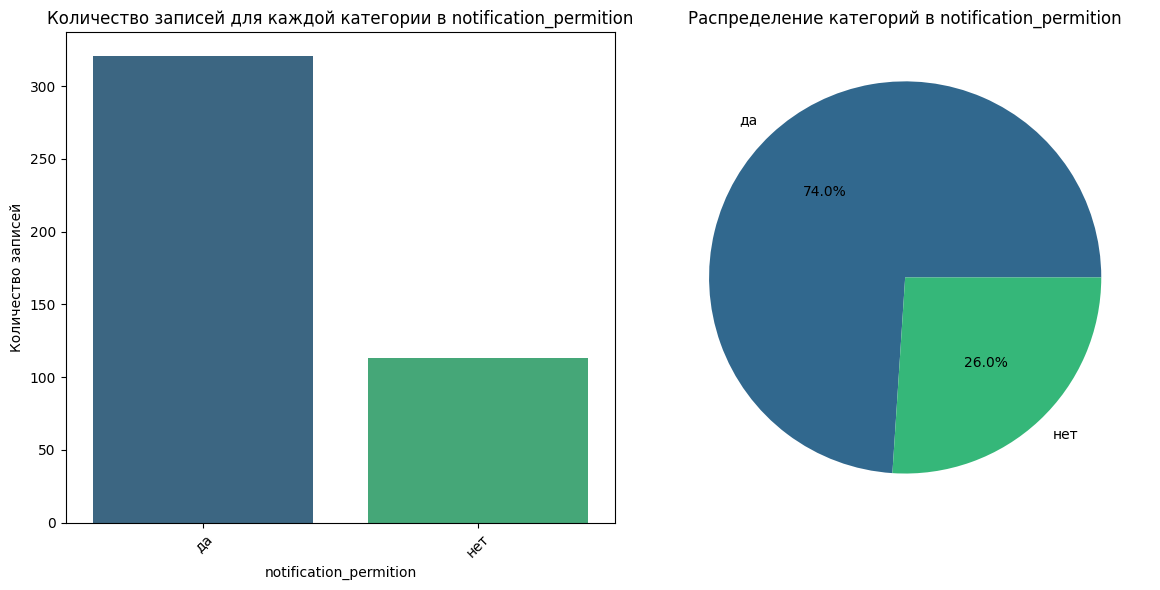

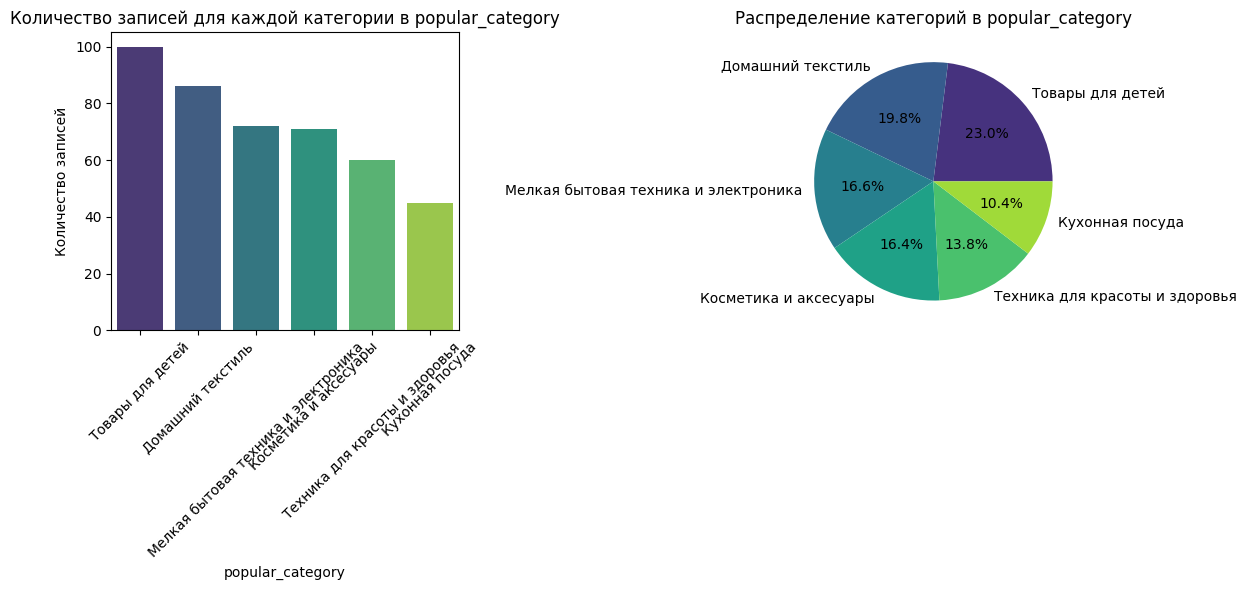

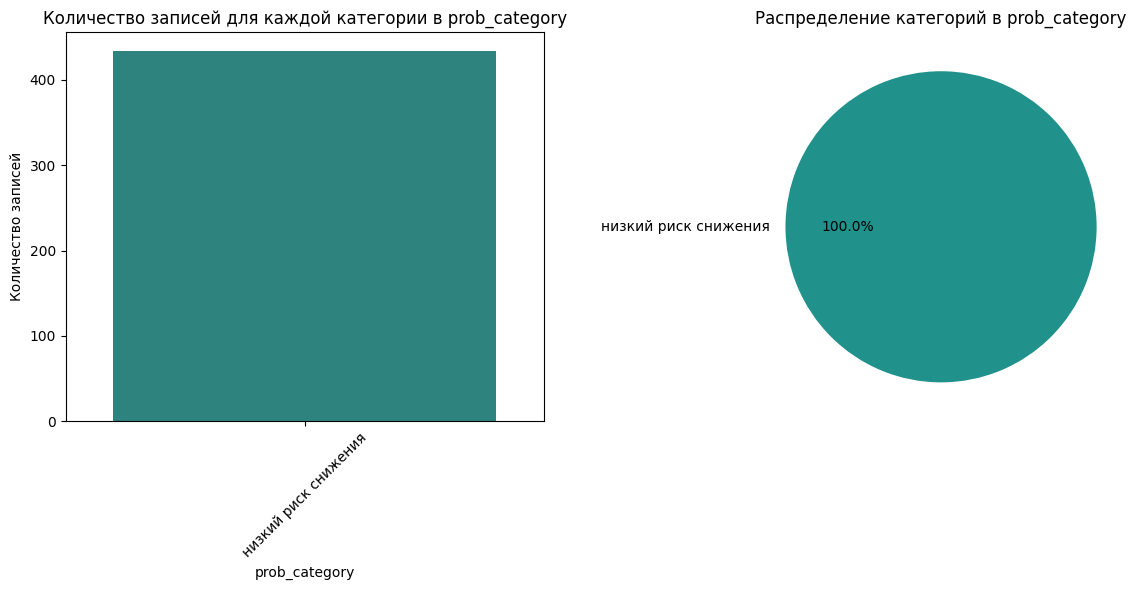

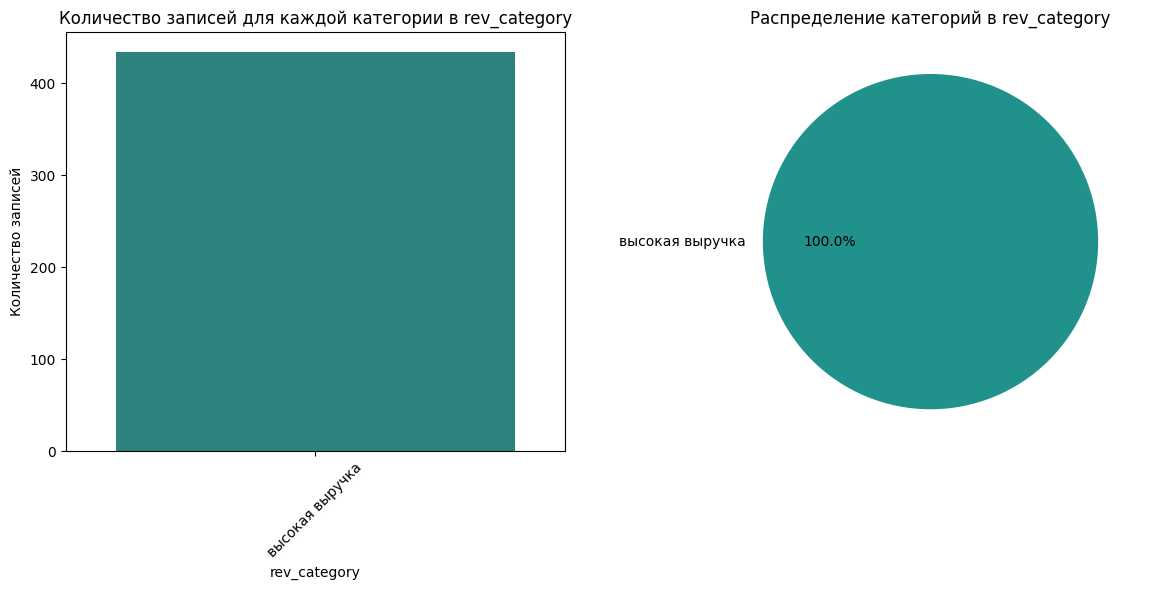

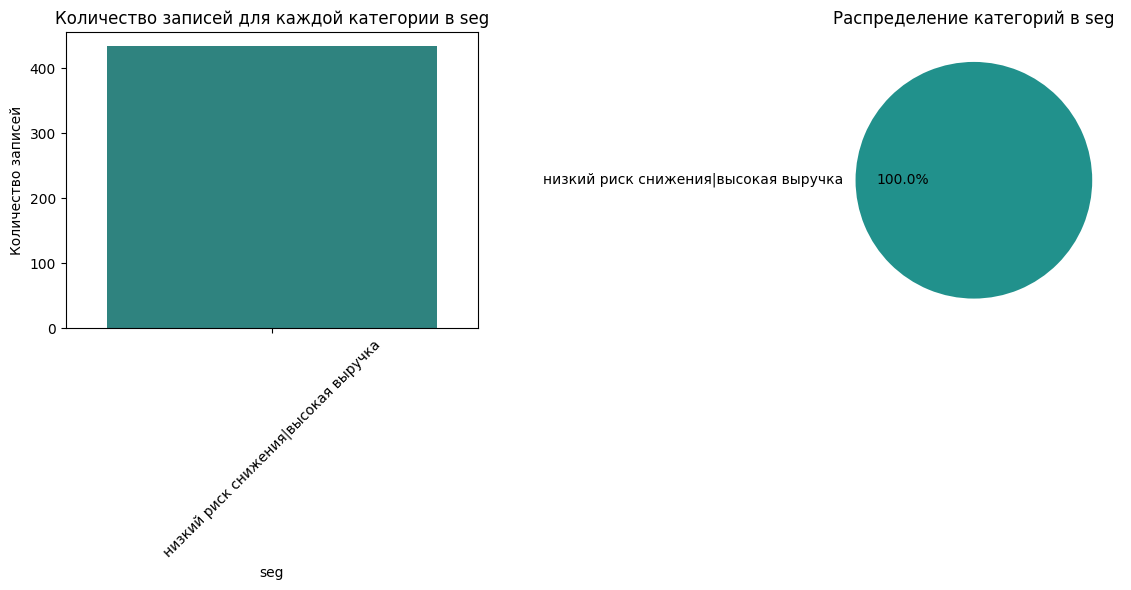

In [94]:
plot_eda(seg2)

Основные отличия в категориальных признаках - в сегменте с высоким риском снижения активности больше доля пользователей категории премиум. Среди лидирующих категорий товара в обоих группах - товары для детей и домашний текстиль, однако, у высокрисковых пользователей доля пользователей категории товары для детей выше а также более высокая доля категории косметика и аксессуары. 

## Общий вывод

В рамках сегментации пользователи был разбиты на 4 сегмента в зависимости от вероятности риска снижения активности и от прибыльности пользователя: 
1. 'высокий риск снижения|высокая выручка',
2. 'низкий риск снижения|низкая выручка',
3. 'высокий риск снижения|низкая выручка',
4. 'низкий риск снижения|высокая выручка'
   
Более детально был рассмотрен сегмент 'высокий риск снижения|высокая выручка', т.к. этот сегмент может оказать более существенное влияние на положение дел бизнеса.

Из сравнения числовых параметров сегменты отличаются друг от друга преждем всего признаками, которые имели наибольшую важность при назначении вероятности, так:\
pages_vizit (Страниц_за_визит) — у сегмента с высоким риском медиана составляет 4,5, а с низким - 10;\
avg_cat_view_vizit (Средний_просмотр_категорий_за_визит) - у сегмента с высоким риском медиана составляет 2, а с низким - 4;\
last_month_time - у сегмента с высоким риском медиана составляет 10, а с низким - 15;\
current_month_time - у сегмента с высоким риском медиана составляет 10, а с низким - 15.\
При этом в сегменте высокого риска больше медианная доля покупок по акции.

Основные отличия в категориальных признаках - в сегменте с высоким риском снижения активности больше доля пользователей категории премиум. Среди лидирующих категорий товара в обоих группах - товары для детей и домашний текстиль, однако, у высокрисковых пользователей доля пользователей категории товары для детей выше а также более высокая доля категории косметика и аксессуары.

**Гипотезы о возможных причинах и рекомендации к их исправлению:**
1. Возможно, пользователи категории премиум требуют более уникальных предложений или услуг (например, расширение ассортимента премиальных товаров, эксклюзивные предложения и т.д.). Требуется более глубокий анализ поведения и предпочтений данной категории, проведение интервью (или опроса) с такими пользователями.
2. Рекомендации категории товаров для детей устаревают, т.к. дети растут и с их ростом нужны другие товары. Проверить настройку рекомендаций и учитывать возраст детей при рекомендациях в данной категории товаров.
3. У родителей, покупающих в категории товары для детей нет времени долго рассматривать товары и "гулять" по сайту. Рекомендуется предусмотреть функционал с кнопкой "повторить заказ" или аналогичный, облегчающий повторную покупку.
4. Уменьшать долю акционных покупок и увеличивать лояльность пользователей за счет бонусных баллов, участиях в розыгрышах и т.д.

# Общий вывод по проекту

**Задача:**\
В рамках выполнения данного проекта была поставлена задача по формированию персонализированных предложений для пользователей интернет-магазина на основании данных о их поведении на сайте. 

**Исходные данные:**\
Были предоставлены исходные данные, которые состояли из 4х таблиц:
1. Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. 
2. Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
3. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
4. Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

**Предобработка данных:**\
Была выполнена предобработка данных состоящая из устранения явных и неявных дубликатов, устарнения аномалий в данных, устарнение офорграфических ошибок и приведения в соответствие типов данных.\
Также были отфильтрованы только те пользователи, которые имели покупки за последние 3 месяца.\
Для выполнения предиктовой модели и формирования единой таблицы признаков, первые три таблицы были объеденены в одну. 

**Подбор модели:**\
Для поиска наилучшей модели был разработн пайплайн, который автоматически перебирает различные модели и их гиперпараметры.\
Были проанализированы 4 модели и их гиперпараметры:  KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()

Лучшей моделью по итогам расчетов является SVC с параметрами на кросс-валидации:\
Параметры: {'models': SVC(class_weight='balanced', probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'auto', 'models__kernel': 'rbf', 'preprocessor__num': StandardScaler()}\
ROC AUC: 0.9138\
Precision: 0.8996\
Recall: 0.7676\
F1-score: 0.8263

Метрики модели SVC на тестовой выборке:\
roc_auc: 0.9252\
precision: 0.8817\
recall: 0.8283\
f1: 0.8542

**Сегментация и рекомендации по персонализации предложений:**\
В рамках сегментации пользователи был разбиты на 4 сегмента в зависимости от вероятности риска снижения активности и от прибыльности пользователя:
1. 'высокий риск снижения|высокая выручка',
2. 'низкий риск снижения|низкая выручка',
3. 'высокий риск снижения|низкая выручка',
4. 'низкий риск снижения|высокая выручка'
   
Более детально был рассмотрен сегмент 'высокий риск снижения|высокая выручка', т.к. этот сегмент может оказать более существенное влияние на положение дел бизнеса.

*Рекомендации:*
1. Выполнить более глубокий анализ поведения и предпочтений пользователей категории "премиум", проведести интервью (или опрос) с целью выявить их потребности и ожидания от сервиса.
2. Проверить настройку рекомендательной системы, особенно в категории "товары для детей" и учитывать возраст детей (а также что они растут) при рекомендациях в данной категории товаров.
3. Рекомендуется предусмотреть функционал с кнопкой "повторить заказ" или аналогичный, облегчающий повторную покупку, особенно актуально для категории "товары для детей", т.к. у данных потребителей меньше времени, чтобы "гулять" по сайту и "накидывать" товары в корзину.
4. Уменьшать долю акционных покупок и увеличивать лояльность пользователей за счет бонусных баллов, участиях в розыгрышах и т.д.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br /><font color='4682B4'> 1. Изменил функцию для обработки дискретных значений</font>
    <br /><font color='4682B4'> 2. Дал пояснения к своему решению</font>
    <br /><font color='4682B4'> 3. Добавил пояснения</font>
    <br /><font color='4682B4'> 4. Применил другой метод</font>
    <br /><font color='4682B4'> 5. Добавил параметр</font>
    <br /><font color='4682B4'> 6. Изменил ранговый признак</font>
    <br /><font color='4682B4'> 7. Убрал лишнее</font>
    <br /><font color='4682B4'> 8. Убрал лишнее</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Игорь, был рад помочь! Был рад работать с тобой совместно над проектом! ПРОЕКТ ПРИНЯТ!
    
p.s. загляни сейчас в эл/почтовый ящик ...    
</div>
